In [1]:
import pandas as pd
import io
import re
import json

import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships

In [2]:
def human_readable_format(num):
    """Convert large numbers to human-readable format (K, M, B, T) with whole numbers."""
    if num >= 1_000_000_000_000:
        return f"{round(num / 1_000_000_000_000)}T"  # Trillions
    elif num >= 1_000_000_000:
        return f"{round(num / 1_000_000_000)}B"  # Billions
    elif num >= 1_000_000:
        return f"{round(num / 1_000_000)}M"  # Millions
    elif num >= 1_000:
        return f"{round(num / 1_000)}K"  # Thousands
    else:
        return str(round(num))  # Small numbers remain as is

In [3]:
ds = '/home/aniketh/devel/src/ble-beacon/beacon-finder/analysis/data_safety.csv'
data_safety = pd.read_csv(ds)

In [4]:
bt_beacon_sdk = (
## BT beacons
"AltBeacon", "Radius Networks", "Estimote", "Gimbal", "Kontakt", "Cuebiq", "Ad4Screen", "BlueKai (acquired by Oracle)",
"Reveal Mobile", "SignalFrame", "IndoorAtlas", "Rover SDK", "Coulus Coelib", "BeaconsInSpace (Fysical)", 'Bluedot SDK', "Precisely",
"InMarket", "Sense360", "Locuslabs", "Roximity", "Bluecats", "Sensoro", "Swirl", "Placer", "Unacast Pure", "X-Mode", "Colocator",
"Point Inside", "Woosmap SDK", "MOCA", "Proximi.io", "pulseid", "ubudu", "Beaconstac NearBee", "Radar",  "Areametrics", "Tamoco",
"Zendrive", "Swrve",
## acoustic beacons
"Yinzcam Sobek", "Signal360", "CueAudio", "Zapr",
## geofence engines 
"Huq Sourcekit", "Demdex", "Pilgrim by Foursquare", "Dynamic Yield", "Singlespot", "Salesforce Marketing Cloud", "mParticle", 
"Exponea", "OpenLocate", "Kochava", "PredicIO", "Bazaarvoice", "LeanPlum" #OpenLocate(Safegraph), "Yandex Ad",
## new list  
# "Braze (formerly Appboy)","LeanPlum","Vectaury","OpenLocate","Kochava","HyperTrack","Swrve","Moodmedia","Houndify","OpenX","Anagog",
# "Bazaarvoice","Glympse","Herow","SmartLook","Esri ArcGIS","Tamoco","Zapr","Footmarks","Verizon Ads","360Dialog","Actv8me","Carto (formerly Nutiteq)",
# "Lenddo","Opensignal","PredicIO","AdLocus","Anvato (A Google Company)","Blesh","Analytics by NPAW (Youbora Suite)","Beintoo","Cedexis Radar",
# "Cifrasoft","Flowsense","Zendrive","LotaData","UserExperior","Exponea" #"CleverTap"
)

install_count = pd.read_csv('/home/aniketh/devel/src/ble-beacon/beacon-finder/analysis/bt_beacon_sdk_permissions.csv')
install_count = install_count[['package_name', 'realinstalls']]
install_count.drop_duplicates(subset='package_name', inplace=True)

def format_installs(num):
    if num >= 1_000_000_000:
        return f'{num / 1_000_000_000:.1f}B'
    elif num >= 1_000_000:
        return f'{num / 1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num / 1_000:.1f}K'
    else:
        return f'{num:.0f}'

install_count['installs'] = pd.to_numeric(install_count['realinstalls'], errors='coerce')
install_count['installs'] = install_count['installs'].apply(format_installs)

/home/aniketh/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
install_count

,package_name,realinstalls,installs
0,com.wjw.android.weather,103512.0,103.5K
4,com.onesports.livescore,1284060.0,1.3M
68,barion.app,68153.0,68.2K
84,org.ghc.android,268177.0,268.2K
85,com.droid.mobile.glenoaksclub,70.0,70
...,...,...,...
1056318,fr.sweepin.avignonips,560.0,560
1056442,erg.com.nioshheatindex,292798.0,292.8K
1056597,com.sidearmsports.swprepconf,221.0,221
1056602,com.mcbackup.contact.contactbackup,753501.0,753.5K


In [6]:
app_perm = pd.read_csv('/home/aniketh/devel/src/ble-beacon/dynamic_analyser/data_analysis/bt_app_latest_perm_data_9.csv')

In [7]:
bt_stacktrace = pd.read_csv("/home/aniketh/devel/src/ble-beacon/dynamic_analyser/data_analysis/bt_scan_stacktrace_data.csv")

In [8]:
bt_stacktrace = pd.read_csv("/home/aniketh/devel/src/ble-beacon/dynamic_analyser/data_analysis/bt_scan_stacktrace_data_opendsearch.csv")
bt_stacktrace[bt_stacktrace['initiator'] == 'Unknown']

,app_name,app_id,timestamp,initiator,stack_trace
0,com.lumecube.lumex,15764,1725903830,Unknown,['android.bluetooth.le.BluetoothLeScanner.star...
32,com.eti.haccpleeti,15836,1725920899,Unknown,['android.bluetooth.le.BluetoothLeScanner.star...
33,com.eti.haccpleeti,15836,1725920899,Unknown,['android.bluetooth.le.BluetoothLeScanner.star...
34,com.eti.haccpleeti,15836,1725920902,Unknown,['android.bluetooth.le.BluetoothLeScanner.star...
35,com.eti.haccpleeti,15836,1725920902,Unknown,['android.bluetooth.le.BluetoothLeScanner.star...
...,...,...,...,...,...
475,com.leisuretelematics.caracontrol,10344,1726175316,Unknown,['android.bluetooth.le.BluetoothLeScanner.star...
476,com.leisuretelematics.caracontrol,10344,1726175322,Unknown,['android.bluetooth.le.BluetoothLeScanner.star...
477,com.leisuretelematics.caracontrol,10344,1726175328,Unknown,['android.bluetooth.le.BluetoothLeScanner.star...
478,com.leisuretelematics.caracontrol,10344,1726175334,Unknown,['android.bluetooth.le.BluetoothLeScanner.star...


In [9]:
bt_stacktrace['app_name'].value_counts()

com.leisuretelematics.caracontrol                               58
com.eti.haccpleeti                                              36
com.everywhere.mobile                                           29
com.ghisoni                                                     21
com.dropmobility.riide                                          21
com.innovate.IndonesiaSocial                                    20
com.customcutz.user                                             18
co.lynde.ghwvz                                                  18
co.april2019.gmudra                                             18
co.ecosocial.app                                                15
com.chatnmatch.modoo                                            15
com.moorespigglywiggly.moorespigglywiggly.android.googleplay    15
com.lumecube.lumex                                              14
com.easybrain.dice.board.game                                   14
com.clubautomation.john.newcombe                              

In [10]:
def extract_second_level_domain(domain):
    domain = domain.replace("\\", "")  # Remove backslashes
    parts = domain.split('.')
    if len(parts) > 2:
        return f"{parts[-2]}.{parts[-1]}"  # Extract second-level domain
    return domain

In [11]:
sdk_endpoints = {
    "Yinzcam Sobek": ["yinzcam.com"],
    "Signal360": ["signal360\\.com", "sonicnotify\\.com"],
    "CueAudio": ["live.cueaudio.com", "cueaudio.com"],
    "AltBeacon": ["data.\\altbeacon\\.org"],
    "Radius Networks": ["proximitykit\\.radiusnetworks\\.com"],
    "Estimote": ["estimote\\.com"],
    "Gimbal": ["analytics-server\\.gimbal\\.com", "api\\.gimbal\\.com", "registration\\.gimbal\\.com", "sdk-info\\.gimbal\\.com"],
    "Kontakt": ["kontakt\\.io"],
    "Cuebiq": [".cuebiq\\.com"],
    "Ad4Screen": ["a4\\.tl", "accengage\\.com", "ad4push\\.com", "ad4screen\\.com"],
    "Reveal Mobile": ["revealmobile.com", "rvl.wral.com"],
    "SignalFrame": ["wirelessregistry.com"],
    "IndoorAtlas": ["ipsws\\.indooratlas\\.com"],
    "Rover SDK": ["rover.io"],
    "Coulus Coelib": ["mobile.measurelib.com"],
    "BeaconsInSpace (Fysical)": ["beaconsinspace.com"],
    "InMarket": ["m2m-api\\.inmarket\\.com"],
    "Sense360": ["android-quinoa-config-prod\\.sense360eng\\.com", "incoming-data-sense360\\.s3\\.amazonaws\\.com", "quinoa-personal-identify-prod\\.sense360eng\\.com"],
    "Locuslabs": ["locuslabs\\.com"],
    "Roximity": ["app\\.roximity\\.com"],
    "Bluecats": ["bluecats.com"],
    "Sensoro": ["sensoro.com"],
    "Swirl": ["cdn-api\\.swirl\\.com"],
    "Placer": ["placer.ai"],
    "Unacast Pure": ["pinch.no"],
    "Point Inside": ["pointinside.com"],
    "Woosmap SDK": ["woosmap.com", "webgeoservices.com"],
    "MOCA": ["api-device.mocaplatform.com"],
    "Proximi.io": ["api\\.proximi\\.fi"],
    "pulseid": ["pulseid.com"],
    "ubudu": ["ubudu.com"],
    "X-Mode": ["api\\.myendpoint\\.io", "bin5y4muil\\.execute-api\\.us-east-1\\.amazonaws\\.com", "api\\.smartechmetrics\\.com"],
    "Radar": ["radar.io"],
    "Areametrics": ["areametrics\\.com"],
    "BlueKai (acquired by Oracle)": ["stags\\.bluekai\\.com", "tags\\.bluekai\\.com"],
    "Colocater": ["colocator\\.net", "api.crowdconnected.com"],
    "Huq Sourcekit": ["huq.io", "api.huqindustries.co.uk", "api.huq.io"],
    "Demdex": ["demdex\\.net", "omtrdc\\.net"],
    "Pilgrim by Foursquare": ["sdk\\.foursquare\\.com"],
    "Dynamic Yield": ["adm\\.dynamicyield\\.com", "api\\.dynamicyield\\.com", "cdn\\.dynamicyield\\.com", "px\\.dynamicyield\\.com", "st\\.dynamicyield\\.com"],
    "Singlespot": ["singlespot\\.com"],
    "Salesforce Marketing Cloud": ["stage.app.igodigital.com", "*.marketingcloudapis.com", "marketingcloudapis.com"],
    "mParticle": ["mparticle\\.com"],
    "LeanPlum": ["leanplum\\.com"],
    "Zendrive": ["zendrive.com"],
    "Swrve": ["api\\.swrve\\.com", "content\\.swrve\\.com"],
    "Exponea": ["api.infinario.com", "sygic-api.infinario.com"],
    "OpenLocate (Safegraph)": ["api\\.safegraph\\.com"],
    "Kochava": ["control\\.kochava\\.com", "kvinit\\-prod\\.api\\.kochava\\.com"],
    "PredicIO": ["sdk\\.predic\\.io"],
    "Bazaarvoice": ["bazaarvoice.com"],
    "Zapr": [".zapr\\.in"],
    "Precisely": ["precisely"],
    'Yandex': ['yandex.net']
}

for sdk, endpoints in sdk_endpoints.items():
    sdk_endpoints[sdk] = [endpoint.replace("\\", "") for endpoint in endpoints]

for sdk, endpoints in sdk_endpoints.items():
    sdk_endpoints[sdk] = list(set([extract_second_level_domain(endpoint) for endpoint in endpoints]))


In [12]:
sdk_endpoints

{'Yinzcam Sobek': ['yinzcam.com'],
 'Signal360': ['sonicnotify.com', 'signal360.com'],
 'CueAudio': ['cueaudio.com'],
 'AltBeacon': ['altbeacon.org'],
 'Radius Networks': ['radiusnetworks.com'],
 'Estimote': ['estimote.com'],
 'Gimbal': ['gimbal.com'],
 'Kontakt': ['kontakt.io'],
 'Cuebiq': ['cuebiq.com'],
 'Ad4Screen': ['accengage.com', 'a4.tl', 'ad4push.com', 'ad4screen.com'],
 'Reveal Mobile': ['wral.com', 'revealmobile.com'],
 'SignalFrame': ['wirelessregistry.com'],
 'IndoorAtlas': ['indooratlas.com'],
 'Rover SDK': ['rover.io'],
 'Coulus Coelib': ['measurelib.com'],
 'BeaconsInSpace (Fysical)': ['beaconsinspace.com'],
 'InMarket': ['inmarket.com'],
 'Sense360': ['sense360eng.com', 'amazonaws.com'],
 'Locuslabs': ['locuslabs.com'],
 'Roximity': ['roximity.com'],
 'Bluecats': ['bluecats.com'],
 'Sensoro': ['sensoro.com'],
 'Swirl': ['swirl.com'],
 'Placer': ['placer.ai'],
 'Unacast Pure': ['pinch.no'],
 'Point Inside': ['pointinside.com'],
 'Woosmap SDK': ['webgeoservices.com', 'wo

In [13]:
sdk_count = len(sdk_endpoints)
sdk_count

54

In [14]:
json_data = open("/home/aniketh/devel/src/ble-beacon/beacon-finder/acr-finder/exodus_trackers").read()
trackers = json.loads(json_data)["trackers"]

json_pkg = {}
for tracker in trackers.values():
    if isinstance(tracker["network_signature"], str):
        code_signatures = tracker["network_signature"].replace("\\", "")
        # if code_signatures.startswith("/"):
        #     code_signatures = code_signatures.split("/")[1:]
        if "|" in code_signatures:
            code_signatures = code_signatures.split("|")
        else:
            code_signatures = [code_signatures]
    elif isinstance(tracker["network_signature"], list):
        code_signatures = [sig.replace(".", "/") for sig in tracker["network_signature"]]
    # code_signatures = [sig.lstrip('/') for sig in code_signatures if sig.strip()]
    # code_signatures = ["/".join(sig.split("/")[:2]) for sig in code_signatures]
    if code_signatures:
        # code_signatures = [sig.split('/')[0] for sig in code_signatures]
        json_pkg[tracker['name']] = code_signatures


In [15]:
other_sdks = {
    'appICE': ["appice.io"],
    'conviva': ["conviva.com"],
    'cellrebel': ["cellrebel.com"],
    'taobao': ["taobao.com"],
    'alipay': ["alipay.com"],
    'Data dog': ["datadoghq.com", "browser-intake-datadoghq.com"],
    'breinify': ["breinify.com"],
    'My Tracker SDK': ["tracker-api.my.com", "my.com"],
    "lazada": ["lazada.com"],
    "ignitionsoftmobile": ["ignitionsoftmobile.com"],
    "vizbee": ["claspws.tv"],
    'incognia': ['incognia.com'],
    'pingID': ['pingid.eu'],
    'JPush': ['jpush.cn'],
    'Proxy Cloud': ['proxi.cloud'],
    'Forter': ["m.api.forter.com", "forter.com"],
    'paypal': ["paypal.com"],
    "Tangerine" : ["api-stg2.tangerine.io", "tangerine.io"],
    'comcast': ["comcast.com"],
    'phunware': ["phunware.com"],
    'socure.io': ["socure.io"],
    'vauto': ["api.vauto.com", "api.vaapi.vauto.app.coxautoinc.com", "vauto.com"],
    'locationiq': ["locationiq.com"],
}

json_pkg.update(other_sdks)

In [16]:
def extract_directions(value):
    try:
        # Use regex to find all content within the square brackets and split them correctly
        match = re.findall(r"\['([^]]*)'\]", value)
        if match:
            # This will create a list of directions for each match
            directions = [direction.split("', '") for direction in match]
            # Flatten the list in case of multiple matches (unlikely in your case)
            directions = [item for sublist in directions for item in sublist]
            return directions
        return []
    except Exception as e:
        print(f"Error extracting {value}: {e}")
        return []


In [17]:
df12 = pd.read_csv('/home/aniketh/devel/src/ble-beacon/dynamic_analyser/data_analysis/latest_12-summary.csv')
df9 = pd.read_csv('/home/aniketh/devel/src/ble-beacon/dynamic_analyser/data_analysis/latest_9-summary.csv')

df12['Direction'] = df12['Direction'].apply(extract_directions)
df12['Normalized Domain'] = df12['Domain'].apply(extract_second_level_domain)

df9['Direction'] = df9['Direction'].apply(extract_directions)
df9['Normalized Domain'] = df9['Domain'].apply(extract_second_level_domain)


In [18]:
ops = pd.read_csv('/home/aniketh/devel/src/ble-beacon/dynamic_analyser/data_analysis/open_ended_search.csv')
ops['Direction'] = ops['Direction'].apply(extract_directions)
ops['Normalized Domain'] = ops['Domain'].apply(extract_second_level_domain)

In [19]:
# ops['Package Name'].nunique()
# ops['SDK'] = ops['Normalized Domain'].apply(match_sdk)
# ops['TP_SDK'] = ops['Normalized Domain'].apply(match_tp_sdk)

In [20]:
ops

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,TLS,Median Transmission Time,filename,Normalized Domain
0,co.bolton.byeew,api.classplusapp.com,communicated,NaN,[''],[''],3 (43%),3 (43%),6 (43%),"[O, I]",1,2024-09-09 19:00:13 (±0 s),co.bolton.byeew-40-beacons-1725908411-016AYV0K...,classplusapp.com
1,co.bolton.byeew,event-api.classplusapp.com,communicated,NaN,[''],[''],1 (14%),1 (14%),2 (14%),"[O, I]",1,2024-09-09 19:00:13 (±0 s),co.bolton.byeew-40-beacons-1725908411-016AYV0K...,classplusapp.com
2,co.bolton.byeew,firebase-settings.crashlytics.com,communicated,NaN,[''],[''],1 (14%),1 (14%),2 (14%),"[O, I]",1,2024-09-09 19:00:13 (±0 s),co.bolton.byeew-40-beacons-1725908411-016AYV0K...,crashlytics.com
3,co.bolton.byeew,firebaseinstallations.googleapis.com,communicated,NaN,[''],[''],1 (14%),1 (14%),2 (14%),"[O, I]",1,2024-09-09 19:00:13 (±0 s),co.bolton.byeew-40-beacons-1725908411-016AYV0K...,googleapis.com
4,co.bolton.byeew,www.google-analytics.com,communicated,NaN,[''],[''],1 (14%),1 (14%),2 (14%),"[O, I]",1,2024-09-09 19:00:13 (±0 s),co.bolton.byeew-40-beacons-1725908411-016AYV0K...,google-analytics.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14933,com.ct.shots.video,app.adjust.net.in,gsfid,388f3a58b304a4c4,[''],[''],10 (2%),0 (0%),10 (1%),[O],1,2024-09-12 13:08:20 (±102 s),com.ct.shots.video-292-beacons-1726146481-934A...,net.in
14934,com.meetingpros.main,api.meetinglawyers.com,communicated,NaN,[''],[''],30 (88%),30 (88%),60 (88%),"[O, I]",1,2024-09-12 20:18:08 (±117 s),com.meetingpros.main-20000062-beacons-17261721...,meetinglawyers.com
14935,com.meetingpros.main,firebase-settings.crashlytics.com,communicated,NaN,[''],[''],1 (3%),1 (3%),2 (3%),"[O, I]",1,2024-09-12 20:15:42 (±0 s),com.meetingpros.main-20000062-beacons-17261721...,crashlytics.com
14936,com.meetingpros.main,firebaseinstallations.googleapis.com,communicated,NaN,[''],[''],1 (3%),1 (3%),2 (3%),"[O, I]",1,2024-09-12 20:15:42 (±0 s),com.meetingpros.main-20000062-beacons-17261721...,googleapis.com


In [21]:
df12['Package Name'].nunique()

9424

In [22]:
df9['Package Name'].nunique()

8697

In [23]:
df_temp = pd.concat([df12, df9])

In [24]:
df_temp['Package Name'].nunique()

9652

In [25]:
df_temp.Identifier.unique()

array(['communicated', 'fid', 'bluetoothleibeaconmac0',
       'coarsegeolatlon$latitude', 'coarsegeolatlon$longitude',
       'geolatlon$latitude', 'geolatlon$longitude', 'aaid', 'fingerprint',
       '$videostreamlarge', '$videostream', 'bluetoothleibeacondata',
       'coarsegeolatlon', 'geolatlon', 'routermac', 'routerssid',
       'installpackage', 'installpackagesha256', 'androidid', 'name',
       '$videostreamsmall', 'bootid', 'email',
       'routerscannomapoptoutssid', 'routerscannomapssid',
       'routerscanoptoutnomapssid', 'routerscanoptoutssid',
       'routerscanssid', 'bluetooth', 'routerscanmac',
       'routerscannomapmac', 'routerscannomapoptoutmac',
       'routerscanoptoutmac', 'routerscanoptoutnomapmac', 'gsfid',
       'device', 'gsfid5', 'clipboard', 'bluetoothlealtdata',
       'bluetoothleibeaconmac', 'bluetoothdevicelablocalname', 'contact',
       'wifimac', 'existingpackage', 'bluetoothlealtdatauuid', 'phone',
       'imei', 'bluetoothlenearbyname', 'hwid'

In [26]:
df_temp[df_temp['Identifier'] == 'email']

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,TLS,Median Transmission Time,filename,Normalized Domain
5268,com.rebelvox.voxer,one.voxer.com,email,iag.iot.imdea@gmail.com,[''],[''],21 (72%),0 (0%),21 (57%),[O],1,2024-08-20 03:11:03 (±0 s),com.rebelvox.voxer-4457057-ad12beacon-17241234...,voxer.com
14979,com.bizlog.triplog,www.triplogmileage.com,email,iag.iot.imdea@gmail.com,[''],[''],3 (4%),0 (0%),3 (3%),[O],1,2024-08-08 03:49:58 (±8 s),com.bizlog.triplog-31-ad12beacon-1723088978-97...,triplogmileage.com
68865,com.lookout,cgc.lookout-life.com,email,iag.iot.imdea@gmail.com,[''],[''],3 (8%),0 (0%),3 (5%),[O],1,2024-08-19 00:03:42 (±117 s),com.lookout-10530109-ad12beacon-1724025713-934...,lookout-life.com
106096,com.trulia.android.rentals,api.apptentive.com,email,appcensus.madrid@gmail.com,[''],[''],1 (1%),0 (0%),1 (1%),[O],1,2024-08-13 18:59:30 (±0 s),com.trulia.android.rentals-1340-ad12beacon-172...,apptentive.com
106097,com.trulia.android.rentals,www.trulia.com,email,appcensus.madrid@gmail.com,[''],[''],8 (7%),8 (12%),16 (9%),"[O, I]",1,2024-08-13 18:59:26 (±0 s),com.trulia.android.rentals-1340-ad12beacon-172...,trulia.com
108607,in.sweatco.app,production.sweatco.in,email,iag.iot.imdea@gmail.com,[''],[''],4 (2%),4 (2%),8 (2%),"[O, I]",1,2024-08-23 13:02:54 (±0 s),in.sweatco.app-11993-ad12beacon-1724417855-934...,sweatco.in
127916,com.leaf.iparkcommunity,ipark.leaf.com.my,email,appcensus.madrid@gmail.com,[''],[''],6 (32%),0 (0%),6 (19%),[O],1,2024-08-10 18:28:53 (±118 s),com.leaf.iparkcommunity-242-ad12beacon-1723314...,com.my
8286,com.rebelvox.voxer,one.voxer.com,email,iag.iot.imdea@gmail.com,[''],[''],22 (31%),0 (0%),22 (18%),[O],1,2024-08-18 11:41:40 (±121 s),com.rebelvox.voxer-4457057-ad9beacon-172398112...,voxer.com
36758,com.joelapenna.foursquared,api.foursquare.com,email,iag.iot.imdea@gmail.com,[''],[''],1 (5%),0 (0%),1 (3%),[O],1,2024-08-10 05:06:02 (±0 s),com.joelapenna.foursquared-2024072318-ad9beaco...,foursquare.com
36946,com.trulia.android.rentals,www.trulia.com,email,appcensus.madrid@gmail.com,[''],[''],2 (1%),2 (0%),4 (0%),"[O, I]",1,2024-08-12 07:10:06 (±6 s),com.trulia.android.rentals-1340-ad9beacon-1723...,trulia.com


In [27]:
df12 = df12.merge(app_perm, left_on='Package Name', right_on='package_name', how='left')
df12 = df12.merge(install_count, left_on='package_name', right_on='package_name', how='left')

df9 = df9.merge(app_perm, left_on='Package Name', right_on='package_name', how='left')
df9 = df9.merge(install_count, left_on='package_name', right_on='package_name', how='left')

In [28]:
def match_sdk(normalized_domain):
    for sdk, endpoints in sdk_endpoints.items():
        if normalized_domain in endpoints:
            return sdk
    return None

def match_tp_sdk(normalized_domain):
    for sdk, endpoints in json_pkg.items():
        if normalized_domain in endpoints:
            return sdk
    return None

# Add the SDK column based on matching
df12['SDK'] = df12['Normalized Domain'].apply(match_sdk)
df12['TP_SDK'] = df12['Normalized Domain'].apply(match_tp_sdk)

df9['SDK'] = df9['Normalized Domain'].apply(match_sdk)
df9['TP_SDK'] = df9['Normalized Domain'].apply(match_tp_sdk)

In [29]:
excluded_identifiers = [
    'bluetoothlenearbyraw', 'bluetoothlenearbyname',  'bluetoothdevicelablocalname',
    '$videostreamlarge', '$videostream', '$videostreamsmall', 'communicated'
]

In [30]:
df12 = df12[~df12['Identifier'].isin(excluded_identifiers)]
df12['Identifier'] = df12['Identifier'].replace({'device_name5': 'device_name', 'device_name3': 'device_name', 
                                             'gsfid': 'GSF ID', 'Gsfid8': 'GSF ID', 'gsfid5': 'GSF ID',
                                             'Gsfid6:': 'GSF ID', 'Gsfid7': 'GSF ID', 'Gsfid6': 'GSF ID'})

df9 = df9[~df9['Identifier'].isin(excluded_identifiers)]
df9['Identifier'] = df9['Identifier'].replace({'device_name5': 'device_name', 'device_name3': 'device_name', 
                                             'gsfid': 'GSF ID', 'Gsfid8': 'GSF ID', 'gsfid5': 'GSF ID',
                                             'Gsfid6:': 'GSF ID', 'Gsfid7': 'GSF ID', 'Gsfid6': 'GSF ID'})

                                            

In [31]:
print("No of unique apps collecting alteast 1 sensitive identifer {}".format(df12['Package Name'].nunique()))
print("No of unique domains collecting alteast 1 sensitive identifer {}".format((df12['Package Name'].nunique() / 9424 * 100)))

print("No of unique domains collecting alteast 1 sensitive identifer {}".format(df12['Domain'].nunique()))
print("No of unique identifers collected: {}".format(df12['Identifier'].nunique()))

print("No of unique apps collecting alteast 1 sensitive identifer {}".format(df9['Package Name'].nunique()))
print("No of unique domains collecting alteast 1 sensitive identifer {}".format(df9['Domain'].nunique()))
print("No of unique identifers collected: {}".format(df9['Identifier'].nunique()))

No of unique apps collecting alteast 1 sensitive identifer 6537
No of unique domains collecting alteast 1 sensitive identifer 69.36544991511036
No of unique domains collecting alteast 1 sensitive identifer 3663
No of unique identifers collected: 39
No of unique apps collecting alteast 1 sensitive identifer 6337
No of unique domains collecting alteast 1 sensitive identifer 4397
No of unique identifers collected: 39


In [32]:
df12['ran_at'] = '12'
df9['ran_at'] = '9'
df = pd.concat([df12, df9])

In [38]:
df[(df['Domain'].str.contains('192')) & (df['Identifier'] != 'bluetoothleibeaconmac0') & (df['Identifier'] != 'bluetoothlealtdata')][['Package Name', 'Domain', 'Identifier', 'Direction']].reset_index(drop=True)

,Package Name,Domain,Identifier,Direction
0,com.ihg.apps.android,1af05e0e5b25cbc715c2192b7c6691bf3fe390ace-b980...,imei,[O]
1,com.rarewire.forever21,1af05e0e5b25cbc715c2192b7c6691bf3fe390ace-7baf...,imei,[O]
2,com.poqstudio.app.platform.boohoo,1af05e0e5b25cbc715c2192b7c6691bf3fe390ace-a284...,imei,[O]
3,com.sephora,1af05e0e5b25cbc715c2192b7c6691bf3fe390ace-e309...,imei,[O]
4,com.nordstrom.rack.app,1af05e0e5b25cbc715c2192b7c6691bf3fe390ace-3834...,imei,[O]
5,com.nordstrom.app,1af05e0e5b25cbc715c2192b7c6691bf3fe390ace-3834...,imei,[O]
6,com.boohoo.karenmillen,1af05e0e5b25cbc715c2192b7c6691bf3fe390ace-a284...,imei,[O]
7,com.adidas.app,1af05e0e5b25cbc715c2192b7c6691bf3fe390ace-7e69...,imei,[O]
8,com.deliverycom,26127f2ef11205c64192c88fe516612603c877c05-f7af...,androidid,[O]


In [50]:
df[(df['SDK'].notna() | df['TP_SDK'].notna())][['Package Name', 'SDK', 'TP_SDK']].to_csv('/home/aniketh/devel/src/ble-beacon/beacon-finder/analysis/dynamic_sdk_results.csv', index=False)

In [51]:
dfa = pd.read_csv('/home/aniketh/devel/src/ble-beacon/beacon-finder/analysis/dynamic_sdk_results.csv')
dfa

,Package Name,SDK,TP_SDK
0,de.promptus.mssngr.henri_hotels,NaN,Google CrashLytics
1,com.maaf.maafetmoi,NaN,Google CrashLytics
2,com.risesoftware.michigan333,NaN,Data dog
3,com.innovatise.malvernactive,Sense360,NaN
4,com.greenroad.mobile.drive,NaN,Google CrashLytics
...,...,...,...
16176,com.acciona.mobility.app,NaN,AppsFlyer
16177,com.acciona.mobility.app,NaN,AppsFlyer
16178,hu.goricko.trackatour,Sense360,NaN
16179,fr.newxt.isicheck,Sense360,NaN


In [52]:
dfb = pd.read_csv('/home/aniketh/devel/src/ble-beacon/beacon-finder/analysis/bt_beacon_sdk_apps.csv')
dfb

,package_name,tracker_name,file_hash,version_code
0,it.mondadori.casafacile,Ad4Screen,0015367B80DB7C89967E6F1342A1A15CBE5076C1B6F65F...,100014
1,com.zando.android.app,Ad4Screen,00401002135648D9087DBB6326B0203F01C8DB70D8AAA0...,268
2,com.hometogo,Ad4Screen,00DC441B92D3BB2AA9B21A02D486E3D82E676A63FA497C...,504
3,com.hrs.b2c.android,Ad4Screen,00E00716EC0DA676A270CC9AD9D3F8CDB3520E4D522A62...,8280101
4,com.adeo.android.app,Ad4Screen,00F50607313B7190B4CF43159530FEA15B36BAC0348B31...,62328
...,...,...,...,...
9966,com.pickupnow.serviceprovider,Zendrive,A3903EE8B956BD1902E87D7659D710C7AF3034E5F11AF2...,493
9967,com.ridetechnologies.driver,Zendrive,B1EE3B5BCA35CCC5CB1950FDE9916A4DE2D1971308F40D...,8
9968,com.bungii.driver,Zendrive,BE47D1E9261D006A4956D05EAA835BCE847E46BFB28FE7...,99
9969,com.MiWay.MD,Zendrive,CA36FFC9E1A23BB006913B534CB63689DD6EB18F5AF56F...,531


In [53]:

# Rename columns to match
dfa = dfa.rename(columns={'Package Name': 'package_name'})

# Stack 'SDK' and 'TP_SDK' into a single column (drop None values)
dfa_melted = dfa.melt(id_vars='package_name', value_vars=['SDK', 'TP_SDK'], 
                      value_name='sdk').dropna(subset=['sdk'])

# Keep only relevant columns
dfa_melted = dfa_melted[['package_name', 'sdk']]

# Prepare dfb to match structure
dfb_prepared = dfb[['package_name', 'tracker_name']].rename(columns={'tracker_name': 'sdk'})

# Combine both
combined = pd.concat([dfa_melted, dfb_prepared], ignore_index=True)

# Group by package and collect SDKs into a list (remove duplicates if needed)
result = combined.groupby('package_name')['sdk'].unique().reset_index()

# Convert np.array to list (optional)
result['sdk'] = result['sdk'].apply(list)

result


,package_name,sdk
0,abudhabi.healthlink,[LeanPlum]
1,ae.chamber.ajman,[Kontakt]
2,ae.clevelandclinicabudhabi.healthportal,[AltBeacon]
3,ae.dctabudhabi.qamguide,[AltBeacon]
4,ae.etisalat.smiles,"[Adjust, Google AdMob, appICE, AltBeacon]"
...,...,...
9981,za.myappzone.stmartin.stmartin,[AltBeacon]
9982,zahleb.me,"[AppLovin (MAX and SparkLabs), Kochava]"
9983,zeusX.mobile,[AltBeacon]
9984,ziapps.ilokyou,"[Google CrashLytics, Ad4Screen]"


In [55]:
result.to_csv('/home/aniketh/devel/src/ble-beacon/beacon-finder/analysis/beacon_paper_sdk_list.csv', index=False)

In [141]:
print("No of unique domains collecting alteast 1 sensitive identifer {}".format((df['Package Name'].nunique())))
print("No of unique domains collecting alteast 1 sensitive identifer {}".format(7576 / 9652 * 100))



No of unique domains collecting alteast 1 sensitive identifer 7576
No of unique domains collecting alteast 1 sensitive identifer 78.49150435142975


In [142]:
324 / 9976 * 100

3.247794707297514

In [143]:
df['Identifier'] = df['Identifier'].replace({'name': 'bluetooth_address', 'bluetooth': 'bluetooth_address', 'device_name': 'bluetooth_address', 'device': 'bluetooth_address', 'bluetoothleibeacondata': 'ibeacon UUID',
                                              'coarsegeolatlon$latitude': 'coarsegeolatlon', 'coarsegeolatlon$longitude': 'coarsegeolatlon', 'geolatlon$longitude': 'finegeolatlon', 'geolatlon$latitude': 'finegeolatlon', 'geolatlon': 'finegeolatlon',
                                              'aaid': 'AAID', 'fid': 'FID', 'fingerprint': 'Device Fingerprint', 'androidid': 'Android ID', 'imei': 'IMEI', 'bootid': 'Boot ID',
                                              'routerscannomapoptoutssid': 'routerscanssid', 'routerscannomapssid': 'routerscanssid', 'routerscanoptoutnomapssid': 'routerscanssid', 'routerscanoptoutssid': 'routerscanssid',
                                              'routerscannomapmac' : 'routerscanmac', 'routerscanmac': 'routerscanmac', 'routerscanoptoutnomapmac': 'routerscanmac', 'routerscanoptoutmac': 'routerscanmac', 'routerscannomapoptoutmac': 'routerscanmac',})

In [144]:
print("No of unique apps collecting alteast 1 sensitive identifer {}".format(df['Package Name'].nunique()))
print("No of unique domains collecting alteast 1 sensitive identifer {}".format((df['Package Name'].nunique() / 9424 * 100)))
print("No of unique domains collecting alteast 1 sensitive identifer {}".format(df['Domain'].nunique()))
print("No of unique identifers collected: {}".format(df['Identifier'].nunique()))

No of unique apps collecting alteast 1 sensitive identifer 7576
No of unique domains collecting alteast 1 sensitive identifer 80.39049235993208
No of unique domains collecting alteast 1 sensitive identifer 5444
No of unique identifers collected: 29


In [145]:
df['Identifier'].unique()

array(['FID', 'bluetoothleibeaconmac0', 'coarsegeolatlon',
       'finegeolatlon', 'AAID', 'Device Fingerprint', 'ibeacon UUID',
       'routermac', 'routerssid', 'installpackage',
       'installpackagesha256', 'Android ID', 'bluetooth_address',
       'Boot ID', 'email', 'routerscanssid', 'routerscanmac', 'GSF ID',
       'clipboard', 'bluetoothlealtdata', 'bluetoothleibeaconmac',
       'contact', 'wifimac', 'existingpackage', 'bluetoothlealtdatauuid',
       'phone', 'IMEI', 'hwid', 'getifaddrwifimac'], dtype=object)

In [146]:
import pandas as pd

# Define identifiers that count as user/device IDs (adjust as needed)
user_device_identifiers = [
   'FID', 'AAID', 'Device Fingerprint', 
       'routermac', 'routerssid', 
        'Android ID', 
       'Boot ID', 'GSF ID',
       'IMEI', 'hwid'
]

# user_device_identifiers = ['coarsegeolatlon', 'finegeolatlon']

# Total unique packages in the dataset
total_packages = df['Package Name'].nunique()

# Find packages collecting at least one user/device ID
packages_with_user_device_id = df[df['Identifier'].isin(user_device_identifiers)]['Package Name'].unique()

# Calculate percentage
percentage_collecting_ids = round((len(packages_with_user_device_id) / total_packages) * 100)

# Output results
print(f"Total packages: {total_packages}")
print(f"Packages collecting at least one user/device ID: {len(packages_with_user_device_id)}")
print(f"Percentage of packages collecting user/device ID: {percentage_collecting_ids}%")



Total packages: 7576
Packages collecting at least one user/device ID: 6513
Percentage of packages collecting user/device ID: 86%


In [147]:
df[(df['Identifier'] == 'FID') & (df['SDK'].notna())].SDK.unique()

array(['Sense360', 'LeanPlum', 'Huq Sourcekit', 'Demdex',
       'Salesforce Marketing Cloud', 'Yinzcam Sobek', 'Radius Networks',
       'Rover SDK'], dtype=object)

In [148]:
df[(df['Identifier'] == 'FID') & (df['TP_SDK'].notna())]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
42,de.promptus.mssngr.henri_hotels,firebase-settings.crashlytics.com,FID,NaN,[''],[''],1 (1%),0 (0%),1 (1%),[O],...,False,True,False,False,True,73.0,73,None,Google CrashLytics,12
70,com.maaf.maafetmoi,firebase-settings.crashlytics.com,FID,NaN,[''],[''],1 (1%),0 (0%),1 (1%),[O],...,False,False,False,True,True,1196495.0,1.2M,None,Google CrashLytics,12
146,com.greenroad.mobile.drive,firebase-settings.crashlytics.com,FID,NaN,[''],[''],1 (1%),0 (0%),1 (1%),[O],...,True,False,False,True,True,157303.0,157.3K,None,Google CrashLytics,12
151,com.greenroad.mobile.drive,firebase-settings.crashlytics.com,FID,hex,['7469b8e369404763a5c9ad939e45b4fa_binary_base64'],[''],1 (1%),0 (0%),1 (1%),[O],...,True,False,False,True,True,157303.0,157.3K,None,Google CrashLytics,12
192,de.promptus.mssngr.hls_hotels,firebase-settings.crashlytics.com,FID,NaN,[''],[''],1 (3%),0 (0%),1 (1%),[O],...,False,True,False,False,True,918.0,918,None,Google CrashLytics,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136507,com.risesoftware.michigan333,browser-intake-datadoghq.com,FID,hex,['79c3f3acc43241528eab79bcc3422b29_binary_base64'\n '79c3f3acc43241528eab79bcc3422b29_base64'],[''],4 (1%),0 (0%),4 (1%),[O],...,False,True,False,True,True,219.0,219,None,Data dog,9
136602,com.ce.android.brand.rabano,firebase-settings.crashlytics.com,FID,NaN,[''],[''],1 (3%),0 (0%),1 (2%),[O],...,False,False,False,True,True,111.0,111,None,Google CrashLytics,9
136603,com.ce.android.brand.rabano,firebase-settings.crashlytics.com,FID,NaN,[''],[''],1 (3%),0 (0%),1 (2%),[O],...,False,False,False,True,True,111.0,111,None,Google CrashLytics,9
137916,com.arkea.android.application.cmso2,firebase-settings.crashlytics.com,FID,NaN,[''],[''],1 (1%),0 (0%),1 (1%),[O],...,False,True,False,True,True,291458.0,291.5K,None,Google CrashLytics,9


In [149]:
df[df['Identifier'] != 'bluetoothleibeaconmac0'].to_csv('/home/aniketh/devel/src/ble-beacon/dynamic_analyser/data_analysis/identifiers_leaked_beacon_paper.csv', index=False)

In [150]:
df[(df['Domain'].str.endswith('marketingcloudapis.com'))]['Package Name'].nunique()

61

In [151]:
filtered_df = df[(df['Identifier'] == 'FID') & (df['TP_SDK'].notna())]

# Step 2: Group by Package Name and check if both Google CrashLytics and another TP_SDK are present
result_df = filtered_df.groupby('Package Name').filter(
    lambda x: (('Google CrashLytics' in x['TP_SDK'].values) and (x['TP_SDK'].nunique() > 1 or x['SDK'].nunique() > 1)))

result_df[(result_df['ran_at'] == '12') & (result_df['Value'].notna())]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
4293,sa.sephora.sephorasa,register.appsflyer.com,FID,hex,['72dad26d1f414436a4a501eff588eb5d_binary_base64'\n '72dad26d1f414436a4a501eff588eb5d_base64'],[''],2 (1%),0 (0%),2 (0%),[O],...,False,False,False,True,True,559164.0,559.2K,None,AppsFlyer,12
4298,sa.sephora.sephorasa,ws.batch.com,FID,hex,['72dad26d1f414436a4a501eff588eb5d_binary_base64'\n '72dad26d1f414436a4a501eff588eb5d_base64'],[''],14 (4%),0 (0%),14 (3%),[O],...,False,False,False,True,True,559164.0,559.2K,None,Batch,12
4299,sa.sephora.sephorasa,firebase-settings.crashlytics.com,FID,hex,['72dad26d1f414436a4a501eff588eb5d_binary_base64'\n '72dad26d1f414436a4a501eff588eb5d_base64'],[''],2 (1%),0 (0%),2 (0%),[O],...,False,False,False,True,True,559164.0,559.2K,None,Google CrashLytics,12
6905,fr.sephora.sephorafrance,ws.batch.com,FID,hex,['70dee3b0bd7b47a1a3baae93f41a0838_binary_base64'\n '70dee3b0bd7b47a1a3baae93f41a0838_base64'],[''],6 (5%),0 (0%),6 (3%),[O],...,False,False,False,True,True,4110729.0,4.1M,None,Batch,12
6907,fr.sephora.sephorafrance,register.appsflyer.com,FID,hex,['70dee3b0bd7b47a1a3baae93f41a0838_binary_base64'\n '70dee3b0bd7b47a1a3baae93f41a0838_base64'],[''],2 (2%),0 (0%),2 (1%),[O],...,False,False,False,True,True,4110729.0,4.1M,None,AppsFlyer,12
6912,fr.sephora.sephorafrance,firebase-settings.crashlytics.com,FID,hex,['70dee3b0bd7b47a1a3baae93f41a0838_binary_base64'\n '70dee3b0bd7b47a1a3baae93f41a0838_base64'],[''],2 (2%),0 (0%),2 (1%),[O],...,False,False,False,True,True,4110729.0,4.1M,None,Google CrashLytics,12
7404,fr.sephora.sephorafrance,register.appsflyer.com,FID,hex,['70a107ee69604951968416de11ba3a72_binary_base64'\n '70a107ee69604951968416de11ba3a72_base64'],[''],2 (2%),0 (0%),2 (1%),[O],...,False,False,False,True,True,4110729.0,4.1M,None,AppsFlyer,12
7408,fr.sephora.sephorafrance,ws.batch.com,FID,hex,['70a107ee69604951968416de11ba3a72_binary_base64'\n '70a107ee69604951968416de11ba3a72_base64'],[''],6 (6%),0 (0%),6 (3%),[O],...,False,False,False,True,True,4110729.0,4.1M,None,Batch,12
7409,fr.sephora.sephorafrance,firebase-settings.crashlytics.com,FID,hex,['70a107ee69604951968416de11ba3a72_binary_base64'\n '70a107ee69604951968416de11ba3a72_base64'],[''],2 (2%),0 (0%),2 (1%),[O],...,False,False,False,True,True,4110729.0,4.1M,None,Google CrashLytics,12
8949,com.mappy.app,app.adjust.com,FID,hex,['7fbc28b73a51470491e295e5d73e1e7a_binary_base64'\n '7fbc28b73a51470491e295e5d73e1e7a_base64'],[''],16 (1%),0 (0%),16 (0%),[O],...,True,True,False,True,True,8366452.0,8.4M,None,Adjust,12


In [152]:
round(df[(df['Identifier'].str.contains('geolatlon'))]['Package Name'].nunique() / df['Package Name'].nunique() * 100)

18

In [153]:
df[(df['Identifier'] == 'FID') & (df['TP_SDK'].notna()) & (df['Domain'] == 'app.adjust.com')]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
7157,lu.takeaway.android,app.adjust.com,FID,hex,['7914a231f33b4ad0a2c00b2abf70139f_binary_base64'\n '7914a231f33b4ad0a2c00b2abf70139f_base64'],[''],20 (1%),0 (0%),20 (0%),[O],...,False,False,False,True,False,27541.0,27.5K,None,Adjust,12
7158,lu.takeaway.android,app.adjust.com,FID,NaN,[''],[''],10 (0%),0 (0%),10 (0%),[O],...,False,False,False,True,False,27541.0,27.5K,None,Adjust,12
8948,com.mappy.app,app.adjust.com,FID,NaN,[''],[''],8 (0%),0 (0%),8 (0%),[O],...,True,True,False,True,True,8366452.0,8.4M,None,Adjust,12
8949,com.mappy.app,app.adjust.com,FID,hex,['7fbc28b73a51470491e295e5d73e1e7a_binary_base64'\n '7fbc28b73a51470491e295e5d73e1e7a_base64'],[''],16 (1%),0 (0%),16 (0%),[O],...,True,True,False,True,True,8366452.0,8.4M,None,Adjust,12
23001,com.jumia.android,app.adjust.com,FID,NaN,[''],[''],196 (11%),0 (0%),196 (8%),[O],...,False,False,False,True,False,101032760.0,101.0M,None,Adjust,12
23002,com.jumia.android,app.adjust.com,FID,hex,['707b85d8e33d4c288d068c59428d318a_binary_base64'\n '707b85d8e33d4c288d068c59428d318a_base64'],[''],392 (21%),0 (0%),392 (15%),[O],...,False,False,False,True,False,101032760.0,101.0M,None,Adjust,12
23223,com.jumia.one.android,app.adjust.com,FID,NaN,[''],[''],4 (2%),0 (0%),4 (1%),[O],...,False,False,False,True,True,7223508.0,7.2M,None,Adjust,12
47202,com.zando.android.app,app.adjust.com,FID,NaN,[''],[''],22 (1%),0 (0%),22 (1%),[O],...,False,False,False,True,False,3467481.0,3.5M,None,Adjust,12
47203,com.zando.android.app,app.adjust.com,FID,hex,['722c24bb01f8430c9fd98940c8538fe9_binary_base64'\n '722c24bb01f8430c9fd98940c8538fe9_base64'],[''],44 (2%),0 (0%),44 (2%),[O],...,False,False,False,True,False,3467481.0,3.5M,None,Adjust,12
48057,com.zando.android.app,app.adjust.com,FID,NaN,[''],[''],102 (4%),0 (0%),102 (4%),[O],...,False,False,False,True,False,3467481.0,3.5M,None,Adjust,12


In [154]:
df['Identifier'].unique().tolist()



['FID',
 'bluetoothleibeaconmac0',
 'coarsegeolatlon',
 'finegeolatlon',
 'AAID',
 'Device Fingerprint',
 'ibeacon UUID',
 'routermac',
 'routerssid',
 'installpackage',
 'installpackagesha256',
 'Android ID',
 'bluetooth_address',
 'Boot ID',
 'email',
 'routerscanssid',
 'routerscanmac',
 'GSF ID',
 'clipboard',
 'bluetoothlealtdata',
 'bluetoothleibeaconmac',
 'contact',
 'wifimac',
 'existingpackage',
 'bluetoothlealtdatauuid',
 'phone',
 'IMEI',
 'hwid',
 'getifaddrwifimac']

In [155]:
# df = ops
# df[df['Identifier'] != 'communicated']

In [156]:
df[df['TP_SDK'] == 'Accertify']

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at


In [157]:
df[(df['TP_SDK'].isnull()) & (~df['Identifier'].str.contains('bluetooth_address|bluetoothleibeaconmac0|communicated|aaid|buildfingerprint|$videostream|gsfid|$videostreamlarge|$videostream|$videostreamlarge|$videostream')) & (df['Identifier'].str.contains('bluetooth'))]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
42983,com.menschortweb.cantico,localhost,bluetoothlealtdata,deuuid,[''],[''],0 (0%),4 (0%),4 (0%),[I],...,False,False,False,False,False,19668.0,19.7K,None,None,12
57773,com.bbby.buybuybaby,newassets.hcaptcha.com,bluetoothlealtdata,deuuid,[''],[''],0 (0%),44 (0%),44 (0%),[I],...,False,True,False,True,True,515043.0,515.0K,None,None,12
61192,com.carlsjr.ordering,newassets.hcaptcha.com,bluetoothlealtdata,deuuid,[''],[''],0 (0%),22 (1%),22 (0%),[I],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,12
66442,com.manheim.nextinspectconsumer,api.vaapi.vauto.app.coxautoinc.com,bluetoothlealtdata,deuuid,[''],[''],0 (0%),1 (1%),1 (1%),[I],...,False,True,True,True,True,644.0,644,None,None,12
75615,com.manheim.mobile.refresh,api.vaapi.vauto.app.coxautoinc.com,bluetoothlealtdata,deuuid,[''],[''],0 (0%),1 (0%),1 (0%),[I],...,False,False,False,True,True,151842.0,151.8K,None,None,12
96334,com.innovatise.waveleisure,newassets.hcaptcha.com,bluetoothlealtdata,deuuid,[''],[''],0 (0%),10 (0%),10 (0%),[I],...,False,False,False,True,True,6656,6.7K,None,None,12
121424,com.wAdultone_14395988,newassets.hcaptcha.com,bluetoothlealtdata,deuuid,[''],[''],0 (0%),4 (0%),4 (0%),[I],...,False,False,False,True,True,2875.0,2.9K,None,None,12
121425,com.wAdultone_14395988,hash.game,bluetoothlealtdata,deuuid,[''],[''],0 (0%),2 (0%),2 (0%),[I],...,False,False,False,True,True,2875.0,2.9K,None,None,12
127225,com.affinity.rewarded_play,newassets.hcaptcha.com,bluetoothlealtdata,deuuid,[''],[''],0 (0%),2 (2%),2 (1%),[I],...,False,False,False,True,True,16781585.0,16.8M,None,None,12
130970,com.manheim.nextinspect,api.vaapi.vauto.app.coxautoinc.com,bluetoothlealtdata,deuuid,[''],[''],0 (0%),1 (2%),1 (1%),[I],...,False,True,True,True,True,658.0,658,None,None,12


In [158]:
df[(df['Identifier'].str.contains('bluetooth_address|geo')) & (df['TLS'] != 1)]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
38241,com.readinsite.regencyatfolsomranch,api.openweathermap.org,coarsegeolatlon,NaN,[''],[''],2 (0%),4 (0%),6 (0%),"[O, I]",...,False,False,False,False,True,194.0,194,None,None,12
38256,com.readinsite.regencyatfolsomranch,api.openweathermap.org,finegeolatlon,"location3: 40.336800,-3.770583",[''],[''],2 (0%),4 (0%),6 (0%),"[O, I]",...,False,False,False,False,True,194.0,194,None,None,12
91919,com.jacobsmedia.wsb,ad-oom-cmg.streamguys1.com,coarsegeolatlon,NaN,[''],[''],12 (1%),0 (0%),12 (0%),[O],...,False,True,False,True,True,16452.0,16.5K,None,None,12
91920,com.jacobsmedia.wsb,cmg.streamguys1.com,coarsegeolatlon,NaN,[''],[''],12 (1%),24 (2%),36 (1%),"[O, I]",...,False,True,False,True,True,16452.0,16.5K,None,None,12
91921,com.jacobsmedia.wsb,deliveryengine.cox.adswizz.com,coarsegeolatlon,NaN,[''],[''],2 (0%),0 (0%),2 (0%),[O],...,False,True,False,True,True,16452.0,16.5K,None,AdsWizz,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128407,com.jacobsmedia.wbli,ad-oom-cmg.streamguys1.com,coarsegeolatlon,NaN,[''],[''],16 (4%),0 (0%),16 (2%),[O],...,False,True,False,True,True,17235.0,17.2K,None,None,9
128408,com.jacobsmedia.wbli,deliveryengine.cox.adswizz.com,coarsegeolatlon,NaN,[''],[''],1 (0%),0 (0%),1 (0%),[O],...,False,True,False,True,True,17235.0,17.2K,None,AdsWizz,9
128435,com.jacobsmedia.wbli,cmg.streamguys1.com,finegeolatlon,"40.336847,-3.770589",[''],[''],16 (4%),32 (8%),48 (6%),"[O, I]",...,False,True,False,True,True,17235.0,17.2K,None,None,9
128436,com.jacobsmedia.wbli,ad-oom-cmg.streamguys1.com,finegeolatlon,"40.336847,-3.770589",[''],[''],16 (4%),0 (0%),16 (2%),[O],...,False,True,False,True,True,17235.0,17.2K,None,None,9


In [159]:

location_related_identifiers = [item for item in df['Identifier'].unique().tolist() if item != 'bluetoothleibeaconmac0']


# Calculate usage percentages for these identifiers
total_packages = df['Package Name'].nunique()
total_domains = df['Domain'].nunique()

location_identifier_stats = []

for identifier in location_related_identifiers:
    if identifier in df['Identifier'].unique():
        packages_using = df[df['Identifier'] == identifier]['Package Name'].nunique()
        domains_accessing = df[df['Identifier'] == identifier]['Domain'].nunique()
        
        location_identifier_stats.append({
            'Identifier': identifier,
            'Package Usage %': (packages_using / total_packages) * 100,
            'Domain Access %': (domains_accessing / total_domains) * 100
        })

location_df = pd.DataFrame(location_identifier_stats)
location_df = location_df.sort_values('Package Usage %', ascending=False)

print("Identifier Usage:")
print(location_df.to_string(index=False))

# Analyze top SDKs and domains collecting location data
location_data = df[df['Identifier'].isin(location_related_identifiers)]

# Top 5 SDKs collecting sensitive data
print("Top 5 SDKs collecting sensitive data:")
sdk_counts = location_data['SDK'].value_counts().head()
sdk_percentages = (sdk_counts / total_packages) * 100
print(sdk_percentages.to_string())

# Top 5 Third-party SDKs collecting sensitive data
print("Top 5 Third-party SDKs collecting sensitive data:")
tp_sdk_counts = location_data['TP_SDK'].value_counts().head()
tp_sdk_percentages = (tp_sdk_counts / total_packages) * 100
print(tp_sdk_percentages.to_string())

print("\
Top 5 Domains accessing senstive data:")
print(location_data['Domain'].value_counts().head().to_string())

Identifier Usage:
            Identifier  Package Usage %  Domain Access %
                  AAID        52.072334        30.602498
            Android ID        34.556494        23.291697
    Device Fingerprint        23.350053         0.844967
       coarsegeolatlon        17.938226        10.764144
         finegeolatlon        16.407075         9.533431
                   FID        12.156811         3.324761
     bluetooth_address         2.877508         1.377663
            routerssid         1.953537         1.689934
                  IMEI         1.821542         1.873622
             routermac         1.623548         0.808229
               wifimac         1.016367         0.495959
        routerscanssid         0.316790         0.183688
         routerscanmac         0.250792         0.146951
    bluetoothlealtdata         0.224393         0.146951
                GSF ID         0.184794         0.257164
                  hwid         0.184794         0.146951
             

In [160]:
# Get the top 3 identifiers based on "Package Usage %"
top_3_identifiers = ['coarsegeolatlon', 'finegeolatlon']

# Filter the dataframe to only include the rows with the top 3 identifiers
top_3_df = df[df['Identifier'].isin(top_3_identifiers)]

# Get the unique package names that collect any of the top 3 identifiers
unique_packages = top_3_df['Package Name'].nunique()

# Calculate the percentage of total unique packages collecting any of the top 3 identifiers
top_3_total_percentage_unique = (unique_packages / total_packages) * 100

print(f"Total percentage of apps the top 3 identifiers contribute to (unique packages): {top_3_total_percentage_unique:.2f}%")


Total percentage of apps the top 3 identifiers contribute to (unique packages): 17.94%


In [161]:
location_related_identifiers = [
    'coarsegeolatlon', 'finegeolatlon', 'routerssid', 'bluetooth_address', 'ibeacon UUID',
    'wifimac', 'cellid', 'bluetooth_name', 'routerbssid', 'routermac',
    'routerscanssid', 'routerscanmac', 'bluetoothlealtdata', 'bluetoothlealtdatauuid' 'bluetoothleibeaconmac'
]
# location_related_identifiers = [item for item in df['Identifier'].unique().tolist() if item != 'bluetoothleibeaconmac0']


# Add routerscan* identifiers
routerscan_identifiers = [col for col in df['Identifier'].unique() if col.startswith('routerscan')]
location_related_identifiers.extend(routerscan_identifiers)

# Calculate usage percentages for these identifiers
total_packages = df['Package Name'].nunique()
total_domains = df['Domain'].nunique()

location_identifier_stats = []

for identifier in location_related_identifiers:
    if identifier in df['Identifier'].unique():
        packages_using = df[df['Identifier'] == identifier]['Package Name'].nunique()
        domains_accessing = df[df['Identifier'] == identifier]['Domain'].nunique()
        
        location_identifier_stats.append({
            'Identifier': identifier,
            'Package Usage %': (packages_using / total_packages) * 100,
            'Domain Access %': (domains_accessing / total_domains) * 100
        })

location_df = pd.DataFrame(location_identifier_stats)
location_df = location_df.sort_values('Package Usage %', ascending=False)

print("Location-related Identifier Usage:")
print(location_df.to_string(index=False))

# Analyze top SDKs and domains collecting location data
location_data = df[df['Identifier'].isin(location_related_identifiers)]

print("\
Top 5 SDKs collecting location data:")
print(location_data['SDK'].value_counts().head().to_string())

print("\
Top 5 Third-party SDKs collecting location data:")
print(location_data['TP_SDK'].value_counts().head().to_string())

print("\
Top 5 Domains accessing location data:")
print(location_data['Domain'].value_counts().head().to_string())

Location-related Identifier Usage:
        Identifier  Package Usage %  Domain Access %
   coarsegeolatlon        17.938226        10.764144
     finegeolatlon        16.407075         9.533431
 bluetooth_address         2.877508         1.377663
        routerssid         1.953537         1.689934
         routermac         1.623548         0.808229
           wifimac         1.016367         0.495959
    routerscanssid         0.316790         0.183688
    routerscanssid         0.316790         0.183688
     routerscanmac         0.250792         0.146951
     routerscanmac         0.250792         0.146951
bluetoothlealtdata         0.224393         0.146951
      ibeacon UUID         0.079197         0.055107
Top 5 SDKs collecting location data:
Yandex                        178
Kochava                       132
Cuebiq                         96
Radar                          69
Salesforce Marketing Cloud     60
Top 5 Third-party SDKs collecting location data:
Mapbox              

In [162]:
df[(df['Identifier'] == 'routerssid')]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
1579,com.biubiuclub.biubiuclubchat,control.kochava.com,routerssid,0,[''],[''],24 (42%),0 (0%),24 (30%),[O],...,False,True,True,True,True,389305.0,389.3K,Kochava,None,12
2869,com.phly.flyy,control.kochava.com,routerssid,0,[''],[''],4 (25%),0 (0%),4 (15%),[O],...,False,True,False,True,True,37110.0,37.1K,Kochava,None,12
3477,com.churchylife.churchydate,control.kochava.com,routerssid,0,[''],[''],4 (12%),0 (0%),4 (4%),[O],...,False,True,False,True,True,2842.0,2.8K,Kochava,None,12
4584,com.riktamtech.salespersondemo,ap-device-pro.csftr.com,routerssid,0,['' None],[''],10 (4%),0 (0%),10 (1%),[O],...,False,False,False,True,True,1977777.0,2.0M,None,None,12
5869,com.hilton.android.hhonors,m.api.forter.com,routerssid,0,['upper' '' None],[''],28 (19%),0 (0%),28 (11%),[O],...,False,False,False,True,True,13145431,13.1M,None,Forter,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131707,ae.etisalat.smiles,gccapi.appice.io,routerssid,0,['' None],[''],350 (17%),0 (0%),350 (3%),[O],...,False,True,True,True,True,3030990.0,3.0M,None,appICE,9
134243,com.qaar.driver,control.kochava.com,routerssid,0,[''],[''],8 (42%),0 (0%),8 (30%),[O],...,True,True,False,True,True,8468.0,8.5K,Kochava,None,9
134505,com.gigigo.ipirangaconectcar,c.paypal.com,routerssid,0,[''],[''],72 (15%),0 (0%),72 (11%),[O],...,True,True,True,True,True,12548685.0,12.5M,None,paypal,9
138284,in.droom,control.kochava.com,routerssid,0,[''],[''],4 (1%),0 (0%),4 (1%),[O],...,False,True,False,True,True,9710055,9.7M,Kochava,None,9


In [163]:
location_data[location_data['TP_SDK'].isnull() & location_data['SDK'].isnull()]['Package Name'].nunique()

1048

In [164]:
df.Identifier.unique().tolist()

['FID',
 'bluetoothleibeaconmac0',
 'coarsegeolatlon',
 'finegeolatlon',
 'AAID',
 'Device Fingerprint',
 'ibeacon UUID',
 'routermac',
 'routerssid',
 'installpackage',
 'installpackagesha256',
 'Android ID',
 'bluetooth_address',
 'Boot ID',
 'email',
 'routerscanssid',
 'routerscanmac',
 'GSF ID',
 'clipboard',
 'bluetoothlealtdata',
 'bluetoothleibeaconmac',
 'contact',
 'wifimac',
 'existingpackage',
 'bluetoothlealtdatauuid',
 'phone',
 'IMEI',
 'hwid',
 'getifaddrwifimac']

In [165]:
global_persistent_identifiers = [
    "Boot ID", "GSF ID", "IMEI", "hwid", "wifimac", "email", "phone", "getifaddrwifimac"
]


app_specific_persistent_identifiers = [
    "Android ID"
]

global_resettable_identifiers = [
    "AAID"
]

app_specific_resettable_identifiers = [
    "FID"
]
network_identifiers = [
    "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon UUID", "routermac", 
    "routerscanmac", "routerscanssid", "routerssid"
]
# network_identifiers = [
#     "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon UUID"
# ]
location_identifiers = ['coarsegeolatlon', 'finegeolatlon']


# Define sensitive identifiers
sensitive_identifiers = [
"Boot ID", "GSF ID", "IMEI", "hwid", "wifimac", "email", "phone", "getifaddrwifimac",  "Android ID", "AAID", "FID", "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon UUID", "routermac", 
    "routerscanmac", "routerscanssid", "routerssid", 'coarsegeolatlon', 'finegeolatlon'
]

# Filter rows with sensitive identifiers
sensitive_data = df[df['Identifier'].isin(df.Identifier.unique().tolist())]

# Count unique SDKs collecting sensitive identifiers
sdks_with_sensitive_data = sensitive_data['TP_SDK'].dropna().unique()
num_sdks_with_sensitive_data = len(sdks_with_sensitive_data)

# Total SDKs (given as 52)
total_sdks = 52

# Calculate percentage
percentage_sdks_with_sensitive_data = (num_sdks_with_sensitive_data / total_sdks) * 100

# Display results
print(f"Number of SDKs collecting at least one sensitive identifier: {num_sdks_with_sensitive_data}")
print(f"Percentage of SDKs collecting at least one sensitive identifier: {percentage_sdks_with_sensitive_data:.2f}%")


Number of SDKs collecting at least one sensitive identifier: 93
Percentage of SDKs collecting at least one sensitive identifier: 178.85%


In [166]:
df[(df['TP_SDK'] == 'MixPanel')]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
4939,com.shutterfly,api.mixpanel.com,AAID,47d32432-ec24-434a-8856-bf4c770245f6,[''],[''],2 (3%),0 (0%),2 (1%),[O],...,False,False,False,True,True,14179408.0,14.2M,None,MixPanel,12
8106,de.stocard.stocard,api-eu.mixpanel.com,AAID,b8018987-6c16-4464-a4a0-8a7d695d6f4d,[''],[''],12 (27%),0 (0%),12 (18%),[O],...,True,False,False,False,True,50004185.0,50.0M,None,MixPanel,12
8107,de.stocard.stocard,api-eu.mixpanel.com,AAID,base64,[''],[''],1 (2%),0 (0%),1 (2%),[O],...,True,False,False,False,True,50004185.0,50.0M,None,MixPanel,12
8109,de.stocard.stocard,api-eu.mixpanel.com,coarsegeolatlon,NaN,[''],[''],1 (2%),0 (0%),1 (2%),[O],...,True,False,False,False,True,50004185.0,50.0M,None,MixPanel,12
8121,de.stocard.stocard,api-eu.mixpanel.com,finegeolatlon,"location3: 40.336800,-3.770583",[''],[''],1 (2%),0 (0%),1 (2%),[O],...,True,False,False,False,True,50004185.0,50.0M,None,MixPanel,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109377,com.handy.handy.prod,api.mixpanel.com,Android ID,b820e5aeb86a0284,[''],[''],128 (51%),0 (0%),128 (35%),[O],...,False,False,False,True,True,894258.0,894.3K,None,MixPanel,9
112079,com.globe.gcash.android,api.mixpanel.com,Android ID,01310d5e596138d2,[''],[''],238 (30%),0 (0%),238 (7%),[O],...,True,True,True,True,True,93345502,93.3M,None,MixPanel,9
117707,com.socialloop.surveypop,api.mixpanel.com,AAID,base64,[''],[''],1 (4%),0 (0%),1 (3%),[O],...,True,False,False,True,True,173502,173.5K,None,MixPanel,9
117708,com.socialloop.surveypop,api.mixpanel.com,AAID,f249b876-862e-4926-95e7-81617f2eba2d,[''],[''],8 (33%),0 (0%),8 (21%),[O],...,True,False,False,True,True,173502,173.5K,None,MixPanel,9


In [167]:
df[((df['SDK'] == 'LeanPlum') | (df['TP_SDK'] == 'MixPanel') | (df['TP_SDK'] == 'Umeng Analytics') | (df['TP_SDK'] == 'New Relic')
)  & ((df['Identifier'] == 'AAID') | (df['Identifier'] == 'Android ID') | (df['Identifier'] == 'IMEI'))]['Package Name'].nunique()

244

In [168]:
df[((df['SDK'] == 'LeanPlum') | (df['TP_SDK'] == 'MixPanel')
)  & ((df['Identifier'] == 'finegeolatlon') | (df['Identifier'] == 'coarsegeolatlon')
      )]['Package Name'].nunique()

15

In [169]:
location_data[(location_data['Identifier'] == 'bluetooth_address')]['Package Name'].nunique()

218

In [170]:
location_data

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
22,ru.datapax.kursk,api.kursk.dtpax.ru,coarsegeolatlon,exact,[''],[''],8 (9%),0 (0%),8 (5%),[O],...,False,False,True,True,True,73524.0,73.5K,None,None,12
23,ru.datapax.kursk,api.kursk.dtpax.ru,coarsegeolatlon,exact,[''],[''],8 (9%),0 (0%),8 (5%),[O],...,False,False,True,True,True,73524.0,73.5K,None,None,12
31,ru.datapax.kursk,api.kursk.dtpax.ru,finegeolatlon,exact,[''],[''],8 (9%),0 (0%),8 (5%),[O],...,False,False,True,True,True,73524.0,73.5K,None,None,12
32,ru.datapax.kursk,api.kursk.dtpax.ru,finegeolatlon,exact,[''],[''],8 (9%),0 (0%),8 (5%),[O],...,False,False,True,True,True,73524.0,73.5K,None,None,12
73,lu.pragma.editus,nominatim.openstreetmap.org,coarsegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",...,False,False,False,False,False,85404,85.4K,None,None,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139825,insure.comin,api2.amplitude.com,finegeolatlon,"40.336741,-3.770646",[''],[''],2 (5%),0 (0%),2 (3%),[O],...,False,False,False,False,True,108681,108.7K,None,Amplitude,9
139854,com.tpaay.bigpay,api.leanplum.com,coarsegeolatlon,NaN,[''],[''],1 (2%),0 (0%),1 (1%),[O],...,False,True,False,True,True,2906434.0,2.9M,LeanPlum,LeanPlum,9
139864,com.tpaay.bigpay,api.leanplum.com,finegeolatlon,"40.336847,-3.770589",[''],[''],1 (2%),0 (0%),1 (1%),[O],...,False,True,False,True,True,2906434.0,2.9M,LeanPlum,LeanPlum,9
140085,com.uphold.wallet,api3.siftscience.com,coarsegeolatlon,NaN,[''],[''],7 (4%),0 (0%),7 (3%),[O],...,False,True,False,True,True,5603597.0,5.6M,None,None,9


In [171]:
with open('/home/aniketh/devel/src/ble-beacon/beacon-finder/analysis/only_api.txt', 'r') as f:
    my_set = set(line.strip() for line in f)

In [172]:
# Filter df where 'Package Name' is in my_set
filtered_df = df[df['Package Name'].isin(my_set)]


In [173]:
filtered_df[filtered_df['Identifier'] == 'finegeolatlon']

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
24804,com.pikkit.android,api2.amplitude.com,finegeolatlon,"location3: 40.336800,-3.770583",[''],[''],1 (7%),0 (0%),1 (4%),[O],...,True,True,True,True,True,50368.0,50.4K,None,Amplitude,12
38563,com.doubledowninteractive.ftknox,api2.amplitude.com,finegeolatlon,"40.336801,-3.770584",[''],[''],35 (13%),0 (0%),35 (11%),[O],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,Amplitude,12
102119,com.hollandamerica.navigator.moapp,hcf72t-push.oraclersys.com,finegeolatlon,"40.336943,-3.770613",[''],[''],22 (4%),0 (0%),22 (2%),[O],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,12
104958,com.wClass11CommerceNotes_12154926,api.onesignal.com,finegeolatlon,"40.336801,-3.770584",[''],[''],2 (7%),0 (0%),2 (2%),[O],...,False,False,False,True,True,26556.0,26.6K,None,OneSignal,12
18486,com.hmlabs.metro,www.metro-markets.com,finegeolatlon,"40.336741,-3.770646",[''],[''],2 (2%),0 (0%),2 (0%),[O],...,False,False,False,True,True,120914.0,120.9K,None,None,9
80975,com.wClass11CommerceNotes_12154926,api.onesignal.com,finegeolatlon,"40.336847,-3.770589",[''],[''],3 (4%),0 (0%),3 (0%),[O],...,False,False,False,True,True,26556.0,26.6K,None,OneSignal,9
83120,com.magnolia.android.app,events.mapbox.com,finegeolatlon,"40.336847,-3.770589",[''],[''],1 (1%),0 (0%),1 (0%),[O],...,False,False,False,True,False,89388.0,89.4K,None,Mapbox,9
107724,com.pikkit.android,api2.amplitude.com,finegeolatlon,"40.336847,-3.770589",[''],[''],6 (7%),0 (0%),6 (4%),[O],...,True,True,True,True,True,50368.0,50.4K,None,Amplitude,9


In [174]:
df[(df['Identifier'] == 'finegeolatlon') & ((df['access_coarse_location'] == False) & (df['access_fine_location'] == False))]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
88,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,0,[''],[''],0 (0%),1 (1%),1 (1%),[I],...,False,False,False,False,False,85404,85.4K,None,None,12
89,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,exact,[''],[''],1 (1%),2 (2%),3 (2%),"[O, I]",...,False,False,False,False,False,85404,85.4K,None,None,12
90,lu.pragma.editus,dc.services.visualstudio.com,finegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],...,False,False,False,False,False,85404,85.4K,None,None,12
91,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",...,False,False,False,False,False,85404,85.4K,None,None,12
92,lu.pragma.editus,dc.services.visualstudio.com,finegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],...,False,False,False,False,False,85404,85.4K,None,None,12


In [175]:
df[(df['Identifier'].str.contains('router')) & ((df['change_wifi_state'] == False) & (df['access_wifi_state'] == False))]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
144285,fr.avianey.altimeter,api.ppblinks.com,routermac,0,[None ''],[''],23 (1%),0 (0%),23 (1%),[O],...,True,False,False,False,False,1335710.0,1.3M,None,None,12
144286,fr.avianey.altimeter,api.ppblinks.com,routerssid,0,['upper' '' 'base64' 'upper_base64'],[''],43 (3%),0 (0%),43 (2%),[O],...,True,False,False,False,False,1335710.0,1.3M,None,None,12


In [176]:
df[(df['Identifier'].str.contains('bluetooth')) & ((df['bluetooth_connect'] == False) & (df['bluetooth_connect'] == False) & (df['bluetooth_advertise'] == False))]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
377,com.Tobit.android.Slitte7550329530,api.chayns-static.space,bluetoothleibeaconmac0,hex,['aaaaaaaaaaaa_binary'],[''],0 (0%),7 (2%),7 (1%),[I],...,False,True,False,True,True,65.0,65,None,None,12
378,com.Tobit.android.Slitte7550329530,sub60.tobit.com,bluetoothleibeaconmac0,hex,['aaaaaaaaaaaa_binary' 'upper' ''],[''],0 (0%),176 (52%),176 (32%),[I],...,False,True,False,True,True,65.0,65,None,None,12
409,de.promptus.mssngr_orania,orania.berlin,bluetoothleibeaconmac0,hex,['upper' ''],[''],0 (0%),88 (41%),88 (8%),[I],...,False,True,False,False,True,50.0,50,None,None,12
522,de.promptus.mssngr_orania,orania.berlin,bluetoothleibeaconmac0,hex,['upper' ''],[''],0 (0%),44 (31%),44 (12%),[I],...,False,True,False,False,True,50.0,50,None,None,12
678,com.app.elbuentenedor,www.sugoapp.com,bluetoothleibeaconmac0,hex,['upper' ''],[''],0 (0%),8 (24%),8 (12%),[I],...,False,False,False,False,False,5066,5.1K,None,None,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139830,com.getwashmen.app,d2kgw89jvxzbj2.cloudfront.net,bluetoothleibeaconmac0,hex,['aaaaaaaaaaaa_binary'],[''],0 (0%),719 (79%),719 (58%),[I],...,False,False,False,True,True,63460.0,63.5K,None,None,9
139941,com.kingfisher.cafr,api.kingfisher.com,bluetoothleibeaconmac0,hex,['upper' '' 'upper_base64'],[''],16 (2%),210 (46%),226 (15%),"[I, O]",...,False,False,False,False,True,683667.0,683.7K,None,None,9
139942,com.kingfisher.cafr,ccl-prod.cache.ap.digikfplc.com,bluetoothleibeaconmac0,hex,['upper' ''],[''],0 (0%),74 (16%),74 (5%),[I],...,False,False,False,False,True,683667.0,683.7K,None,None,9
139983,hu.goricko.trackatour,trackatour.s3.eu-central-1.amazonaws.com,bluetoothleibeaconmac0,hex,[''],[''],0 (0%),9 (30%),9 (17%),[I],...,False,False,False,True,True,634.0,634,Sense360,None,9


In [177]:
filtered_df.columns

Index(['Package Name', 'Domain', 'Identifier', 'Value', 'Transformations',
       'Transformed Values', 'Outbound', 'Inbound', 'Total', 'Direction',
       'TLS', 'Median Transmission Time', 'filename', 'Normalized Domain',
       'package_name', 'bluetooth', 'bluetooth_admin', 'bluetooth_connect',
       'bluetooth_scan', 'bluetooth_advertise', 'access_fine_location',
       'access_coarse_location', 'access_background_location', 'record_audio',
       'change_wifi_state', 'access_wifi_state', 'read_external_storage',
       'realinstalls', 'installs', 'SDK', 'TP_SDK', 'ran_at'],
      dtype='object')

In [178]:
location_data

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
22,ru.datapax.kursk,api.kursk.dtpax.ru,coarsegeolatlon,exact,[''],[''],8 (9%),0 (0%),8 (5%),[O],...,False,False,True,True,True,73524.0,73.5K,None,None,12
23,ru.datapax.kursk,api.kursk.dtpax.ru,coarsegeolatlon,exact,[''],[''],8 (9%),0 (0%),8 (5%),[O],...,False,False,True,True,True,73524.0,73.5K,None,None,12
31,ru.datapax.kursk,api.kursk.dtpax.ru,finegeolatlon,exact,[''],[''],8 (9%),0 (0%),8 (5%),[O],...,False,False,True,True,True,73524.0,73.5K,None,None,12
32,ru.datapax.kursk,api.kursk.dtpax.ru,finegeolatlon,exact,[''],[''],8 (9%),0 (0%),8 (5%),[O],...,False,False,True,True,True,73524.0,73.5K,None,None,12
73,lu.pragma.editus,nominatim.openstreetmap.org,coarsegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",...,False,False,False,False,False,85404,85.4K,None,None,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139825,insure.comin,api2.amplitude.com,finegeolatlon,"40.336741,-3.770646",[''],[''],2 (5%),0 (0%),2 (3%),[O],...,False,False,False,False,True,108681,108.7K,None,Amplitude,9
139854,com.tpaay.bigpay,api.leanplum.com,coarsegeolatlon,NaN,[''],[''],1 (2%),0 (0%),1 (1%),[O],...,False,True,False,True,True,2906434.0,2.9M,LeanPlum,LeanPlum,9
139864,com.tpaay.bigpay,api.leanplum.com,finegeolatlon,"40.336847,-3.770589",[''],[''],1 (2%),0 (0%),1 (1%),[O],...,False,True,False,True,True,2906434.0,2.9M,LeanPlum,LeanPlum,9
140085,com.uphold.wallet,api3.siftscience.com,coarsegeolatlon,NaN,[''],[''],7 (4%),0 (0%),7 (3%),[O],...,False,True,False,True,True,5603597.0,5.6M,None,None,9


In [179]:
location_data[(location_data['SDK'] == 'Kochava')]['Package Name'].nunique()

45

In [180]:
location_data[(location_data['TP_SDK'] == 'Proxy Cloud') | (location_data['TP_SDK'] == 'Forter') | (location_data['TP_SDK'] == 'JPush') | (location_data['TP_SDK'] == 'Incognia')]['Package Name'].nunique()

8

In [181]:
df['Identifier'].unique()

array(['FID', 'bluetoothleibeaconmac0', 'coarsegeolatlon',
       'finegeolatlon', 'AAID', 'Device Fingerprint', 'ibeacon UUID',
       'routermac', 'routerssid', 'installpackage',
       'installpackagesha256', 'Android ID', 'bluetooth_address',
       'Boot ID', 'email', 'routerscanssid', 'routerscanmac', 'GSF ID',
       'clipboard', 'bluetoothlealtdata', 'bluetoothleibeaconmac',
       'contact', 'wifimac', 'existingpackage', 'bluetoothlealtdatauuid',
       'phone', 'IMEI', 'hwid', 'getifaddrwifimac'], dtype=object)

In [182]:
# location_related_identifiers = ['ibeacon UUID', 'routermac',
#  'routerssid', 'bluetooth_address', 'routerscanssid',
#  'routerscanmac','bluetoothlealtdata',
#  'bluetoothleibeaconmac','wifimac', 'bluetoothlealtdatauuid', 'getifaddrwifimac'
#  ] 

# location_related_identifiers = ['routerscanssid', 'routerscanmac'] 
# location_related_identifiers = ['bluetooth_address'] 
# location_related_identifiers = ['routermac','routerssid', 'routerscanssid', 'routerscanmac']
# location_related_identifiers = ['ibeacon UUID', 'bluetoothlealtdata','bluetoothleibeaconmac', 'bluetoothlealtdatauuid'] 

# location_related_identifiers = [
#     "Boot ID", "GSF ID", "IMEI", "hwid", "wifimac", "email", "phone", "getifaddrwifimac"
# ]


# app_specific_persistent_identifiers = [
#     "Android ID"
# ]

# global_resettable_identifiers = [
#     "AAID", "bluetooth_address"
# ]

# app_specific_resettable_identifiers = [
#     "FID"
# ]

# network_identifiers = [
#     "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon UUID", "routermac", 
#     "routerscanmac", "routerscanssid", "routerssid"
# ]
# location_identifiers = ['coarsegeolatlon', 'finegeolatlon']



location_related_identifiers = ['coarsegeolatlon', 'finegeolatlon'] 


# Add routerscan* identifiers
# routerscan_identifiers = [col for col in df['Identifier'].unique() if col.startswith('routerscan')]
# location_related_identifiers.extend(routerscan_identifiers)

# Calculate usage percentages for these identifiers
total_packages = df['Package Name'].nunique()
total_domains = df['Domain'].nunique()

location_identifier_stats = []

for identifier in location_related_identifiers:
    if identifier in df['Identifier'].unique():
        packages_using = df[df['Identifier'] == identifier]['Package Name'].nunique()
        domains_accessing = df[df['Identifier'] == identifier]['Domain'].nunique()
        
        location_identifier_stats.append({
            'Identifier': identifier,
            'Package Usage %': (packages_using / total_packages) * 100,
            'Domain Access %': (domains_accessing / total_domains) * 100
        })

location_df = pd.DataFrame(location_identifier_stats)
location_df = location_df.sort_values('Package Usage %', ascending=False)

# Filter data for the specified location-related identifiers
location_data = df[df['Identifier'].isin(location_related_identifiers)]

# Find total unique SDKs collecting location data
total_sdks = location_data['SDK'].nunique()

# Find total unique third-party SDKs (TP_SDK) collecting location data
total_tp_sdks = location_data['TP_SDK'].nunique()

# Display the results
print(f"Total unique SDKs collecting location data: {total_sdks}")
print(f"Total unique Third-Party SDKs (TP_SDK) collecting location data: {total_tp_sdks}")
combined_sdks = pd.concat([location_data['SDK'], location_data['TP_SDK']]).dropna().unique()
null_count = location_data[location_data['TP_SDK'].isnull() & location_data['SDK'].isnull()].shape[0]

# Display the result
print(f"Total rows where both SDK and TP_SDK are null: {null_count}")
# Calculate the total unique count
total_unique_sdks = len(combined_sdks)

# Display the result
print(f"Total unique SDKs (combined SDK and TP_SDK, ignoring nulls): {total_unique_sdks}")


print("Location-related Identifier Usage:")
print(location_df.to_string(index=False))

# Analyze top SDKs and domains collecting location data
location_data = df[df['Identifier'].isin(location_related_identifiers)]

print("\
Top 5 SDKs collecting location data:")
print(location_data['SDK'].value_counts().head().to_string())

print("\
Top 5 Third-party SDKs collecting location data:")
print(location_data['TP_SDK'].value_counts().head(10).to_string())

print("\
Top 5 Domains accessing location data:")
print(location_data['Domain'].value_counts().head().to_string())

Total unique SDKs collecting location data: 13
Total unique Third-Party SDKs (TP_SDK) collecting location data: 34
Total rows where both SDK and TP_SDK are null: 3647
Total unique SDKs (combined SDK and TP_SDK, ignoring nulls): 44
Location-related Identifier Usage:
     Identifier  Package Usage %  Domain Access %
coarsegeolatlon        17.938226        10.764144
  finegeolatlon        16.407075         9.533431
Top 5 SDKs collecting location data:
Radar                         64
Salesforce Marketing Cloud    60
Rover SDK                     54
LeanPlum                      24
Huq Sourcekit                 24
Top 5 Third-party SDKs collecting location data:
Mapbox                     531
OneSignal                  383
Amplitude                  354
Braze (formerly Appboy)    110
Flurry                      52
Opensignal                  44
vizbee                      43
phunware                    32
cellrebel                   28
LeanPlum                    24
Top 5 Domains accessing

In [183]:


# Define location-related identifiers
location_related_identifiers = ['coarsegeolatlon', 'finegeolatlon']

# location_related_identifiers = ['FID', 'AAID', 
#         'ibeacon UUID', 
#         'Android ID',
#         'Boot ID', 'email', 'GSF ID',  'wifimac', 
#         'phone', 'IMEI', 'hwid',
#        'getifaddrwifimac']


# Total unique packages and domains in the dataset
total_packages = df['Package Name'].nunique()
total_domains = df['Domain'].nunique()

# Find unique packages and domains collecting at least one location identifier
packages_using_location = df[df['Identifier'].isin(location_related_identifiers)]['Package Name'].nunique()
domains_accessing_location = df[df['Identifier'].isin(location_related_identifiers)]['Domain'].nunique()

# Compute combined usage percentages
combined_location_stats = {
    'Identifier': "Location Identifiers (Combined)",
    'Package Usage %': (packages_using_location / total_packages) * 100,
    'Domain Access %': (domains_accessing_location / total_domains) * 100
}

# Convert to DataFrame
location_df = pd.DataFrame([combined_location_stats])

print(combined_location_stats)

# Analyze SDKs and domains collecting location data
location_data = df[df['Identifier'].isin(location_related_identifiers)]

# Count total unique SDKs collecting location data
total_sdks = location_data['SDK'].nunique()

# Count total unique third-party SDKs collecting location data
total_tp_sdks = location_data['TP_SDK'].nunique()

# Combine SDK and TP_SDK columns, drop nulls, and find unique count
combined_sdks = pd.concat([location_data['SDK'], location_data['TP_SDK']]).dropna().unique()
null_count = location_data[location_data['TP_SDK'].isnull() & location_data['SDK'].isnull()].shape[0]

# Total unique SDKs (including both SDK and TP_SDK)
total_unique_sdks = len(combined_sdks)

# Display results
print(f"Total unique SDKs collecting location data: {total_sdks}")
print(f"Total unique Third-Party SDKs (TP_SDK) collecting location data: {total_tp_sdks}")
print(f"Total rows where both SDK and TP_SDK are null: {null_count}")
print(f"Total unique SDKs (combined SDK and TP_SDK, ignoring nulls): {total_unique_sdks}")

# Display top entities collecting location data
print("\nTop 5 SDKs collecting location data:")
print(location_data['SDK'].value_counts().head().to_string())

print("\nTop 5 Third-party SDKs collecting location data:")
print(location_data['TP_SDK'].value_counts().head(10).to_string())

print("\nTop 5 Domains accessing location data:")
print(location_data['Domain'].value_counts().head().to_string())


{'Identifier': 'Location Identifiers (Combined)', 'Package Usage %': 17.93822597676874, 'Domain Access %': 10.764144011756063}
Total unique SDKs collecting location data: 13
Total unique Third-Party SDKs (TP_SDK) collecting location data: 34
Total rows where both SDK and TP_SDK are null: 3647
Total unique SDKs (combined SDK and TP_SDK, ignoring nulls): 44

Top 5 SDKs collecting location data:
Radar                         64
Salesforce Marketing Cloud    60
Rover SDK                     54
LeanPlum                      24
Huq Sourcekit                 24

Top 5 Third-party SDKs collecting location data:
Mapbox                     531
OneSignal                  383
Amplitude                  354
Braze (formerly Appboy)    110
Flurry                      52
Opensignal                  44
vizbee                      43
phunware                    32
cellrebel                   28
LeanPlum                    24

Top 5 Domains accessing location data:
mobi.echurch.io                584
even

In [184]:
# Define location-related identifiers
location_related_identifiers = ['coarsegeolatlon', 'finegeolatlon']

# Filter data for only rows with location-related identifiers
location_data = df[df['Identifier'].isin(location_related_identifiers)]

# Get a DataFrame of all unique packages that collect location-related identifiers
# Keep only relevant columns (adjust if you want to keep all columns)
columns_to_keep = ['Package Name', 'SDK', 'TP_SDK', 'Domain', 'Identifier']  # Adjust based on your actual columns

location_packages_df = location_data[columns_to_keep].drop_duplicates()

location_packages_safety = data_safety[data_safety['data_type'].str.contains('Location', case=False, na=False)]

# Unique package names where data_type = Location
safety_packages = set(location_packages_safety['package_name_x'].unique())

# Unique package names from your `df` DataFrame (the one with identifiers)
df_packages = set(location_data['Package Name'].unique())

# Packages present in both datasets (overlap)
overlap_packages = safety_packages.intersection(df_packages)

# Packages in data_safety but NOT in df
only_in_safety = safety_packages - df_packages

# Packages in df but NOT in data_safety
only_in_df = df_packages - safety_packages

# print(f"Total packages in data_safety with Location data: {round(len(safety_packages) / 9976 * 100)}%")
# print(f"Total packages in df: {round(len(df_packages) / total_packages * 100)}%")
# print(f"Overlap (packages in both): {round(len(overlap_packages)/ total_packages * 100)}%")
# print(f"Packages only in data_safety: {round(len(only_in_safety) / 9976 * 100)}%")
# print(f"Packages only in df: {round(len(only_in_df) / total_packages * 100)}%")


print(f"Total packages in data_safety with Location data: {len(safety_packages)}")
print(f"Total packages in df: {len(df_packages)}")
print(f"Overlap (packages in both): {len(overlap_packages)}")
print(f"Packages only in data_safety: {len(only_in_safety)}")
print(f"Packages only in df: {len(only_in_df)}")

# Optional: Convert to DataFrame for saving or display
overlap_df = pd.DataFrame({'Package Name': list(overlap_packages), 'Source': 'Both'})
only_in_safety_df = pd.DataFrame({'Package Name': list(only_in_safety), 'Source': 'Data Safety Only'})
only_in_df_df = pd.DataFrame({'Package Name': list(only_in_df), 'Source': 'DF Only'})

combined_overlap_df = pd.concat([overlap_df, only_in_safety_df, only_in_df_df])

combined_overlap_df


Total packages in data_safety with Location data: 3535
Total packages in df: 1359
Overlap (packages in both): 796
Packages only in data_safety: 2739
Packages only in df: 563


,Package Name,Source
0,io.pushpay.edenworshipcenter,Both
1,com.gannett.local.library.news.burlingtonfreepress,Both
2,io.pushpay.rockwabattleground,Both
3,com.gannett.local.library.news.zanesvilletimesrecorder,Both
4,com.mytoursapp.android.app3978,Both
...,...,...
558,fr.mobitour.apps.id101,DF Only
559,com.cardinalcommerce.greendot,DF Only
560,com.arch2order.ordering.fuelOnCampus,DF Only
561,com.manja.kumpool,DF Only


In [185]:
# Define location-related identifiers
location_related_identifiers = [
   'FID', 'AAID', 'Device Fingerprint', 
       'routermac', 'routerssid', 
        'Android ID', 
       'Boot ID', 'GSF ID',
       'IMEI', 'hwid'
]

# Filter data for only rows with location-related identifiers
location_data = df[df['Identifier'].isin(location_related_identifiers)]

# Get a DataFrame of all unique packages that collect location-related identifiers
# Keep only relevant columns (adjust if you want to keep all columns)
columns_to_keep = ['Package Name', 'SDK', 'TP_SDK', 'Domain', 'Identifier']  # Adjust based on your actual columns

location_packages_df = location_data[columns_to_keep].drop_duplicates()

location_packages_safety = data_safety[data_safety['data_type'].str.contains('Device or other IDs', case=False, na=False)]

# Unique package names where data_type = Location
safety_packages = set(location_packages_safety['package_name_x'].unique())

# Unique package names from your `df` DataFrame (the one with identifiers)
df_packages = set(location_data['Package Name'].unique())

# Packages present in both datasets (overlap)
overlap_packages = safety_packages.intersection(df_packages)

# Packages in data_safety but NOT in df
only_in_safety = safety_packages - df_packages

# Packages in df but NOT in data_safety
only_in_df = df_packages - safety_packages

# print(f"Total packages in data_safety with device ID: {round(len(safety_packages) / 9976 * 100)}%")
# print(f"Total packages in df: {round(len(df_packages) / total_packages * 100)}%")
# print(f"Overlap (packages in both): {round(len(overlap_packages)/ total_packages * 100)}%")
# print(f"Packages only in data_safety: {round(len(only_in_safety) / 9976 * 100)}%")
# print(f"Packages only in df: {round(len(only_in_df) / total_packages * 100)}%")

print(f"Total packages in data_safety with device ID: {len(safety_packages)}")
print(f"Total packages in df: {len(df_packages)}")
print(f"Overlap (packages in both): {len(overlap_packages)}")
print(f"Packages only in data_safety: {len(only_in_safety)}")
print(f"Packages only in df: {len(only_in_df)}")

# Optional: Convert to DataFrame for saving or display
overlap_df = pd.DataFrame({'Package Name': list(overlap_packages), 'Source': 'Both'})
only_in_safety_df = pd.DataFrame({'Package Name': list(only_in_safety), 'Source': 'Data Safety Only'})
only_in_df_df = pd.DataFrame({'Package Name': list(only_in_df), 'Source': 'DF Only'})

combined_overlap_df = pd.concat([overlap_df, only_in_safety_df, only_in_df_df])

combined_overlap_df


Total packages in data_safety with device ID: 6181
Total packages in df: 6513
Overlap (packages in both): 4221
Packages only in data_safety: 1960
Packages only in df: 2292


,Package Name,Source
0,com.internetconsult.android.nsula,Both
1,net.playtowingames.casino,Both
2,com.dc.battery.um9,Both
3,com.olo.noodles,Both
4,com.lockportunionsunjournal.android.prod,Both
...,...,...
2287,com.vexusfiber.tv.platform,DF Only
2288,com.easy.player,DF Only
2289,com.innovatise.southayrshirecouncil,DF Only
2290,com.cardinalcommerce.greendot,DF Only


In [186]:
2292 / 6181 * 100

37.081378417731756

In [187]:
df[df['Identifier'] == 'installpackage']

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
1769,com.securityandprivacy.android.verizon.vms,appcloud.mcafee.com,installpackage,quote,[''],[''],0 (0%),1 (1%),1 (1%),[I],...,True,False,False,True,True,81714706.0,81.7M,None,None,12
1770,com.securityandprivacy.android.verizon.vms,appcloud.mcafee.com,installpackage,digital.rbi.timhortons,[''],[''],1 (1%),1 (1%),2 (1%),"[O, I]",...,True,False,False,True,True,81714706.0,81.7M,None,None,12
36936,com.ht.news,dap.hindustantimes.com,installpackage,digital.rbi.timhortons,[''],[''],1 (0%),0 (0%),1 (0%),[O],...,False,True,True,True,False,3955745,4.0M,None,None,12
41414,cz.moneta.smartbanka,av-service.wultra.app,installpackage,digital.rbi.timhortons,[''],[''],2 (5%),2 (5%),4 (5%),"[O, I]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,12
41415,cz.moneta.smartbanka,av-service.wultra.app,installpackage,quote,[''],[''],2 (5%),2 (5%),4 (5%),"[O, I]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,12
98847,digital.rbi.timhortons,firebaseinstallations.googleapis.com,installpackage,digital.rbi.timhortons,[''],[''],1 (2%),0 (0%),1 (0%),[O],...,False,False,False,True,True,7455417,7.5M,None,None,12
130409,com.asurion.android.verizon.vms,appcloud.mcafee.com,installpackage,quote,[''],[''],0 (0%),1 (2%),1 (1%),[I],...,True,False,False,True,True,96234485.0,96.2M,None,None,12
130410,com.asurion.android.verizon.vms,appcloud.mcafee.com,installpackage,digital.rbi.timhortons,[''],[''],1 (2%),1 (2%),2 (2%),"[O, I]",...,True,False,False,True,True,96234485.0,96.2M,None,None,12
142548,biz.binarysolutions.qibla,click.stats-locations.com,installpackage,digital.rbi.timhortons,[''],[''],8 (11%),0 (0%),8 (6%),[O],...,False,False,False,True,True,NaN,NaN,None,None,12
68827,com.asurion.android.verizon.vms,appcloud.mcafee.com,installpackage,quote,[''],[''],0 (0%),1 (2%),1 (1%),[I],...,True,False,False,True,True,96234485.0,96.2M,None,None,9


In [188]:
df.Identifier.unique()

array(['FID', 'bluetoothleibeaconmac0', 'coarsegeolatlon',
       'finegeolatlon', 'AAID', 'Device Fingerprint', 'ibeacon UUID',
       'routermac', 'routerssid', 'installpackage',
       'installpackagesha256', 'Android ID', 'bluetooth_address',
       'Boot ID', 'email', 'routerscanssid', 'routerscanmac', 'GSF ID',
       'clipboard', 'bluetoothlealtdata', 'bluetoothleibeaconmac',
       'contact', 'wifimac', 'existingpackage', 'bluetoothlealtdatauuid',
       'phone', 'IMEI', 'hwid', 'getifaddrwifimac'], dtype=object)

In [189]:
# Filter data for the specified location-related identifiers
location_data = df[df['Identifier'].isin(location_related_identifiers)]

# Find SDKs that collect 'routermac'
sdks_routermac = location_data[location_data['Identifier'] == 'routermac']['SDK'].dropna().unique()

# Find SDKs that collect 'routerssid'
sdks_routerssid = location_data[location_data['Identifier'] == 'routerssid']['SDK'].dropna().unique()

# Find the intersection of SDKs collecting both 'routermac' and 'routerssid'
sdks_collecting_both = set(sdks_routermac).intersection(set(sdks_routerssid))

# Total number of SDKs collecting both
total_sdks_collecting_both = len(sdks_collecting_both)

# Display the results
print(f"Total number of SDKs collecting both routermac and routerssid: {total_sdks_collecting_both}")
print(f"SDKs collecting both routermac and routerssid: {sdks_collecting_both}")


Total number of SDKs collecting both routermac and routerssid: 4
SDKs collecting both routermac and routerssid: {'Cuebiq', 'Huq Sourcekit', 'Yandex', 'Kochava'}


In [190]:
# Filter data for the specified location-related identifiers
location_data = df[df['Identifier'].isin(location_related_identifiers)]

# Find SDKs that collect 'routermac'
sdks_routermac = location_data[location_data['Identifier'] == 'routermac']['SDK'].dropna().unique()

# Find SDKs that collect 'routerssid'
sdks_routerssid = location_data[location_data['Identifier'] == 'routerssid']['SDK'].dropna().unique()

# Find the intersection of SDKs collecting both 'routermac' and 'routerssid'
sdks_collecting_both = set(sdks_routermac).intersection(set(sdks_routerssid))

# Calculate the number of apps for each SDK in the intersection
sdk_app_counts = {}
for sdk in sdks_collecting_both:
    num_apps = location_data[location_data['SDK'] == sdk]['Package Name'].nunique()
    sdk_app_counts[sdk] = num_apps

# Format the result
formatted_result = {f"{sdk} ({sdk_app_counts[sdk]})" for sdk in sdks_collecting_both}

# Display the results
print(f"SDKs collecting both routermac and routerssid: {formatted_result}")


SDKs collecting both routermac and routerssid: {'Yandex (220)', 'Kochava (220)', 'Huq Sourcekit (22)', 'Cuebiq (6)'}


In [191]:
# Define the new location-related identifiers
location_related_identifiers = ['ibeacon UUID', 'bluetoothlealtdata', 'bluetoothleibeaconmac', 'bluetoothlealtdatauuid']

# Filter data for the specified location-related identifiers
location_data = df[df['Identifier'].isin(location_related_identifiers)]

# Find SDKs collecting each identifier
sdks_per_identifier = {identifier: set(location_data[location_data['Identifier'] == identifier]['SDK'].dropna().unique())
                       for identifier in location_related_identifiers}

# Find SDKs collecting all identifiers (intersection across sets)
sdks_collecting_all = set.intersection(*sdks_per_identifier.values())

# Calculate the number of apps for each SDK in the intersection
sdk_app_counts = {}
for sdk in sdks_collecting_all:
    num_apps = location_data[location_data['SDK'] == sdk]['Package Name'].nunique()
    sdk_app_counts[sdk] = num_apps

# Format the result
formatted_result = {f"{sdk} ({sdk_app_counts[sdk]})" for sdk in sdks_collecting_all}

# Display the results
print(f"SDKs collecting all identifiers ({', '.join(location_related_identifiers)}): {formatted_result}")


SDKs collecting all identifiers (ibeacon UUID, bluetoothlealtdata, bluetoothleibeaconmac, bluetoothlealtdatauuid): set()


In [192]:
# Define identifier groups
location_related_identifiers = ['coarsegeolatlon', 'finegeolatlon']  # GPS-related identifiers
wifi_identifiers = ['ibeacon UUID', 'bluetoothlealtdata', 'bluetoothleibeaconmac', 'bluetoothlealtdatauuid']


# Filter data for each identifier group
location_data = df[df['Identifier'].isin(location_related_identifiers)]  # GPS data
wifi_data = df[df['Identifier'].isin(wifi_identifiers)]  # WiFi data

# Combine SDK and TP_SDK for both groups
location_sdks = set(pd.concat([location_data['SDK'], location_data['TP_SDK']]).dropna().unique())
wifi_sdks = set(pd.concat([wifi_data['SDK'], wifi_data['TP_SDK']]).dropna().unique())

# Find SDKs and TP_SDKs that collect both WiFi and GPS data
sdks_collecting_both = location_sdks.intersection(wifi_sdks)

# Calculate the number of apps for each SDK/TP_SDK in the intersection
sdk_app_counts = {
    sdk: df[(df['SDK'] == sdk) | (df['TP_SDK'] == sdk)]['Package Name'].nunique() for sdk in sdks_collecting_both
}

# Format the result
formatted_result = {f"{sdk} ({sdk_app_counts[sdk]})" for sdk in sdks_collecting_both}

# Display the results
print(f"SDKs/TP_SDKs collecting both WiFi and GPS data: {formatted_result}")


SDKs/TP_SDKs collecting both WiFi and GPS data: {'Radar (33)'}


In [193]:
formatted_result

{'Radar (33)'}

In [194]:
persistent_identifiers = [
    "Android ID", "Boot ID", 'coarsegeolatlon', 'finegeolatlon',
    "GSF ID", "IMEI", "hwid", "wifimac", "Device Fingerprint", "email", "phone", "getifaddrwifimac"
]
resettable_identifiers = ["AAID", "FID", "bluetooth_address"]

network_identifiers = [
    "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon UUID", "routermac", 
    "routerscanmac", "routerscanssid", "routerssid"
]

import pandas as pd

# Assuming `df` contains the dataset with 'Identifier', 'Package Name', and 'Domain' columns.

# Define persistent and resettable identifiers
persistent_identifiers = [
    "Android ID", "Boot ID", 'coarsegeolatlon', 'finegeolatlon',
    "GSF ID", "IMEI", "hwid", "wifimac", "Device Fingerprint", "email", "phone", "getifaddrwifimac"
]
resettable_identifiers = ["AAID", "FID", "bluetooth_address"]

# Calculate total unique packages and domains collecting any identifier
total_packages_any_identifier = df['Package Name'].nunique()
total_domains_any_identifier = df['Domain'].nunique()

# Calculate unique counts of packages and domains collecting persistent/resettable identifiers
persistent_packages = df[df['Identifier'].isin(persistent_identifiers)]['Package Name'].nunique()
persistent_domains = df[df['Identifier'].isin(persistent_identifiers)]['Domain'].nunique()

resettable_packages = df[df['Identifier'].isin(resettable_identifiers)]['Package Name'].nunique()
resettable_domains = df[df['Identifier'].isin(resettable_identifiers)]['Domain'].nunique()

# Calculate percentages for the unique counts, rounded to two decimal places
persistent_packages_percentage = round((persistent_packages / total_packages_any_identifier) * 100)
persistent_domains_percentage = round((persistent_domains / total_domains_any_identifier) * 100)

resettable_packages_percentage = round((resettable_packages / total_packages_any_identifier) * 100)
resettable_domains_percentage = round((resettable_domains / total_domains_any_identifier) * 100)

# Updated summary without overlaps
corrected_summary = {
    "Persistent Identifiers": {
        "Total Package Usage %": persistent_packages_percentage,
        "Total Domain Access %": persistent_domains_percentage
    },
    "Resettable Identifiers": {
        "Total Package Usage %": resettable_packages_percentage,
        "Total Domain Access %": resettable_domains_percentage
    }
}

# Recalculate identifier-level stats with percentages relative to the entire dataset
persistent_stats_updated = []
for identifier in persistent_identifiers:
    if identifier in df['Identifier'].unique():
        packages_using = df[df['Identifier'] == identifier]['Package Name'].nunique()
        domains_accessing = df[df['Identifier'] == identifier]['Domain'].nunique()
        
        persistent_stats_updated.append({
            'Identifier': identifier,
            'Package Usage %': round((packages_using / total_packages_any_identifier) * 100),
            'Domain Access %': round((domains_accessing / total_domains_any_identifier) * 100)
        })

resettable_stats_updated = []
for identifier in resettable_identifiers:
    if identifier in df['Identifier'].unique():
        packages_using = df[df['Identifier'] == identifier]['Package Name'].nunique()
        domains_accessing = df[df['Identifier'] == identifier]['Domain'].nunique()
        
        resettable_stats_updated.append({
            'Identifier': identifier,
            'Package Usage %': round((packages_using / total_packages_any_identifier) * 100),
            'Domain Access %': round((domains_accessing / total_domains_any_identifier) * 100)
        })

# Convert stats to DataFrames
persistent_df_updated = pd.DataFrame(persistent_stats_updated).sort_values('Package Usage %', ascending=False)
resettable_df_updated = pd.DataFrame(resettable_stats_updated).sort_values('Package Usage %', ascending=False)

# Display the corrected summary
corrected_summary


{'Persistent Identifiers': {'Total Package Usage %': 61,
  'Total Domain Access %': 33},
 'Resettable Identifiers': {'Total Package Usage %': 62,
  'Total Domain Access %': 34}}

In [195]:
persistent_df_updated

,Identifier,Package Usage %,Domain Access %
0,Android ID,35,23
8,Device Fingerprint,23,1
2,coarsegeolatlon,18,11
3,finegeolatlon,16,10
5,IMEI,2,2
7,wifimac,1,0
1,Boot ID,0,0
4,GSF ID,0,0
6,hwid,0,0
9,email,0,0


In [196]:
resettable_df_updated

,Identifier,Package Usage %,Domain Access %
0,AAID,52,31
1,FID,12,3
2,bluetooth_address,3,1


Top 20 apps using the most unique location identifiers:
Package Name
com.ratehawk.android                                7
com.zenhotels.android                               7
net.difer.weather                                   6
com.epicmobilestudio.alcoholfactorysim              6
sinet.startup.inDriver                              6
com.digicel.selfcare.mobile                         6
com.weSPPTPBBKotaBogor_13752947                     6
br.com.bancobmg.bancodigital.corinthians            6
br.com.bancobmg.bancodigital.atletico               6
pl.healthyfood                                      6
com.mypocketanimalsstudio.guineapigcitysimulator    6
com.numplates.nomera3                               6
com.morganstanley.prod.SumSPC                       6
com.instabridge.android                             6
com.gigigo.ipirangaconectcar                        5
org.speedspot.speedspotspeedtest                    5
com.hilton.android.hhonors                          5
org.speedspot

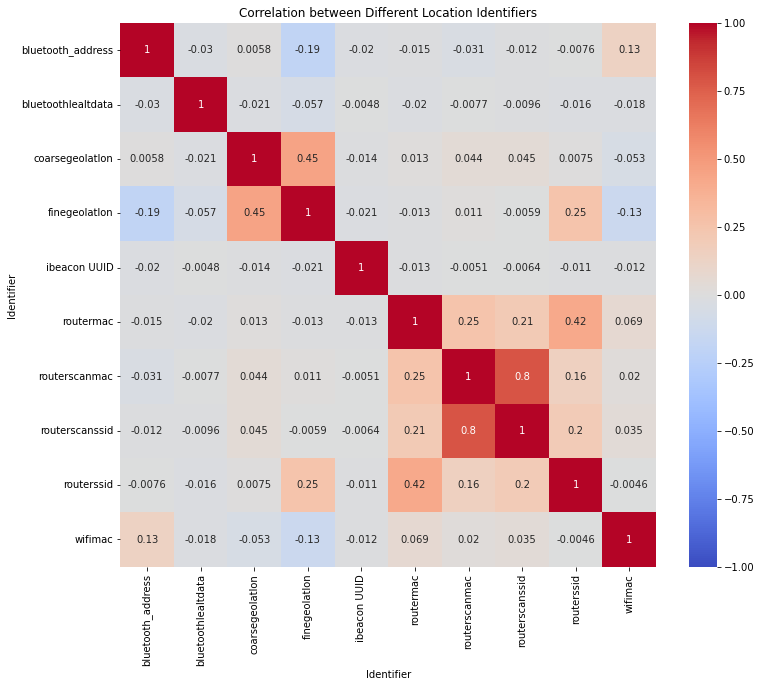

Correlation heatmap between location identifiers saved as 'identifier_correlation.png'
Analysis complete.


In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# # Updated list of location-related identifiers
location_identifiers = [
    'coarsegeolatlon', 'finegeolatlon', 'routerssid', 'bluetooth_address', 'ibeacon UUID',
    'wifimac', 'cellid', 'bluetooth_name', 'routerbssid', 'routermac',
    'routerscanssid', 'routerscanmac', 'bluetoothlealtdata', 'bluetoothlealtdatauuid' 'bluetoothleibeaconmac'
]

# location_identifiers = [item for item in df['Identifier'].unique().tolist() if item != 'bluetoothleibeaconmac0']


# Filter for rows with location identifiers
location_df = df[df['Identifier'].isin(location_identifiers)]

# 1. Analyze apps using multiple location identifiers
app_location_usage = location_df.groupby('Package Name')['Identifier'].agg(list)
app_location_count = app_location_usage.apply(lambda x: len(set(x)))

print("Top 20 apps using the most unique location identifiers:")
print(app_location_count.sort_values(ascending=False).head(20).to_string())

# 2. Most common combinations of location identifiers
common_combinations = app_location_usage.apply(lambda x: tuple(sorted(set(x)))).value_counts().head(20)
print("\
Top 20 most common combinations of location identifiers:")
print(common_combinations.to_string())

# 3. Analyze domains accessing multiple location identifiers
domain_location_usage = location_df.groupby('Domain')['Identifier'].agg(list)
domain_location_count = domain_location_usage.apply(lambda x: len(set(x)))

print("\
Top 20 domains accessing the most unique location identifiers:")
print(domain_location_count.sort_values(ascending=False).head(20).to_string())

# 4. Analyze SDKs using multiple location identifiers
sdk_location_usage = location_df.groupby('SDK')['Identifier'].agg(list)
sdk_location_count = sdk_location_usage.apply(lambda x: len(set(x)))

print("\
Top 20 SDKs using the most unique location identifiers:")
print(sdk_location_count.sort_values(ascending=False).head(20).to_string())

# 5. Analyze Third-Party SDKs using multiple location identifiers
tp_sdk_location_usage = location_df.groupby('TP_SDK')['Identifier'].agg(list)
tp_sdk_location_count = tp_sdk_location_usage.apply(lambda x: len(set(x)))

print("\
Top 20 Third-Party SDKs using the most unique location identifiers:")
print(tp_sdk_location_count.sort_values(ascending=False).head(20).to_string())

# 6. Visualize the distribution of apps by number of location identifiers used
plt.figure(figsize=(12, 6))
sns.histplot(app_location_count, kde=True, bins=20)
plt.title('Distribution of Apps by Number of Unique Location Identifiers Used')
plt.xlabel('Number of Unique Location Identifiers')
plt.ylabel('Number of Apps')
plt.savefig('app_location_identifier_distribution.png')
plt.close()

print("\
Graph saved as 'app_location_identifier_distribution.png'")

# 7. Analyze the correlation between app permissions and location identifier usage
permission_columns = [
    'bluetooth', 'bluetooth_admin', 'bluetooth_connect', 'bluetooth_scan',
    'bluetooth_advertise', 'access_fine_location', 'access_coarse_location',
    'access_background_location'
]

permissions_df = df[['Package Name'] + permission_columns].drop_duplicates()
merged_df = permissions_df.merge(app_location_count.reset_index(), on='Package Name')

correlation_matrix = merged_df[permission_columns + ['Identifier']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between App Permissions and Location Identifier Usage')
plt.savefig('permission_location_correlation.png')
plt.close()

print("\
Correlation heatmap saved as 'permission_location_correlation.png'")

# 8. Analyze the relationship between app installs and location identifier usage
df['installs'] = pd.to_numeric(df['installs'], errors='coerce')
installs_df = df[['Package Name', 'installs']].drop_duplicates()
merged_df = merged_df.merge(installs_df, on='Package Name', how='left')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='installs', y='Identifier', alpha=0.5)
plt.xscale('log')
plt.title('Relationship between App Installs and Location Identifier Usage')
plt.xlabel('Number of Installs (log scale)')
plt.ylabel('Number of Unique Location Identifiers')
plt.savefig('installs_vs_location_identifiers.png')
plt.close()

print("\
Scatter plot saved as 'installs_vs_location_identifiers.png'")

# 9. Example of an app using multiple location identifiers
example_app = app_location_count.idxmax()
example_app_data = location_df[location_df['Package Name'] == example_app]

print(f"\
Example of an app using the most location identifiers: {example_app}")
print("Location identifiers used:")
print(example_app_data['Identifier'].unique())
print("\
Domains accessed:")
print(example_app_data['Domain'].unique())
print("\
SDKs used:")
print(example_app_data['SDK'].unique())
print("\
Third-Party SDKs used:")
print(example_app_data['TP_SDK'].unique())

# 10. Analyze the frequency of each location identifier
identifier_frequency = location_df['Identifier'].value_counts()
print("\
Frequency of each location identifier:")
print(identifier_frequency.to_string())

# 11. Analyze the relationship between realinstalls and location identifier usage
df['realinstalls'] = pd.to_numeric(df['realinstalls'], errors='coerce')
realinstalls_df = df[['Package Name', 'realinstalls']].drop_duplicates()
merged_df = merged_df.merge(realinstalls_df, on='Package Name', how='left')

plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='realinstalls', y='Identifier', alpha=0.5)
plt.xscale('log')
plt.title('Relationship between Real Installs and Location Identifier Usage')
plt.xlabel('Number of Real Installs (log scale)')
plt.ylabel('Number of Unique Location Identifiers')
# plt.savefig('realinstalls_vs_location_identifiers.png')
plt.close()

print("\
Scatter plot saved as 'realinstalls_vs_location_identifiers.png'")

# 12. Analyze the usage of new location identifiers
new_identifiers = ['routerscanssid', 'routerscanmac', 'bluetoothlealtdata', 'bluetoothlealtdatauuid']
new_identifier_usage = location_df[location_df['Identifier'].isin(new_identifiers)].groupby('Identifier')['Package Name'].nunique()

print("\
Usage of new location identifiers:")
print(new_identifier_usage.to_string())

# 13. Analyze the correlation between different location identifiers
identifier_correlation = location_df.pivot_table(index='Package Name', columns='Identifier', values='Value', aggfunc='count').fillna(0)
identifier_correlation = identifier_correlation.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(identifier_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between Different Location Identifiers')
# plt.savefig('identifier_correlation.png')
plt.show()
plt.close()

print("\
Correlation heatmap between location identifiers saved as 'identifier_correlation.png'")

print("\
Analysis complete.")

In [198]:
location_identifiers = [item for item in df['Identifier'].unique().tolist() if item != 'bluetoothleibeaconmac0']

# Filter for rows with location identifiers
location_df = df[df['Identifier'].isin(location_identifiers)]

# 1. Analyze apps using multiple location identifiers
app_location_usage = location_df.groupby('Package Name')['Identifier'].agg(list)
app_location_count = app_location_usage.apply(lambda x: len(set(x)))

print("Top 20 apps using the most unique identifiers:")
print(app_location_count.sort_values(ascending=False).head(20).to_string())

# 2. Most common combinations of location identifiers
common_combinations = app_location_usage.apply(lambda x: tuple(sorted(set(x)))).value_counts().head(20)
print("\
Top 20 most common combinations of identifiers:")
print(common_combinations.to_string())

# 3. Analyze domains accessing multiple location identifiers
domain_location_usage = location_df.groupby('Domain')['Identifier'].agg(list)
domain_location_count = domain_location_usage.apply(lambda x: len(set(x)))

print("\
Top 20 domains accessing the most unique identifiers:")
print(domain_location_count.sort_values(ascending=False).head(20).to_string())

# 4. Analyze SDKs using multiple location identifiers
sdk_location_usage = location_df.groupby('SDK')['Identifier'].agg(list)
sdk_location_count = sdk_location_usage.apply(lambda x: len(set(x)))

print("\
Top 20 SDKs using the most unique identifiers:")
print(sdk_location_count.sort_values(ascending=False).head(20).to_string())

# 5. Analyze Third-Party SDKs using multiple location identifiers
tp_sdk_location_usage = location_df.groupby('TP_SDK')['Identifier'].agg(list)
tp_sdk_location_count = tp_sdk_location_usage.apply(lambda x: len(set(x)))

print("\
Top 20 Third-Party SDKs using the most unique identifiers:")
print(tp_sdk_location_count.sort_values(ascending=False).head(20).to_string())

# 6. Visualize the distribution of apps by number of location identifiers used
plt.figure(figsize=(12, 6))
sns.histplot(app_location_count, kde=True, bins=20)
plt.title('Distribution of Apps by Number of Unique Identifiers Used')
plt.xlabel('Number of Unique Identifiers')
plt.ylabel('Number of Apps')
# plt.savefig('app_location_identifier_distribution.png')
plt.close()

# print("\
# Graph saved as 'app_location_identifier_distribution.png'")


# 9. Example of an app using multiple location identifiers
example_app = app_location_count.idxmax()
example_app_data = location_df[location_df['Package Name'] == example_app]

print(f"\
Example of an app using the most identifiers: {example_app}")
print("identifiers used:")
print(example_app_data['Identifier'].unique())
print("\
Domains accessed:")
print(example_app_data['Domain'].unique())
print("\
SDKs used:")
print(example_app_data['SDK'].unique())
print("\
Third-Party SDKs used:")
print(example_app_data['TP_SDK'].unique())

# 10. Analyze the frequency of each location identifier
identifier_frequency = location_df['Identifier'].value_counts()
print("\
Frequency of each location identifier:")
print(identifier_frequency.to_string())

Top 20 apps using the most unique identifiers:
Package Name
com.zenhotels.android                               11
com.venmo                                           10
com.ratehawk.android                                10
com.gigigo.ipirangaconectcar                        10
com.paypal.merchant.client                          10
org.speedspot.speedspotspeedtest                     9
com.numplates.nomera3                                9
com.digicel.selfcare.mobile                          9
net.difer.weather                                    9
sinet.startup.inDriver                               9
org.speedspot.speedanalytics                         9
org.speedcheck.internet.speed.test                   9
com.hilton.android.hhonors                           9
biz.binarysolutions.qibla                            8
org.speedspot.speedspot                              8
com.mypocketanimalsstudio.guineapigcitysimulator     8
com.weSPPTPBBKotaBogor_13752947                      8
com.m

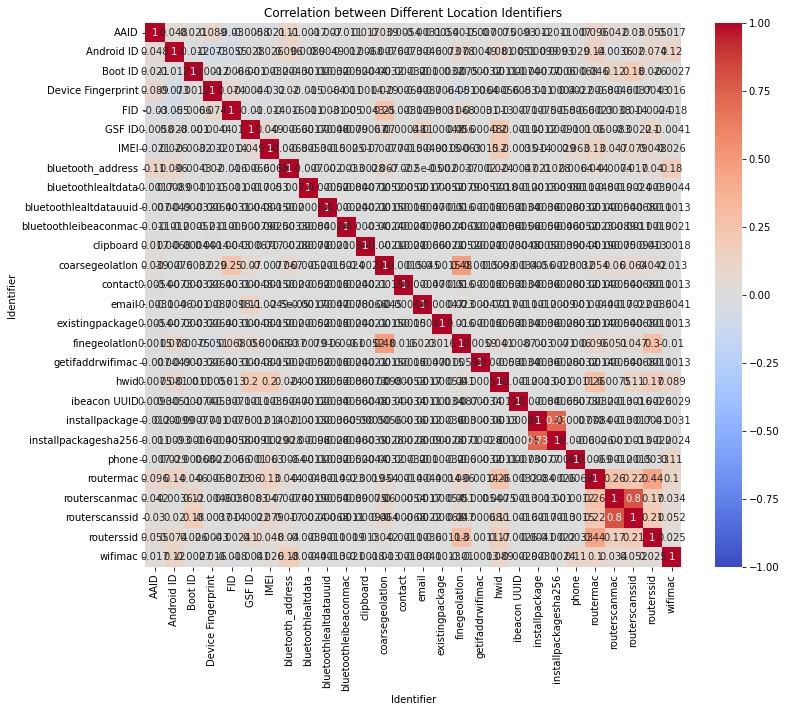

In [199]:

# 13. Analyze the correlation between different location identifiers
identifier_correlation = location_df.pivot_table(index='Package Name', columns='Identifier', values='Value', aggfunc='count').fillna(0)
identifier_correlation = identifier_correlation.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(identifier_correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation between Different Location Identifiers')
plt.show()
# plt.savefig('identifier_correlation.png')
plt.close()

# print("\
# Correlation heatmap between location identifiers saved as 'identifier_correlation.png'")

# print("\
# Analysis complete.")

In [200]:
df['Location_Identifiers_Used'] = df['Identifier'].isin(location_identifiers)
popularity_vs_location = df.groupby('Package Name').agg({
    'installs': 'first',
    'Location_Identifiers_Used': 'any'
})

install_bins = [0, 1000, 10000, 100000, 1000000, float('inf')]
install_labels = ['<1K', '1K-10K', '10K-100K', '100K-1M', '>1M']
popularity_vs_location['Install_Category'] = pd.cut(popularity_vs_location['installs'].astype(float), bins=install_bins, labels=install_labels)

location_usage_by_popularity = popularity_vs_location.groupby('Install_Category')['Location_Identifiers_Used'].mean() * 100

print("\
Percentage of apps using location identifiers by install category:")
print(location_usage_by_popularity.to_string())

# Save the plot
plt.figure(figsize=(10, 6))
location_usage_by_popularity.plot(kind='bar')
plt.title('Percentage of Apps Using Location Identifiers by Install Category')
plt.xlabel('Install Category')
plt.ylabel('Percentage of Apps')
plt.tight_layout()
plt.savefig('location_usage_by_popularity.png')
plt.close()


Percentage of apps using location identifiers by install category:
Install_Category
<1K         78.204082
1K-10K            NaN
10K-100K          NaN
100K-1M           NaN
>1M               NaN


In [201]:
df.columns

Index(['Package Name', 'Domain', 'Identifier', 'Value', 'Transformations',
       'Transformed Values', 'Outbound', 'Inbound', 'Total', 'Direction',
       'TLS', 'Median Transmission Time', 'filename', 'Normalized Domain',
       'package_name', 'bluetooth', 'bluetooth_admin', 'bluetooth_connect',
       'bluetooth_scan', 'bluetooth_advertise', 'access_fine_location',
       'access_coarse_location', 'access_background_location', 'record_audio',
       'change_wifi_state', 'access_wifi_state', 'read_external_storage',
       'realinstalls', 'installs', 'SDK', 'TP_SDK', 'ran_at',
       'Location_Identifiers_Used'],
      dtype='object')

In [202]:
pd.set_option('display.max_colwidth', None)


# df['Identifier'] = df['Identifier'].replace({'aaid': 'AAID', 'bluetoothleibeaconmac0': 'ibeacon MAC address', 
#                                              'routermac': 'Router BSSID', 'routerssid': 'Router SSID',
#                                              'bluetoothleibeaconmac': 'ibeacon MAC address', 'bluetoothleibeaconuuid': 'ibeacon UUID',
#                                              'bluetoothleibeacondata': 'ibeacon UUID', 'wifimac': 'WiFi MAC address'})

df = df[df['Identifier'] != 'bluetoothleibeaconmac0']

filtered_df = df[df['SDK'].notnull()]


sdk_identifiers = filtered_df.groupby('SDK')['Identifier'].unique()
sdk_identifiers = sdk_identifiers.apply(lambda x: ', '.join(x))

# Count the number of unique 'Package Name' values per SDK
sdk_package_count = filtered_df.groupby('SDK')['Package Name'].nunique()

# Combine the results into a single DataFrame
result_df = pd.DataFrame({
    'Identifiers': sdk_identifiers,
    'Package Count': sdk_package_count
})

# Reset index to make SDK a column
result_df = result_df.reset_index()

# Display the resulting DataFrame without truncation
result_df.applymap(lambda x: f"{{x:.2f}}" if isinstance(x, float) else x).to_latex('table.tex', index=False, escape=False)
result_df

,SDK,Identifiers,Package Count
0,Bazaarvoice,AAID,26
1,BlueKai (acquired by Oracle),AAID,20
2,Colocater,"routermac, Android ID",4
3,Cuebiq,"AAID, routermac, routerscanmac, routerscanssid, routerssid, coarsegeolatlon, finegeolatlon",6
4,Demdex,"AAID, routerssid, coarsegeolatlon, FID, finegeolatlon, Android ID, wifimac",85
5,Exponea,Android ID,1
6,Huq Sourcekit,"bluetooth_address, FID, AAID, coarsegeolatlon, finegeolatlon, Android ID, routermac, routerssid",24
7,InMarket,"AAID, coarsegeolatlon, finegeolatlon, Android ID",14
8,Kochava,"AAID, routermac, routerssid, bluetooth_address, Android ID",220
9,Kontakt,bluetoothleibeaconmac,3


In [203]:

def generate_identifier_summary(df, selected_sld):
    # Define the identifiers to be excluded
    excluded_identifiers = [
        'bluetoothlenearbyraw', 'bluetoothlenearbyname',  
        '$videostreamlarge', '$videostream', '$videostreamsmall', 'communicated'
    ]
    
    # Define the list of unique identifiers dynamically
    all_identifiers = df['Identifier'].unique()
    
    # Combine specific identifiers into broader categories
    combined_identifiers = {
        'routerscanmac': [
            'routerscanmac', 'routerscannomapmac', 'routerscannomapoptoutmac', 
            'routerscanoptoutnomapmac', 'routerscanoptoutmac'
        ],
        'routerscanssid': [
            'routerscannomapoptoutssid', 'routerscannomapssid', 
            'routerscanoptoutnomapssid', 'routerscanoptoutssid', 'routerscanssid'
        ],
        'bluetoothscanmac': [
            'bluetoothleibeaconmac0', 'bluetoothleibeaconmac'
        ],
        'bluetoothscanuuid': [
            'bluetoothleibeaconuuid', 'bluetoothleibeacondata', 'bluetoothlealtdatauuid', 'bluetoothlealtdata'
        ],
        'finegeolatlon': [
            'geolatlon$latitude', 'geolatlon$longitude', 'geolatlon'
        ],

        'coarsegeolatlon': [
            'coarsegeolatlon$latitude', 'coarsegeolatlon$longitude', 'coarsegeolatlon'
        ],
        'gsfid': ['Gsfid8', 'gsfid', 'gsfid5']
    }
    
    # Final list of unique identifiers including combined categories and excluding specified ones
    unique_identifiers = [
        idf for idf in all_identifiers 
        if idf not in sum(combined_identifiers.values(), []) and idf not in excluded_identifiers
    ] + list(combined_identifiers.keys())
    
    # Filter the dataframe for the selected SLD
    df_sld = df[df['SDK'] == selected_sld]
    
    # Count the number of unique identifiers for each package name
    identifier_counts = df_sld.groupby('Package Name')['Identifier'].nunique().reset_index()
    
    # Get the top 10 apps with the highest number of unique identifiers
    top_apps = identifier_counts.nlargest(25, 'Identifier')
    
    # Prepare the summary table
    columns = ['Package Name'] + unique_identifiers
    summary_table = pd.DataFrame(columns=columns)
    
    for package in top_apps['Package Name']:
        package_data = df_sld[df_sld['Package Name'] == package]
        
        row = {'Package Name': package}
        
        # Check for each unique identifier
        for identifier in unique_identifiers:
            if identifier in combined_identifiers:
                row[identifier] = 'x' if any(idf in package_data['Identifier'].values for idf in combined_identifiers[identifier]) else ''
            else:
                row[identifier] = 'x' if identifier in package_data['Identifier'].values else ''
        
        summary_table = summary_table.append(row, ignore_index=True)
    
    # Remove columns where all values are empty (no 'x')
    summary_table = summary_table.loc[:, (summary_table != '').any(axis=0)]
    summary_table = summary_table.merge(install_count, left_on='Package Name', right_on='package_name', how='left')
    summary_table.drop(columns=['package_name'], inplace=True)
    cols = summary_table.columns.tolist()
    cols.insert(1, cols.pop(cols.index('installs')))
    summary_table['realinstalls'] = pd.to_numeric(summary_table['realinstalls'], errors='coerce')
    summary_table = summary_table.sort_values('realinstalls', ascending=False)
    # remove the realinstalls column
    cols.remove('realinstalls')
    summary_table = summary_table[cols]

    return summary_table

def print_summary_tables(df, sld_list, out_name):
    for sld in sld_list:
        summary_table = generate_identifier_summary(df, sld)
        print(f"Summary Table for {sld}")
        print(summary_table.to_string(index=False))
        summary_table.applymap(lambda x: f"{{x:.2f}}" if isinstance(x, float) else x).to_latex(out_name, index=False, escape=False)
        print("\n\n\n")



In [204]:
df[df['SDK'] == 'Yandex']

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at,Location_Identifiers_Used
194,ru.mysmartflat.kortros,report.appmetrica.yandex.net,AAID,b8018987-6c16-4464-a4a0-8a7d695d6f4d,[''],[''],10 (8%),0 (0%),10 (4%),[O],...,True,True,True,True,4968.0,NaN,Yandex,None,12,True
195,ru.mysmartflat.kortros,startup.mobile.yandex.net,AAID,b8018987-6c16-4464-a4a0-8a7d695d6f4d,[''],[''],2 (2%),0 (0%),2 (1%),[O],...,True,True,True,True,4968.0,NaN,Yandex,None,12,True
297,ru.mysmartflat.sapfir,report.appmetrica.yandex.net,AAID,b8018987-6c16-4464-a4a0-8a7d695d6f4d,[''],[''],4 (14%),0 (0%),4 (5%),[O],...,True,True,True,True,17576.0,NaN,Yandex,None,12,True
298,ru.mysmartflat.sapfir,startup.mobile.yandex.net,AAID,b8018987-6c16-4464-a4a0-8a7d695d6f4d,[''],[''],2 (7%),0 (0%),2 (3%),[O],...,True,True,True,True,17576.0,NaN,Yandex,None,12,True
429,ru.unicorn.novaCity,report.appmetrica.yandex.net,AAID,95500bf4-5a04-4096-8509-1e6df1c57cc3,[''],[''],4 (12%),0 (0%),4 (6%),[O],...,True,True,True,True,950.0,950.0,Yandex,None,12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138431,com.mgif.ball.bounce.red.blue.stick,report.appmetrica.yandex.net,AAID,04f3a35c-70a9-4bbd-ad71-38cfc2eca584,[''],[''],3 (0%),0 (0%),3 (0%),[O],...,False,False,True,True,759911.0,NaN,Yandex,None,9,True
138910,com.fivecraft.digga,report.appmetrica.yandex.net,AAID,04f3a35c-70a9-4bbd-ad71-38cfc2eca584,[''],[''],4 (1%),0 (0%),4 (1%),[O],...,False,False,True,False,4394540.0,NaN,Yandex,None,9,True
138913,com.fivecraft.digga,startup.mobile.yandex.net,AAID,04f3a35c-70a9-4bbd-ad71-38cfc2eca584,[''],[''],1 (0%),0 (0%),1 (0%),[O],...,False,False,True,False,4394540.0,NaN,Yandex,None,9,True
139061,com.eup.hanzii,startup.mobile.yandex.net,AAID,1546b691-0f78-4061-95e2-33641dbccc2b,[''],[''],1 (0%),0 (0%),1 (0%),[O],...,True,False,False,True,1287411.0,NaN,Yandex,None,9,True


In [205]:
print_summary_tables(df, ['Yandex'], 'y.tex')

Summary Table for Yandex
                            Package Name installs AAID routermac routerssid Android ID clipboard wifimac IMEI routerscanmac routerscanssid
                com.anywayanyday.android     9.9M    x                                                                                    
            com.appidea.pixelswordfishio     8.7M    x                                                                                    
                 com.yandex.browser.beta     4.0M    x                               x         x                                          
                        com.czw.shopsave     3.7M    x                               x                      x                             
                  com.puzzleenglish.main     2.2M    x                               x                                                    
             com.audiosdroid.portableorg     1.8M    x                                                                                    
  

In [206]:
df[df['SDK'] == 'Cuebiq']

    # Rename the realinstalls column to installs
    
    
    # Reorder columns to have 'installs' after 'Package Name'
    

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at,Location_Identifiers_Used
50633,com.mypocketanimalsstudio.guineapigcitysimulator,in.cuebiq.com,AAID,95500bf4-5a04-4096-8509-1e6df1c57cc3,[''],[''],11 (2%),0 (0%),11 (0%),[O],...,False,False,True,True,NaN,NaN,Cuebiq,Cuebiq,12,True
50650,com.mypocketanimalsstudio.guineapigcitysimulator,in.cuebiq.com,routermac,0,[None],[''],8 (1%),0 (0%),8 (0%),[O],...,False,False,True,True,NaN,NaN,Cuebiq,Cuebiq,12,True
50651,com.mypocketanimalsstudio.guineapigcitysimulator,in.cuebiq.com,routerscanmac,AB:B1:A1:1A:1B:BA,[''],[''],8 (1%),0 (0%),8 (0%),[O],...,False,False,True,True,NaN,NaN,Cuebiq,Cuebiq,12,True
50652,com.mypocketanimalsstudio.guineapigcitysimulator,in.cuebiq.com,routerscanmac,upper,[''],[''],8 (1%),0 (0%),8 (0%),[O],...,False,False,True,True,NaN,NaN,Cuebiq,Cuebiq,12,True
50653,com.mypocketanimalsstudio.guineapigcitysimulator,in.cuebiq.com,routerscanmac,upper,[''],[''],8 (1%),0 (0%),8 (0%),[O],...,False,False,True,True,NaN,NaN,Cuebiq,Cuebiq,12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74997,com.epicmobilestudio.alcoholfactorysim,in.cuebiq.com,routerscanssid,quote,[''],[''],6 (2%),0 (0%),6 (0%),[O],...,False,False,True,True,NaN,NaN,Cuebiq,Cuebiq,9,True
74998,com.epicmobilestudio.alcoholfactorysim,in.cuebiq.com,routerscanssid,conspicuousnessindeedallowed,[''],[''],6 (2%),0 (0%),6 (0%),[O],...,False,False,True,True,NaN,NaN,Cuebiq,Cuebiq,9,True
74999,com.epicmobilestudio.alcoholfactorysim,in.cuebiq.com,routerssid,0,['' None],[''],84 (28%),0 (0%),84 (0%),[O],...,False,False,True,True,NaN,NaN,Cuebiq,Cuebiq,9,True
102567,com.alienmanfc6.wheresmyandroid,in.cuebiq.com,AAID,f249b876-862e-4926-95e7-81617f2eba2d,[''],[''],5 (9%),0 (0%),5 (5%),[O],...,False,True,True,True,17630383.0,NaN,Cuebiq,Cuebiq,9,True


In [207]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

# Filter the dataframe based on conditions
filtered_df = df[df['SDK'].notnull()]

# Group by 'TP_SDK' and 'ran_at' and get unique 'Identifier' values
sdk_identifiers = filtered_df.groupby(['SDK', 'ran_at'])['Identifier'].unique()

# Convert the identifier lists to comma-separated strings
sdk_identifiers = sdk_identifiers.apply(lambda x: ', '.join(x)).unstack(fill_value='')

# Count the number of unique 'Package Name' values per SDK
sdk_package_count = filtered_df.groupby('SDK')['Package Name'].nunique()

# Combine the results into a single DataFrame
result_df_sdk = pd.DataFrame({
    'Package Count': sdk_package_count
}).join(sdk_identifiers)

# Reset index to make SDK a column
result_df_sdk = result_df_sdk.reset_index()

# Export to LaTeX format
result_df_sdk.applymap(lambda x: f"{x:.2f}" if isinstance(x, float) else x).to_latex('table.tex', index=False, escape=False)

# Display the result
result_df_sdk


,SDK,Package Count,12,9
0,Bazaarvoice,26,AAID,AAID
1,BlueKai (acquired by Oracle),20,AAID,AAID
2,Colocater,4,routermac,"routermac, Android ID"
3,Cuebiq,6,"AAID, routermac, routerscanmac, routerscanssid, routerssid","AAID, coarsegeolatlon, finegeolatlon, routermac, routerscanmac, routerscanssid, routerssid"
4,Demdex,85,"AAID, routerssid, coarsegeolatlon, FID, finegeolatlon","AAID, coarsegeolatlon, finegeolatlon, Android ID, routerssid, wifimac"
5,Exponea,1,,Android ID
6,Huq Sourcekit,24,"bluetooth_address, FID, AAID, coarsegeolatlon, finegeolatlon","Android ID, AAID, coarsegeolatlon, finegeolatlon, routermac, routerssid, FID, bluetooth_address"
7,InMarket,14,"AAID, coarsegeolatlon, finegeolatlon","AAID, Android ID, coarsegeolatlon, finegeolatlon"
8,Kochava,220,"AAID, routermac, routerssid, bluetooth_address","AAID, routermac, routerssid, Android ID, bluetooth_address"
9,Kontakt,3,bluetoothleibeaconmac,bluetoothleibeaconmac


In [208]:
pd.set_option('display.max_colwidth', None)
filtered_df = df[df['TP_SDK'].notnull() & (df['TP_SDK'] != df['SDK'])]

# Group by 'SDK' and get unique 'Identifier' values
sdk_identifiers = filtered_df.groupby('TP_SDK')['Identifier'].unique()
sdk_identifiers = sdk_identifiers.apply(lambda x: ', '.join(x))

# Count the number of unique 'Package Name' values per SDK
sdk_package_count = filtered_df.groupby('TP_SDK')['Package Name'].nunique()

# Combine the results into a single DataFrame
result_df = pd.DataFrame({
    'Identifiers': sdk_identifiers,
    'Package Count': sdk_package_count
})

# Reset index to make SDK a column
result_df = result_df.reset_index()

result_df.applymap(lambda x: f"{{x:.2f}}" if isinstance(x, float) else x).to_latex('tp_table.tex', index=False, escape=False)
result_df[result_df['Identifiers'] != 'communicated']

,TP_SDK,Identifiers,Package Count
0,AdColony,"AAID, Android ID",25
1,Adjust,"AAID, FID, Android ID, coarsegeolatlon, finegeolatlon",520
2,AdsWizz,"AAID, coarsegeolatlon, finegeolatlon, routerssid",6
3,Amplitude,"AAID, coarsegeolatlon, finegeolatlon, bluetooth_address, Android ID, IMEI, email",190
4,AppLovin (MAX and SparkLabs),"AAID, Android ID, bluetooth_address, bluetoothlealtdata",253
...,...,...,...
80,pingID,"routerscanssid, routerssid, Android ID, wifimac",1
81,socure.io,"routerssid, coarsegeolatlon, finegeolatlon",1
82,taobao,"routermac, Android ID, IMEI",6
83,vauto,bluetoothlealtdata,2


In [209]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

# Filter the dataframe based on conditions
filtered_df = df[df['TP_SDK'].notnull() & (df['TP_SDK'] != df['SDK'])]

# Group by 'TP_SDK' and 'ran_at' and get unique 'Identifier' values
sdk_identifiers = filtered_df.groupby(['TP_SDK', 'ran_at'])['Identifier'].unique()

# Convert the identifier lists to comma-separated strings
sdk_identifiers = sdk_identifiers.apply(lambda x: ', '.join(x)).unstack(fill_value='')

# Count the number of unique 'Package Name' values per SDK
sdk_package_count = filtered_df.groupby('TP_SDK')['Package Name'].nunique()

# Combine the results into a single DataFrame
result_df_tp_sdk = pd.DataFrame({
    'Package Count': sdk_package_count
}).join(sdk_identifiers)

# Reset index to make SDK a column
result_df_tp_sdk = result_df_tp_sdk.reset_index()

# Export to LaTeX format
result_df_tp_sdk.applymap(lambda x: f"{x:.2f}" if isinstance(x, float) else x).to_latex('tp_table.tex', index=False, escape=False)

# Display the result
result_df_tp_sdk = result_df_tp_sdk.rename(columns={'TP_SDK': 'SDK'})
result_df_tp_sdk

,SDK,Package Count,12,9
0,AdColony,25,AAID,"AAID, Android ID"
1,Adjust,520,"AAID, FID","AAID, Android ID, FID, coarsegeolatlon, finegeolatlon"
2,AdsWizz,6,"AAID, coarsegeolatlon, finegeolatlon","AAID, routerssid, coarsegeolatlon, finegeolatlon"
3,Amplitude,190,"AAID, coarsegeolatlon, finegeolatlon, bluetooth_address","AAID, Android ID, coarsegeolatlon, finegeolatlon, bluetooth_address, IMEI, email"
4,AppLovin (MAX and SparkLabs),253,AAID,"AAID, Android ID, bluetooth_address, bluetoothlealtdata"
...,...,...,...,...
80,pingID,1,"routerscanssid, routerssid","Android ID, routerssid, wifimac"
81,socure.io,1,routerssid,"coarsegeolatlon, finegeolatlon, routerssid"
82,taobao,6,routermac,"Android ID, IMEI, routermac"
83,vauto,2,bluetoothlealtdata,bluetoothlealtdata


In [210]:
result_df_sdk

,SDK,Package Count,12,9
0,Bazaarvoice,26,AAID,AAID
1,BlueKai (acquired by Oracle),20,AAID,AAID
2,Colocater,4,routermac,"routermac, Android ID"
3,Cuebiq,6,"AAID, routermac, routerscanmac, routerscanssid, routerssid","AAID, coarsegeolatlon, finegeolatlon, routermac, routerscanmac, routerscanssid, routerssid"
4,Demdex,85,"AAID, routerssid, coarsegeolatlon, FID, finegeolatlon","AAID, coarsegeolatlon, finegeolatlon, Android ID, routerssid, wifimac"
5,Exponea,1,,Android ID
6,Huq Sourcekit,24,"bluetooth_address, FID, AAID, coarsegeolatlon, finegeolatlon","Android ID, AAID, coarsegeolatlon, finegeolatlon, routermac, routerssid, FID, bluetooth_address"
7,InMarket,14,"AAID, coarsegeolatlon, finegeolatlon","AAID, Android ID, coarsegeolatlon, finegeolatlon"
8,Kochava,220,"AAID, routermac, routerssid, bluetooth_address","AAID, routermac, routerssid, Android ID, bluetooth_address"
9,Kontakt,3,bluetoothleibeaconmac,bluetoothleibeaconmac


In [211]:
res = pd.concat([result_df_sdk, result_df_tp_sdk])
res.sort_values('Package Count', ascending=False).applymap(lambda x: f"{x:.2f}" if isinstance(x, float) else x).to_latex('beacon_id_table.tex', index=False, escape=False)
res

,SDK,Package Count,12,9
0,Bazaarvoice,26,AAID,AAID
1,BlueKai (acquired by Oracle),20,AAID,AAID
2,Colocater,4,routermac,"routermac, Android ID"
3,Cuebiq,6,"AAID, routermac, routerscanmac, routerscanssid, routerssid","AAID, coarsegeolatlon, finegeolatlon, routermac, routerscanmac, routerscanssid, routerssid"
4,Demdex,85,"AAID, routerssid, coarsegeolatlon, FID, finegeolatlon","AAID, coarsegeolatlon, finegeolatlon, Android ID, routerssid, wifimac"
...,...,...,...,...
80,pingID,1,"routerscanssid, routerssid","Android ID, routerssid, wifimac"
81,socure.io,1,routerssid,"coarsegeolatlon, finegeolatlon, routerssid"
82,taobao,6,routermac,"Android ID, IMEI, routermac"
83,vauto,2,bluetoothlealtdata,bluetoothlealtdata


In [212]:
res

,SDK,Package Count,12,9
0,Bazaarvoice,26,AAID,AAID
1,BlueKai (acquired by Oracle),20,AAID,AAID
2,Colocater,4,routermac,"routermac, Android ID"
3,Cuebiq,6,"AAID, routermac, routerscanmac, routerscanssid, routerssid","AAID, coarsegeolatlon, finegeolatlon, routermac, routerscanmac, routerscanssid, routerssid"
4,Demdex,85,"AAID, routerssid, coarsegeolatlon, FID, finegeolatlon","AAID, coarsegeolatlon, finegeolatlon, Android ID, routerssid, wifimac"
...,...,...,...,...
80,pingID,1,"routerscanssid, routerssid","Android ID, routerssid, wifimac"
81,socure.io,1,routerssid,"coarsegeolatlon, finegeolatlon, routerssid"
82,taobao,6,routermac,"Android ID, IMEI, routermac"
83,vauto,2,bluetoothlealtdata,bluetoothlealtdata


In [214]:
res

,SDK,Package Count,12,9
0,Bazaarvoice,26,AAID,AAID
1,BlueKai (acquired by Oracle),20,AAID,AAID
2,Colocater,4,routermac,"routermac, Android ID"
3,Cuebiq,6,"AAID, routermac, routerscanmac, routerscanssid, routerssid","AAID, coarsegeolatlon, finegeolatlon, routermac, routerscanmac, routerscanssid, routerssid"
4,Demdex,85,"AAID, routerssid, coarsegeolatlon, FID, finegeolatlon","AAID, coarsegeolatlon, finegeolatlon, Android ID, routerssid, wifimac"
...,...,...,...,...
80,pingID,1,"routerscanssid, routerssid","Android ID, routerssid, wifimac"
81,socure.io,1,routerssid,"coarsegeolatlon, finegeolatlon, routerssid"
82,taobao,6,routermac,"Android ID, IMEI, routermac"
83,vauto,2,bluetoothlealtdata,bluetoothlealtdata


In [213]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships
import itertools

# Function to create a boolean matrix for SDKs and their collected identifiers
def create_identifier_matrix(data, identifier_column):
    # Create a set of all identifiers by splitting, stripping whitespace, and removing empty strings
    all_identifiers = set(
        itertools.chain(*data[identifier_column].apply(lambda x: [i.strip() for i in x.split(',') if i.strip()]))
    )
    
    # Initialize the matrix with zeros
    sdk_matrix = pd.DataFrame(0, index=data['SDK'], columns=all_identifiers)
    
    # Fill the matrix with 1s where an SDK collects a specific identifier
    for idx, row in data.iterrows():
        identifiers = [i.strip() for i in row[identifier_column].split(',') if i.strip()]
        for identifier in identifiers:
            sdk_matrix.loc[row['SDK'], identifier] = 1
            
    return sdk_matrix

# Create boolean matrix for collected_identifiers
identifier_matrix = create_identifier_matrix(res, 'Accessed Items')

# Create memberships list for UpSet plot
memberships = []
for index, row in identifier_matrix.iterrows():
    identifiers_present = row[row == 1].index.tolist()
    memberships.append(identifiers_present)

# Create UpSet plot data
upset_data = from_memberships(memberships, data=identifier_matrix.index)

# Create and plot the UpSet plot
upset = UpSet(upset_data, subset_size='count', sort_by='cardinality', show_counts='%d')
upset.plot()

# Display the plot
plt.title("Overlap of Identifiers Collected by SDKs")
plt.show()


KeyError: 'Accessed Items'

In [ ]:
id_briding_sdk = upset_data.reset_index()

# Count how many identifier categories are True for each SDK (excluding SDK & beacon_sdk columns)
id_briding_sdk["num_identifiers"] = id_briding_sdk.iloc[:, :-2].sum(axis=1)  # Summing across identifier columns

# Ensure no SDK has only one identifier type marked as True
id_briding_sdk = id_briding_sdk[id_briding_sdk["num_identifiers"] > 1]

# Drop the helper column after filtering (optional)
# id_briding_sdk.drop(columns=["num_identifiers"], inplace=True)

# Create a new column indicating whether the SDK is in the beacon list
id_briding_sdk["beacon_sdk"] = id_briding_sdk["SDK"].isin(bt_beacon_sdk)

# Convert to boolean values (True/False)
id_briding_sdk["beacon_sdk"] = id_briding_sdk["beacon_sdk"].astype(bool)

id_briding_sdk[id_briding_sdk["beacon_sdk"] == False]

,AAID,Android ID,Boot ID,Device Fingerprint,FID,GSF ID,IMEI,bluetooth_address,bluetoothlealtdata,bluetoothleibeaconmac,...,hwid,ibeacon UUID,routermac,routerscanmac,routerscanssid,routerssid,wifimac,SDK,num_identifiers,beacon_sdk
2,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,Colocater,2,False
22,True,True,False,False,False,False,True,False,False,False,...,False,False,True,True,True,True,True,Yandex,8,False
25,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,AdColony,2,False
26,True,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,Adjust,5,False
27,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,AdsWizz,4,False
28,True,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,Amplitude,7,False
29,True,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,AppLovin (MAX and SparkLabs),4,False
31,True,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,Appdynamics,3,False
33,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,Appodeal,2,False
34,True,True,False,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,AppsFlyer,6,False


In [ ]:
id_briding_sdk[id_briding_sdk['beacon_sdk'] == True].SDK.nunique()

17

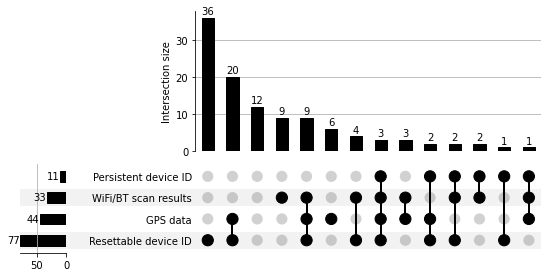

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships
import itertools

# Define the new identifier groups
persistent_identifiers = [
    "android id", "boot id", "gsf id", "imei", "hwid", "wifimac", "device fingerprint", "email"
]
resettable_identifiers = ["AAID", "fid", "bluetooth_address"]
network_identifiers = [
    "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon uuid", "routermac", 
    "routerscanmac", "routerscanssid", "routerssid"
]
gps_identifiers = ['coarsegeolatlon', 'finegeolatlon']


# Mapping the new group names
identifier_groups = {
    "Persistent device ID": persistent_identifiers,
    "Resettable device ID": resettable_identifiers,
    "WiFi/BT scan results": network_identifiers,
    "GPS data": gps_identifiers
}

# Create a function to aggregate the identifiers into their group categories
def create_grouped_matrix(data, identifier_column, identifier_groups):
    sdk_matrix = pd.DataFrame(0, index=data['SDK'], columns=identifier_groups.keys())
    
    # For each row in the data, check if any identifier in a group is present, and mark it in the group column
    for idx, row in data.iterrows():
        identifiers = [i.strip() for i in row[identifier_column].split(',') if i.strip()]
        
        # Check which group(s) these identifiers belong to
        for group_name, group_identifiers in identifier_groups.items():
            if any(identifier in group_identifiers for identifier in identifiers):
                sdk_matrix.loc[row['SDK'], group_name] = 1
    
    return sdk_matrix

# Assuming your dataframe is called 'res' and you have the 'Accessed Items' column
grouped_matrix = create_grouped_matrix(res, 'Accessed Items', identifier_groups)

# Create memberships list for UpSet plot
memberships = []
for index, row in grouped_matrix.iterrows():
    groups_present = row[row == 1].index.tolist()
    memberships.append(groups_present)

# Create UpSet plot data
upset_data = from_memberships(memberships, data=grouped_matrix.index)

# Create and plot the UpSet plot
upset = UpSet(upset_data, subset_size='count', show_counts='%d', sort_by='cardinality', orientation='horizontal')

# Plotting the data
upset.plot()

# Display the plot
# plt.title("Overlap of Persistent, Resettable, Network, and GPS Identifiers by SDKs")
plt.savefig('upset_plot.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [ ]:
res[res['Accessed Items'].str.contains('bluetoothlealtdata')]

,SDK,Package Count,12,9,Accessed Items,Identifiers List,PCA1,PCA2,PCA3,Cluster
4,AppLovin (MAX and SparkLabs),253,AAID,"AAID, Android ID, bluetooth_address, bluetoothlealtdata","AAID, Android ID, bluetoothlealtdata, bluetooth_address","[aaid, android id, bluetoothlealtdata, bluetooth_address]",-0.476209,0.027857,0.684653,3
83,vauto,2,bluetoothlealtdata,bluetoothlealtdata,bluetoothlealtdata,[bluetoothlealtdata],-0.860425,0.020363,-0.467736,3


In [102]:
# Flatten the lists in 'Identifiers List' and find unique identifiers
unique_identifiers = set(identifier for sublist in res['Identifiers List'] for identifier in sublist)

# Get the total number of unique identifiers
total_unique_identifiers = len(unique_identifiers)

# Display the result
total_unique_identifiers


22

In [103]:
df[(df['Domain'].str.endswith('marketingcloudapis.com')) & (df['Identifier'] == 'finegeolatlon')]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at,Location_Identifiers_Used
18149,com.ticketmaster.mobile.android.uk,mcffsqfk870m4ddynf7rgjrccfb0.device.marketingcloudapis.com,finegeolatlon,"location3: 40.336800,-3.770583",[''],[''],2 (0%),2 (0%),4 (0%),"[O, I]",...,False,False,True,True,3224617.0,NaN,Salesforce Marketing Cloud,None,12,True
30744,com.rarewire.forever21,mc5j7mxbmq-3rlyzr4l8nc78djm8.device.marketingcloudapis.com,finegeolatlon,"location3: 40.336800,-3.770583",[''],[''],1 (0%),1 (0%),2 (0%),"[O, I]",...,False,False,True,True,8774135.0,NaN,Salesforce Marketing Cloud,None,12,True
88758,mx.com.liverpool.shoppingapp,mc84n9gcyf9d5fm5mx2w5t0mpwm4.device.marketingcloudapis.com,finegeolatlon,"location3: 40.336800,-3.770583",[''],[''],1 (1%),1 (0%),2 (0%),"[O, I]",...,True,True,True,True,18221234.0,NaN,Salesforce Marketing Cloud,None,12,True
107272,com.inkglobal.cebu.android,mc8tb5pvcmyzq1rkzffy91yzdhr0.device.marketingcloudapis.com,finegeolatlon,"location3: 40.336800,-3.770583",[''],[''],1 (2%),0 (0%),1 (1%),[O],...,False,True,True,True,5496490.0,NaN,Salesforce Marketing Cloud,None,12,True
120956,com.rimac.rimac_surrogas,mczzwxmrkq1dfgvxtyf6655q1-p4.device.marketingcloudapis.com,finegeolatlon,"location3: 40.336800,-3.770583",[''],[''],1 (0%),1 (0%),2 (0%),"[O, I]",...,False,False,True,True,887187.0,NaN,Salesforce Marketing Cloud,None,12,True
135932,com.semparar.semparar.minhaconta2018,mckt7rnbwptnf738ldmt58sq95xm.device.marketingcloudapis.com,finegeolatlon,"location3: 40.336800,-3.770583",[''],[''],1 (2%),1 (3%),2 (2%),"[O, I]",...,True,False,True,True,6143828.0,NaN,Salesforce Marketing Cloud,None,12,True
3408,com.mcentric.mcclient.FCBWorld,mc165bpm4w3qr56fskj-n9wldfg4.device.marketingcloudapis.com,finegeolatlon,"40.336847,-3.770589",[''],[''],2 (0%),2 (0%),4 (0%),"[O, I]",...,False,False,True,True,12157038.0,NaN,Salesforce Marketing Cloud,None,9,True
25634,com.elcorteingles.app,mc0q-j8qbvvktnhbq881n9bw41y4.device.marketingcloudapis.com,finegeolatlon,"40.336741,-3.770646",[''],[''],1 (0%),1 (0%),2 (0%),"[O, I]",...,True,True,True,True,3417546.0,NaN,Salesforce Marketing Cloud,None,9,True
28075,mx.com.liverpool.shoppingapp,mc84n9gcyf9d5fm5mx2w5t0mpwm4.device.marketingcloudapis.com,finegeolatlon,"40.336847,-3.770589",[''],[''],2 (0%),2 (0%),4 (0%),"[O, I]",...,True,True,True,True,18221234.0,NaN,Salesforce Marketing Cloud,None,9,True
31664,com.rarewire.forever21,mc5j7mxbmq-3rlyzr4l8nc78djm8.device.marketingcloudapis.com,finegeolatlon,"location3: 40.336866,-3.770589",[''],[''],1 (0%),1 (0%),2 (0%),"[O, I]",...,False,False,True,True,8774135.0,NaN,Salesforce Marketing Cloud,None,9,True


In [104]:
df[(df['SDK'] == 'Demdex') & (df['Package Name'].str.startswith('com.yinzcam'))]['Package Name'].nunique()

16

In [105]:
df[(df['TP_SDK'] == 'Amplitude') & (df['Identifier'] == 'email')]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at,Location_Identifiers_Used
139117,br.com.brainweb.ifood,api.amplitude.com,email,iag.iot.imdea@gmail.com,[''],[''],2 (2%),0 (0%),2 (2%),[O],...,True,False,True,True,118073495.0,NaN,None,Amplitude,9,True


In [106]:
# List of identifiers to check
persistent_identifiers = ["Boot ID", "GSF ID", "IMEI", "hwid", "wifimac", "email", "phone", "getifaddrwifimac"]

# Group by 'SDK' or another grouping column, and check conditions
grouped_df = df.groupby('SDK')['Identifier'].apply(list)

# Filter SDKs that have both conditions
matching_sdks = grouped_df[grouped_df.apply(
    lambda x: any(identifier in x for identifier in persistent_identifiers) and ('AAID' in x)
)].index

# Filter the original DataFrame for matching SDKs
result_df = df[df['SDK'].isin(matching_sdks)]

# Display the result
result_df['Package Name'].nunique()


494

In [107]:
result_df[(result_df['SDK'] == 'LeanPlum') | (result_df['TP_SDK'] == 'Umeng Analytics') | (result_df['TP_SDK'] == 'Flurry')]['Package Name'].nunique()


184

In [108]:
df.Identifier.unique()

array(['FID', 'coarsegeolatlon', 'finegeolatlon', 'AAID',
       'Device Fingerprint', 'ibeacon UUID', 'routermac', 'routerssid',
       'installpackage', 'installpackagesha256', 'Android ID',
       'bluetooth_address', 'Boot ID', 'email', 'routerscanssid',
       'routerscanmac', 'GSF ID', 'clipboard', 'bluetoothlealtdata',
       'bluetoothleibeaconmac', 'contact', 'wifimac', 'existingpackage',
       'bluetoothlealtdatauuid', 'phone', 'IMEI', 'hwid',
       'getifaddrwifimac'], dtype=object)

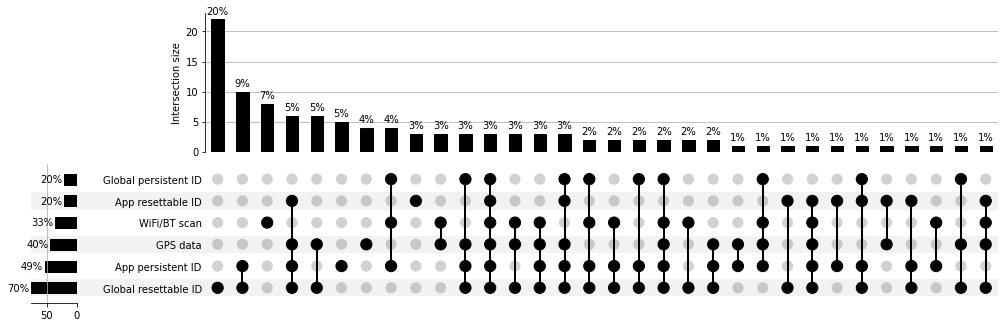

In [109]:
from upsetplot import UpSet, from_indicators

#ONE WITHOUT DEVICE_FINGERPRINT
global_persistent_identifiers = [
    "Boot ID", "GSF ID", "IMEI", "hwid", "wifimac", "email"
]


app_specific_persistent_identifiers = [
    "Android ID"
]

global_resettable_identifiers = [
    "AAID", "bluetooth_address"
]

app_specific_resettable_identifiers = [
    "FID"
]
network_identifiers = [
    "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon UUID", "routermac", 
    "routerscanmac", "routerscanssid", "routerssid", "bluetoothlealtdatauuid"
]

# network_identifiers = [
#      "routermac", 
#     "routerscanmac", "routerscanssid", "routerssid",
# ]


# network_identifiers = [
#  "routermac", "routerssid", 
# ]

# network_identifiers = [
#     "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon UUID", "bluetoothlealtdatauuid"
# ]
location_identifiers = ['coarsegeolatlon', 'finegeolatlon']


identifier_groups = {
    "Global persistent ID": global_persistent_identifiers,
    "App persistent ID": app_specific_persistent_identifiers,
    "Global resettable ID": global_resettable_identifiers,
    "App resettable ID": app_specific_resettable_identifiers,
    "WiFi/BT scan": network_identifiers,
    "GPS data": location_identifiers
}

# Create a function to agregate the identifiers into their group categories
def create_grouped_matrix(data, identifier_column, identifier_groups):
    sdk_matrix = pd.DataFrame(0, index=data['SDK'], columns=identifier_groups.keys())
    
    # For each row in the data, check if any identifier in a group is present, and mark it in the group column
    for idx, row in data.iterrows():
        identifiers = [i.strip() for i in row[identifier_column].split(',') if i.strip()]
        
        # Check which group(s) these identifiers belong to
        for group_name, group_identifiers in identifier_groups.items():
            if any(identifier in group_identifiers for identifier in identifiers):
                sdk_matrix.loc[row['SDK'], group_name] = 1
    
    return sdk_matrix

# Assuming your dataframe is called 'res' and you have the 'Accessed Items' column
grouped_matrix = create_grouped_matrix(res, 'Accessed Items', identifier_groups)

# # Create memberships list for UpSet plot
# memberships = []
# for index, row in grouped_matrix.iterrows():
#     groups_present = row[row == 1].index.tolist()
#     memberships.append(groups_present)

# Create UpSet plot data
memberships = []
for index, row in grouped_matrix.iterrows():
    groups_present = row[row == 1].index.tolist()
    memberships.append(groups_present)

# Remove empty intersections (i.e., rows with no identifier groups assigned)
filtered_memberships = [m for m in memberships if m]  # Keep only non-empty lists
filtered_sdk_index = grouped_matrix.index[[bool(m) for m in memberships]]  # Keep only corresponding SDKs

# Create UpSet plot data with non-empty intersections
upset_data = from_memberships(filtered_memberships, data=filtered_sdk_index)


# # Create UpSet plot data
# upset_data = from_memberships(memberships, data=grouped_matrix.index)

# Get the total number of SDKs for percentage calculation
total_sdks = len(grouped_matrix)
# Create and plot the UpSet plot
upset = UpSet(upset_data, subset_size='count', sort_by='cardinality', orientation='horizontal')

# Plotting the data
fig = upset.plot()

# Get the axis that contains the top bar plot (intersections)
top_ax = fig["intersections"]

# Get the axis that contains the left bar plot (totals for each set)
left_ax = fig["totals"]

plt.setp(top_ax.xaxis.get_majorticklabels(), fontsize=16)  # X-axis labels for intersections
plt.setp(left_ax.yaxis.get_majorticklabels(), fontsize=16)  # Y-axis labels for totals
top_ax.set_xlabel(top_ax.get_xlabel(), fontsize=16)  # X-axis title
left_ax.set_ylabel(left_ax.get_ylabel(), fontsize=16)  # Y-axis title


# Add percentages to the top bar plot (intersection size)
for rect in top_ax.patches:
    height = rect.get_height()
    if height > 0:
        # Calculate the percentage
        percentage = (height / total_sdks) * 100
        # Annotate the bars with percentage text
        top_ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, f'{percentage:.0f}%', 
                    ha='center', va='bottom', fontsize=10, color='black')

# Add percentages to the left bar plot (set sizes)
for rect in left_ax.patches:
    width = rect.get_width()
    if width > 0:
        # Calculate the percentage
        percentage = (width / total_sdks) * 100
        # Annotate the bars with percentage text
        left_ax.text(width + 40, rect.get_y() + rect.get_height() / 2, f'{percentage:.0f}%', 
                     ha='left', va='center', fontsize=10, color='black')

# plt.gcf().set_size_inches(12, 12)  # Adjust the figure size if needed

plt.savefig('upset_plot_with_percentages_both.svg', format="svg", bbox_inches="tight")
plt.show()


In [110]:
id_briding_sdk = upset_data.reset_index()

# Count how many identifier categories are True for each SDK (excluding SDK & beacon_sdk columns)
id_briding_sdk["num_identifiers"] = id_briding_sdk.iloc[:, :-2].sum(axis=1)  # Summing across identifier columns

# Ensure no SDK has only one identifier type marked as True
id_briding_sdk = id_briding_sdk[id_briding_sdk["num_identifiers"] > 1]

# Drop the helper column after filtering (optional)
# id_briding_sdk.drop(columns=["num_identifiers"], inplace=True)

# Create a new column indicating whether the SDK is in the beacon list
id_briding_sdk["beacon_sdk"] = id_briding_sdk["SDK"].isin(bt_beacon_sdk)

# Convert to boolean values (True/False)
id_briding_sdk["beacon_sdk"] = id_briding_sdk["beacon_sdk"].astype(bool)

id_briding_sdk[id_briding_sdk["beacon_sdk"] == False]

,App persistent ID,App resettable ID,GPS data,Global persistent ID,Global resettable ID,WiFi/BT scan,SDK,num_identifiers,beacon_sdk
22,True,False,False,True,True,True,Yandex,3,False
25,True,False,False,False,True,False,AdColony,2,False
26,True,True,True,False,True,False,Adjust,4,False
27,False,False,True,False,True,True,AdsWizz,2,False
28,True,False,True,True,True,False,Amplitude,4,False
29,True,False,False,False,True,True,AppLovin (MAX and SparkLabs),2,False
31,True,False,False,True,True,False,Appdynamics,3,False
34,True,True,True,True,True,False,AppsFlyer,5,False
35,True,False,False,False,True,False,Backtrace,2,False
36,True,True,True,False,True,False,Batch,4,False


In [111]:
id_briding_sdk[id_briding_sdk["num_identifiers"] == 1]


,App persistent ID,App resettable ID,GPS data,Global persistent ID,Global resettable ID,WiFi/BT scan,SDK,num_identifiers,beacon_sdk


In [112]:
id_briding_sdk[id_briding_sdk["SDK"] == 'Batch']

,App persistent ID,App resettable ID,GPS data,Global persistent ID,Global resettable ID,WiFi/BT scan,SDK,num_identifiers,beacon_sdk
36,True,True,True,False,True,False,Batch,4,False


In [113]:
id_briding_sdk.SDK.nunique()

61

In [114]:
id_briding_sdk[id_briding_sdk['GPS data'] == True]

,App persistent ID,App resettable ID,GPS data,Global persistent ID,Global resettable ID,WiFi/BT scan,SDK,num_identifiers,beacon_sdk
3,False,False,True,False,True,True,Cuebiq,2,True
4,True,True,True,True,True,True,Demdex,5,True
6,True,True,True,False,True,True,Huq Sourcekit,4,True
7,True,False,True,False,True,False,InMarket,3,True
10,True,True,True,True,True,False,LeanPlum,5,True
11,False,False,True,True,True,False,Pilgrim by Foursquare,3,True
12,False,False,True,False,True,False,Point Inside,2,True
14,True,False,True,False,True,True,Radar,3,True
16,False,True,True,False,False,False,Rover SDK,2,True
17,True,True,True,False,True,False,Salesforce Marketing Cloud,4,True


In [115]:
sdk_list = set(id_briding_sdk[id_briding_sdk['WiFi/BT scan'] == True]['SDK'].unique().tolist())
briding = df
briding['beacon_sdk'] = df['SDK'].isin(sdk_list).astype(bool)

In [116]:
# install count of apps with sdks that perform ID bridging
human_readable_format(briding[briding['beacon_sdk'] == True].drop_duplicates(subset=['Package Name', 'beacon_sdk']).realinstalls.sum())

'4B'

In [117]:
up = upset_data.reset_index()
wifi_bt_scan_sdks = up[up["WiFi/BT scan"] == True]

wifi_bt_scan_sdks.SDK.nunique() / up.SDK.nunique() * 100

33.02752293577982

In [118]:
#intersection
global_resttable_sdks = up[(up["Global resettable ID"] == True) & (up["WiFi/BT scan"] == False) & (up["Global persistent ID"] == False) & (up["App persistent ID"] == False) & (up["App resettable ID"] == False) & (up["GPS data"] == False)]
global_resttable_sdks.SDK.nunique() / up.SDK.nunique() * 100

20.18348623853211

In [119]:
#union
global_resttable_sdks = up[up["Global resettable ID"] == True]
global_resttable_sdks.SDK.nunique() / up.SDK.nunique() * 100

70.64220183486239

In [120]:
import numpy as np

# Create a new column with NaN as default
df["beacon_sdk_name"] = np.nan

# Assign values where SDK or TP_SDK matches bt_beacon_sdk
df.loc[df['SDK'].isin(bt_beacon_sdk), "beacon_sdk_name"] = df.loc[df['SDK'].isin(bt_beacon_sdk), "SDK"]
df.loc[df['TP_SDK'].isin(bt_beacon_sdk), "beacon_sdk_name"] = df.loc[df['TP_SDK'].isin(bt_beacon_sdk), "TP_SDK"]
df[df['beacon_sdk_name'].notna()]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at,Location_Identifiers_Used,beacon_sdk,beacon_sdk_name
120,com.innovatise.malvernactive,sns.eu-central-1.amazonaws.com,FID,NaN,[''],[''],6 (5%),0 (0%),6 (2%),[O],...,NaN,NaN,NaN,NaN,Sense360,None,12,True,False,Sense360
163,com.clarifimedia.festyvent.breakingconvention,pinpoint.eu-west-1.amazonaws.com,FID,NaN,[''],[''],4 (1%),0 (0%),4 (1%),[O],...,True,True,653.0,653.0,Sense360,None,12,True,False,Sense360
254,com.innovatise.myoloft,sns.eu-central-1.amazonaws.com,FID,NaN,[''],[''],4 (5%),0 (0%),4 (2%),[O],...,True,True,887.0,887.0,Sense360,None,12,True,False,Sense360
319,com.clarifimedia.festyvent.nbhood,pinpoint.eu-west-1.amazonaws.com,FID,NaN,[''],[''],4 (2%),0 (0%),4 (1%),[O],...,True,True,12729.0,NaN,Sense360,None,12,True,False,Sense360
946,br.com.ubook.ubookapp,control.kochava.com,AAID,95500bf4-5a04-4096-8509-1e6df1c57cc3,[''],[''],1 (2%),0 (0%),1 (1%),[O],...,True,False,3689575.0,NaN,Kochava,None,12,True,True,Kochava
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139864,com.tpaay.bigpay,api.leanplum.com,finegeolatlon,"40.336847,-3.770589",[''],[''],1 (2%),0 (0%),1 (1%),[O],...,True,True,2906434.0,NaN,LeanPlum,LeanPlum,9,True,False,LeanPlum
139867,com.murka.infinityslots,api.leanplum.com,Android ID,c3e395ab84d0e8d8,[''],[''],6 (1%),0 (0%),6 (1%),[O],...,True,True,5157276.0,NaN,LeanPlum,LeanPlum,9,True,False,LeanPlum
139918,de.mcdonalds.mcdonaldsinfoapp,identity.mparticle.com,AAID,f249b876-862e-4926-95e7-81617f2eba2d,[''],[''],1 (1%),2 (3%),3 (2%),"[O, I]",...,True,True,23360500.0,NaN,mParticle,mParticle,9,True,False,mParticle
139919,de.mcdonalds.mcdonaldsinfoapp,dpm.demdex.net,AAID,f249b876-862e-4926-95e7-81617f2eba2d,[''],[''],1 (1%),0 (0%),1 (1%),[O],...,True,True,23360500.0,NaN,Demdex,Demdex,9,True,True,Demdex


In [121]:
df[(~df['beacon_sdk_name'].notna()) & (df['Identifier'].str.contains('bluetoothle|beacon|router|geolatlon'))].TP_SDK.nunique()

44

In [122]:
selected_values = grouped_matrix[grouped_matrix['GPS data'] == 1].index
remaining_values = selected_values.difference(df['beacon_sdk_name'].dropna().unique())
len(selected_values)
print("no sdks collecting gps: {}".format(len(selected_values)))
print('no beacon SDKs collecting gps data: {}'.format(df[df['beacon_sdk_name'].isin(grouped_matrix[grouped_matrix['GPS data'] == 1].index)].beacon_sdk_name.nunique()))
leng = len(grouped_matrix[grouped_matrix['GPS data'] == 1].index)
print('no non-beacon sdks collecting gps: {}'. format(len(remaining_values)))

print('beacon SDKs collecting gps data: {}'.format(df[df['beacon_sdk_name'].isin(grouped_matrix[grouped_matrix['GPS data'] == 1].index)].beacon_sdk_name.unique()))
print('non-beacon SDKs collecting gps: {}'.format(remaining_values))

no sdks collecting gps: 44
no beacon SDKs collecting gps data: 13
no non-beacon sdks collecting gps: 31
beacon SDKs collecting gps data: ['Sense360' 'mParticle' 'Demdex' 'Huq Sourcekit' 'Radar' 'Rover SDK'
 'LeanPlum' 'InMarket' 'Salesforce Marketing Cloud' 'Point Inside'
 'Pilgrim by Foursquare' 'Cuebiq' 'Woosmap SDK']
non-beacon SDKs collecting gps: Index(['Adjust', 'AdsWizz', 'Amplitude', 'AppsFlyer', 'Batch',
       'Braze (formerly Appboy)', 'Data dog', 'Display', 'Flurry', 'FreeWheel',
       'Inmobi', 'Loggly', 'Mapbox', 'MixPanel', 'New Relic', 'Omniture',
       'OneSignal', 'Opensignal', 'Proxy Cloud', 'PubMatic', 'PubNative',
       'Sentry', 'appICE', 'cellrebel', 'conviva', 'incognia', 'locationiq',
       'paypal', 'phunware', 'socure.io', 'vizbee'],
      dtype='object', name='SDK')


In [123]:
selected_values = grouped_matrix[grouped_matrix['WiFi/BT scan'] == 1].index
remaining_values = selected_values.difference(df['beacon_sdk_name'].dropna().unique())
len(selected_values)
print("no sdks collecting WiFi/BT scan: {}".format(len(selected_values)))
print('no beacon SDKs collecting WiFi/BT scan data: {}'.format(df[df['beacon_sdk_name'].isin(grouped_matrix[grouped_matrix['WiFi/BT scan'] == 1].index)].beacon_sdk_name.nunique()))
print('no non-beacon sdks collecting WiFi/BT scan: {}'. format(len(remaining_values)))

print('beacon SDKs collecting WiFi/BT scan data: {}'.format(df[df['beacon_sdk_name'].isin(grouped_matrix[grouped_matrix['WiFi/BT scan'] == 1].index)].beacon_sdk_name.unique()))
print('non-beacon SDKs collecting WiFi/BT scan: {}'.format(remaining_values))

no sdks collecting WiFi/BT scan: 36
no beacon SDKs collecting WiFi/BT scan data: 7
no non-beacon sdks collecting WiFi/BT scan: 29
beacon SDKs collecting WiFi/BT scan data: ['Kochava' 'Demdex' 'Huq Sourcekit' 'Radar' 'Kontakt' 'Cuebiq'
 'Proximi.io']
non-beacon SDKs collecting WiFi/BT scan: Index(['AdsWizz', 'AppLovin (MAX and SparkLabs)', 'Colocater', 'Data dog',
       'Forter', 'IPQualityScore', 'JPush', 'My Tracker SDK', 'Omniture',
       'Proxy Cloud', 'Sentry', 'Tangerine', 'Yandex', 'alipay', 'appICE',
       'breinify', 'cellrebel', 'comcast', 'conviva', 'ignitionsoftmobile',
       'incognia', 'lazada', 'paypal', 'phunware', 'pingID', 'socure.io',
       'taobao', 'vauto', 'vizbee'],
      dtype='object', name='SDK')


In [124]:
# Identify SDKs that access resettable IDs (global or app-specific)
resettable_sdks = grouped_matrix[(grouped_matrix['Global resettable ID'] == 1)].index

# Identify SDKs that access persistent IDs (global or app-specific)
persistent_sdks = grouped_matrix[(grouped_matrix['Global persistent ID'] == 1)].index

# Identify SDKs that access GPS data
gps_sdks = grouped_matrix[grouped_matrix['WiFi/BT scan'] == 1].index

# Find SDKs linking GPS data with resettable or persistent IDs
linking_sdks = set(gps_sdks).intersection(set(resettable_sdks).union(set(persistent_sdks)))

# Calculate percentage
percentage_linking_sdks = (len(linking_sdks) / total_sdks) * 100

# Display the result
print(f"Percentage of SDKs linking GPS data with resettable or persistent IDs: {percentage_linking_sdks:.2f}%")


Percentage of SDKs linking GPS data with resettable or persistent IDs: 21.82%


In [125]:
linking_sdks

{'AdsWizz',
 'AppLovin (MAX and SparkLabs)',
 'Cuebiq',
 'Data dog',
 'Demdex',
 'Forter',
 'Huq Sourcekit',
 'IPQualityScore',
 'Kochava',
 'My Tracker SDK',
 'Omniture',
 'Radar',
 'Sentry',
 'Tangerine',
 'Yandex',
 'alipay',
 'appICE',
 'conviva',
 'incognia',
 'paypal',
 'phunware',
 'pingID',
 'taobao',
 'vizbee'}

In [126]:
df[df['beacon_sdk_name'].isin(linking_sdks)].beacon_sdk_name.unique()
df[df['beacon_sdk_name'].isin(linking_sdks)].beacon_sdk_name.nunique()


5

In [118]:
# Identify SDKs that access resettable IDs (global or app-specific)
resettable_sdks = grouped_matrix[(grouped_matrix['Global resettable ID'] == 1)].index

# Identify SDKs that access persistent IDs (global or app-specific)
persistent_sdks = grouped_matrix[(grouped_matrix['Global persistent ID'] == 1)].index

# Identify SDKs that access GPS data
gps_sdks = grouped_matrix[grouped_matrix['WiFi/BT scan'] == 1].index

# Find SDKs linking GPS data with resettable or persistent IDs
linking_sdks = set(gps_sdks).intersection(set(resettable_sdks).union(set(persistent_sdks)))

# Get the list of SDKs doing this
linking_sdks_list = list(linking_sdks)

# Identify the apps associated with these SDKs
linking_apps = df[df['SDK'].isin(linking_sdks_list) | df['TP_SDK'].isin(linking_sdks_list)]['Package Name'].unique()

# Count the number of unique apps
number_of_apps = len(linking_apps)

# # Display the results
print(f"Number of apps linking GPS data with resettable or persistent IDs: {number_of_apps}")
print(f"List of SDKs linking GPS data with resettable or persistent IDs: {linking_sdks_list}")


Number of apps linking GPS data with resettable or persistent IDs: 1070
List of SDKs linking GPS data with resettable or persistent IDs: ['paypal', 'Forter', 'taobao', 'appICE', 'Demdex', 'My Tracker SDK', 'AppLovin (MAX and SparkLabs)', 'Yandex', 'incognia', 'Omniture', 'Radar', 'Huq Sourcekit', 'Cuebiq', 'Data dog', 'Kochava', 'alipay', 'AdsWizz', 'pingID', 'phunware', 'vizbee', 'Tangerine', 'IPQualityScore', 'Sentry', 'conviva']


In [119]:
# Identify SDKs that access resettable IDs (global or app-specific)
resettable_sdks = grouped_matrix[(grouped_matrix['Global resettable ID'] == 1)].index

# Identify SDKs that access persistent IDs (global or app-specific)
persistent_sdks = grouped_matrix[(grouped_matrix['Global persistent ID'] == 1)].index

# Identify SDKs that access GPS data
gps_sdks = grouped_matrix[grouped_matrix['WiFi/BT scan'] == 1].index

# Find apps where SDKs collect both GPS data and resettable IDs
gps_resettable_apps = df[df['SDK'].isin(gps_sdks) & df['SDK'].isin(resettable_sdks) |
                         df['TP_SDK'].isin(gps_sdks) & df['TP_SDK'].isin(resettable_sdks)]['Package Name'].unique()

# Find apps where SDKs collect both GPS data and persistent IDs
gps_persistent_apps = df[df['SDK'].isin(gps_sdks) & df['SDK'].isin(persistent_sdks) |
                         df['TP_SDK'].isin(gps_sdks) & df['TP_SDK'].isin(persistent_sdks)]['Package Name'].unique()

# Combine the two sets of apps to get unique apps
unique_apps = set(gps_resettable_apps).union(set(gps_persistent_apps))

# Count the number of unique apps
number_of_unique_apps = len(gps_resettable_apps)

# Display the results
print(f"Number of unique apps linking GPS data with resettable or persistent IDs: {number_of_unique_apps}")
print(f"List of unique apps: {unique_apps}")


Number of unique apps linking GPS data with resettable or persistent IDs: 1060
List of unique apps: {'com.risesoftware.madison181', 'com.healthy.workout.butt.legs.trainer', 'com.disney.wdpro.dlr', 'com.wMadhyamikMathematicsSuggestion_14801593', 'com.miniit.spotit', 'com.toursphere.bc', 'com.wDiscoveryPublicSchool_16398193', 'com.risesoftware.oakpoint', 'com.doapps.android.mln.MLN_dba9d977d835f194cef46def062fb44d', 'com.weathercreative.wildlifeweather', 'com.wVideoonDemandMovieandTVSeries_8879457', 'com.v1_4.solamenteporgracia.com', 'com.game.ball.push', 'com.renderedideas.idlefarmingtycoon', 'com.punchh.burger21', 'com.playrix.township', 'com.appidea.pixelswordfishio', 'com.movzy.doxcy.rivoxy.movie', 'com.gpshopper.boohooman', 'ocean.nomad.survival.simulator', 'com.wWordCollectfun_16312361', 'com.gratitude.challenge', 'com.yinzcam.nfl.cowboys', 'com.hoangkhanh.Browser_11465671', 'com.lane.mybrookfield', 'com.qublix.solitairetalestwo', 'com.emoji.coolkeyboard', 'com.wGoldwingMotoClubMon

In [120]:
# Identify SDKs that access AAID
aaid_sdks = grouped_matrix[grouped_matrix['Global resettable ID'] == 1].index

# Identify SDKs that access any persistent ID (global persistent)
persistent_sdks = grouped_matrix[grouped_matrix['Global persistent ID'] == 1].index

# Find SDKs linking AAID with persistent IDs
linking_sdks = set(aaid_sdks).intersection(set(persistent_sdks))

# Calculate percentage
percentage_linking_sdks = (len(linking_sdks) / total_sdks) * 100


# Get the list of SDKs doing this
linking_sdks_list = list(linking_sdks)

# Identify the apps associated with these SDKs
linking_apps = df[df['SDK'].isin(linking_sdks_list) | df['TP_SDK'].isin(linking_sdks_list)]['Package Name'].unique()

# Count the number of unique apps
number_of_apps = len(linking_apps)

print(f"no of sdks: {len(linking_sdks)}")
print(f"Number of apps linking GPS data with persistent IDs: {number_of_apps}")
print(f"Percentage of SDKs linking AAID with persistent IDs: {percentage_linking_sdks:.2f}%")
print(f"List of SDKs linking AAID with persistent IDs: {linking_sdks_list}")


no of sdks: 17
Number of apps linking GPS data with persistent IDs: 1547
Percentage of SDKs linking AAID with persistent IDs: 15.45%
List of SDKs linking AAID with persistent IDs: ['Yandex', 'Forter', 'incognia', 'Appdynamics', 'MixPanel', 'Pilgrim by Foursquare', 'Amplitude', 'Google Analytics', 'LeanPlum', 'Flurry', 'Omniture', 'Demdex', 'AppsFlyer', 'New Relic', 'Data dog', 'Umeng Analytics', 'Sentry']


In [121]:
df[df['TP_SDK'] == 'Amplitude'].Identifier.unique()

array(['AAID', 'coarsegeolatlon', 'finegeolatlon', 'bluetooth_address',
       'Android ID', 'IMEI', 'email'], dtype=object)

In [122]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Global persistent ID"] == 1) & (grouped_matrix["Global resettable ID"] == 1) & (grouped_matrix["GPS data"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing peristent and resettable ID and GPS")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing peristent and resettable ID and GPS
Index(['Demdex', 'LeanPlum', 'Pilgrim by Foursquare', 'Amplitude', 'AppsFlyer',
       'Data dog', 'Flurry', 'MixPanel', 'New Relic', 'Omniture', 'Sentry',
       'incognia'],
      dtype='object', name='SDK')
SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: LeanPlum
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, FID, AAID

SDK: Pilgrim by Foursquare
Identifiers Collected: email, finegeolatlon, coarsegeolatlon, AAID

SDK: Amplitude
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, bluetooth_address, email, AAID

SDK: AppsFlyer
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, FID, AAID

SDK: Data dog
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Device Fingerprint, Android ID, FID, routermac, AAID, routerssid

SDK: Flurry
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, An

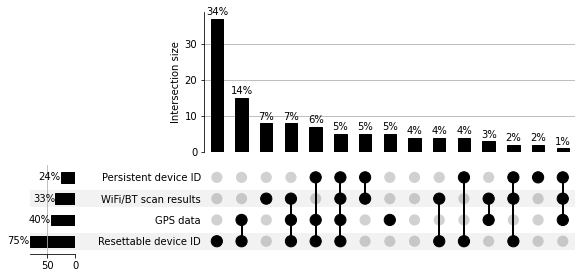

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships
import itertools

# Define the new identifier groups
persistent_identifiers = [
    "Boot ID", "GSF ID", "IMEI", "hwid", "wifimac", "Device Fingerprint", "email", "phone", "getifaddrwifimac"
]
resettable_identifiers = ["AAID", "FID", "bluetooth_address"]
network_identifiers = [
    "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon UUID", "routermac", 
    "routerscanmac", "routerscanssid", "routerssid"
]
gps_identifiers = ['coarsegeolatlon', 'finegeolatlon']

# Mapping the new group names
identifier_groups = {
    "Persistent device ID": persistent_identifiers,
    "Resettable device ID": resettable_identifiers,
    "WiFi/BT scan results": network_identifiers,
    "GPS data": gps_identifiers
}

# Create a function to aggregate the identifiers into their group categories
def create_grouped_matrix(data, identifier_column, identifier_groups):
    sdk_matrix = pd.DataFrame(0, index=data['SDK'], columns=identifier_groups.keys())
    
    # For each row in the data, check if any identifier in a group is present, and mark it in the group column
    for idx, row in data.iterrows():
        identifiers = [i.strip() for i in row[identifier_column].split(',') if i.strip()]
        
        # Check which group(s) these identifiers belong to
        for group_name, group_identifiers in identifier_groups.items():
            if any(identifier in group_identifiers for identifier in identifiers):
                sdk_matrix.loc[row['SDK'], group_name] = 1
    
    return sdk_matrix

# Assuming your dataframe is called 'res' and you have the 'Accessed Items' column
grouped_matrix = create_grouped_matrix(res, 'Accessed Items', identifier_groups)

# Create memberships list for UpSet plot
memberships = []
for index, row in grouped_matrix.iterrows():
    groups_present = row[row == 1].index.tolist()
    memberships.append(groups_present)

# Create UpSet plot data
upset_data = from_memberships(memberships, data=grouped_matrix.index)

# Get the total number of SDKs for percentage calculation
total_sdks = len(grouped_matrix)

# Create and plot the UpSet plot
upset = UpSet(upset_data, subset_size='count', sort_by='cardinality', orientation='horizontal')

# Plotting the data
fig = upset.plot()

# Get the axis that contains the top bar plot (intersections)
top_ax = fig["intersections"]

# Get the axis that contains the left bar plot (totals for each set)
left_ax = fig["totals"]



# Add percentages to the top bar plot (intersection size)
for rect in top_ax.patches:
    height = rect.get_height()
    if height > 0:
        # Calculate the percentage
        percentage = (height / total_sdks) * 100
        # Annotate the bars with percentage text
        top_ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, f'{percentage:.0f}%', 
                    ha='center', va='bottom', fontsize=10, color='black')

# Add percentages to the left bar plot (set sizes)
for rect in left_ax.patches:
    width = rect.get_width()
    if width > 0:
        # Calculate the percentage
        percentage = (width / total_sdks) * 100
        # Annotate the bars with percentage text
        left_ax.text(width + 40, rect.get_y() + rect.get_height() / 2, f'{percentage:.0f}%', 
                     ha='left', va='center', fontsize=10, color='black')

# Save and display the plot
plt.savefig('upset_plot_with_percentages_both.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [124]:
print(grouped_matrix.sum(axis=0))  # Check total counts per category
print(memberships)


Persistent device ID    26
Resettable device ID    82
WiFi/BT scan results    36
GPS data                44
dtype: int64
[['Resettable device ID'], ['Resettable device ID'], ['WiFi/BT scan results'], ['Resettable device ID', 'WiFi/BT scan results', 'GPS data'], ['Persistent device ID', 'Resettable device ID', 'WiFi/BT scan results', 'GPS data'], [], ['Resettable device ID', 'WiFi/BT scan results', 'GPS data'], ['Resettable device ID', 'GPS data'], ['Resettable device ID', 'WiFi/BT scan results'], ['WiFi/BT scan results'], ['Persistent device ID', 'Resettable device ID', 'GPS data'], ['Persistent device ID', 'Resettable device ID', 'GPS data'], ['Resettable device ID', 'GPS data'], ['Persistent device ID', 'WiFi/BT scan results'], ['Resettable device ID', 'WiFi/BT scan results', 'GPS data'], ['Resettable device ID'], ['Resettable device ID', 'GPS data'], ['Resettable device ID', 'GPS data'], ['Resettable device ID', 'GPS data'], ['Resettable device ID'], ['Resettable device ID'], ['GPS 

In [125]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Resettable device ID"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing Resettable identifers")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing Resettable identifers
Index(['Bazaarvoice', 'BlueKai (acquired by Oracle)', 'Cuebiq', 'Demdex',
       'Huq Sourcekit', 'InMarket', 'Kochava', 'LeanPlum',
       'Pilgrim by Foursquare', 'Point Inside', 'Radar', 'Radius Networks',
       'Rover SDK', 'Salesforce Marketing Cloud', 'Sense360', 'Singlespot',
       'Swrve', 'Yandex', 'Yinzcam Sobek', 'mParticle', 'AdColony', 'Adjust',
       'AdsWizz', 'Amplitude', 'AppLovin (MAX and SparkLabs)', 'AppNexus',
       'Appdynamics', 'Appnext', 'Appodeal', 'AppsFlyer', 'Backtrace', 'Batch',
       'Braze (formerly Appboy)', 'CleverTap', 'Criteo', 'Data dog', 'Display',
       'Flurry', 'Foresee', 'Forter', 'FreeWheel', 'Gemius HeatMap',
       'Google AdMob', 'Google Analytics', 'Google CrashLytics',
       'Google DoubleClick', 'Heap', 'HyprMX', 'Inmobi',
       'Instreamatic (Adman)', 'Millennial Media', 'Mintegral', 'MixPanel',
       'My Tracker SDK', 'New Relic', 'Ogury Presage', 'Omniture', 'OneSignal',
       'OutBrain',

In [126]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Persistent device ID"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing persistent identifers")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing persistent identifers
Index(['Demdex', 'LeanPlum', 'Pilgrim by Foursquare', 'Proximi.io', 'Yandex',
       'Amplitude', 'Appdynamics', 'AppsFlyer', 'Data dog', 'Flurry', 'Forter',
       'Google Analytics', 'HelpShift', 'HyprMX', 'IPQualityScore', 'MixPanel',
       'New Relic', 'Omniture', 'Sentry', 'SmartLook', 'Umeng Analytics',
       'alipay', 'incognia', 'paypal', 'pingID', 'taobao'],
      dtype='object', name='SDK')
SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: LeanPlum
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, FID, AAID

SDK: Pilgrim by Foursquare
Identifiers Collected: email, finegeolatlon, coarsegeolatlon, AAID

SDK: Proximi.io
Identifiers Collected: Device Fingerprint, ibeacon UUID

SDK: Yandex
Identifiers Collected: IMEI, routerscanssid, wifimac, Android ID, routerscanmac, clipboard, routermac, AAID, routerssid

SDK: Amplitude
Identifiers Collected: finegeola

In [127]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Resettable device ID"] == 1) & (grouped_matrix["Persistent device ID"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing peristent and resettable ID")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing peristent and resettable ID
Index(['Demdex', 'LeanPlum', 'Pilgrim by Foursquare', 'Yandex', 'Amplitude',
       'Appdynamics', 'AppsFlyer', 'Data dog', 'Flurry', 'Forter',
       'Google Analytics', 'HyprMX', 'MixPanel', 'New Relic', 'Omniture',
       'Sentry', 'Umeng Analytics', 'incognia'],
      dtype='object', name='SDK')
SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: LeanPlum
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, FID, AAID

SDK: Pilgrim by Foursquare
Identifiers Collected: email, finegeolatlon, coarsegeolatlon, AAID

SDK: Yandex
Identifiers Collected: IMEI, routerscanssid, wifimac, Android ID, routerscanmac, clipboard, routermac, AAID, routerssid

SDK: Amplitude
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, bluetooth_address, email, AAID

SDK: Appdynamics
Identifiers Collected: IMEI, AAID, Android ID

SDK: AppsFlyer
Identifiers Collecte

In [128]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Resettable device ID"] == 1) & (grouped_matrix["Persistent device ID"] == 1) & (grouped_matrix["GPS data"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing peristent and resettable ID and GPS")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing peristent and resettable ID and GPS
Index(['Demdex', 'LeanPlum', 'Pilgrim by Foursquare', 'Amplitude', 'AppsFlyer',
       'Data dog', 'Flurry', 'MixPanel', 'New Relic', 'Omniture', 'Sentry',
       'incognia'],
      dtype='object', name='SDK')
SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: LeanPlum
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, FID, AAID

SDK: Pilgrim by Foursquare
Identifiers Collected: email, finegeolatlon, coarsegeolatlon, AAID

SDK: Amplitude
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, bluetooth_address, email, AAID

SDK: AppsFlyer
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, FID, AAID

SDK: Data dog
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Device Fingerprint, Android ID, FID, routermac, AAID, routerssid

SDK: Flurry
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, An

In [129]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Resettable device ID"] == 1) & (grouped_matrix["Persistent device ID"] == 1) & (grouped_matrix["GPS data"] == 1) & (grouped_matrix["WiFi/BT scan results"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing peristent and resettable ID, GPS and WiFi/BT scan results")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing peristent and resettable ID, GPS and WiFi/BT scan results
Index(['Demdex', 'Data dog', 'Omniture', 'Sentry', 'incognia'], dtype='object', name='SDK')
SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Data dog
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Device Fingerprint, Android ID, FID, routermac, AAID, routerssid

SDK: Omniture
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, AAID, routerssid

SDK: Sentry
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Device Fingerprint, Android ID, bluetooth_address, FID, routermac, AAID, routerssid

SDK: incognia
Identifiers Collected: finegeolatlon, routerscanssid, coarsegeolatlon, Android ID, Boot ID, routerscanmac, routermac, AAID, routerssid



In [130]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["WiFi/BT scan results"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing WiFi/BT scan results")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing WiFi/BT scan results
Index(['Colocater', 'Cuebiq', 'Demdex', 'Huq Sourcekit', 'Kochava', 'Kontakt',
       'Proximi.io', 'Radar', 'Yandex', 'AdsWizz',
       'AppLovin (MAX and SparkLabs)', 'Data dog', 'Forter', 'IPQualityScore',
       'JPush', 'My Tracker SDK', 'Omniture', 'Proxy Cloud', 'Sentry',
       'Tangerine', 'alipay', 'appICE', 'breinify', 'cellrebel', 'comcast',
       'conviva', 'ignitionsoftmobile', 'incognia', 'lazada', 'paypal',
       'phunware', 'pingID', 'socure.io', 'taobao', 'vauto', 'vizbee'],
      dtype='object', name='SDK')
SDK: Colocater
Identifiers Collected: routermac, Android ID

SDK: Cuebiq
Identifiers Collected: finegeolatlon, routerscanssid, coarsegeolatlon, routerscanmac, routermac, AAID, routerssid

SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Huq Sourcekit
Identifiers Collected: finegeolatlon, coarsegeolatlon, Android ID, bluetooth_address, FID, routermac, AAID, rout

In [131]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Resettable device ID"] == 1) & (grouped_matrix["GPS data"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing peristent and resettable ID and GPS")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing peristent and resettable ID and GPS
Index(['Cuebiq', 'Demdex', 'Huq Sourcekit', 'InMarket', 'LeanPlum',
       'Pilgrim by Foursquare', 'Point Inside', 'Radar', 'Rover SDK',
       'Salesforce Marketing Cloud', 'Sense360', 'mParticle', 'Adjust',
       'AdsWizz', 'Amplitude', 'AppsFlyer', 'Batch', 'Braze (formerly Appboy)',
       'Data dog', 'Display', 'Flurry', 'FreeWheel', 'Inmobi', 'MixPanel',
       'New Relic', 'Omniture', 'OneSignal', 'PubMatic', 'PubNative', 'Sentry',
       'appICE', 'conviva', 'incognia', 'phunware', 'vizbee'],
      dtype='object', name='SDK')
SDK: Cuebiq
Identifiers Collected: finegeolatlon, routerscanssid, coarsegeolatlon, routerscanmac, routermac, AAID, routerssid

SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Huq Sourcekit
Identifiers Collected: finegeolatlon, coarsegeolatlon, Android ID, bluetooth_address, FID, routermac, AAID, routerssid

SDK: InMarket
Identifiers Coll

In [132]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Persistent device ID"] == 1) & (grouped_matrix["WiFi/BT scan results"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing peristent and wifi/bt scan results")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing peristent and wifi/bt scan results
Index(['Demdex', 'Proximi.io', 'Yandex', 'Data dog', 'Forter',
       'IPQualityScore', 'Omniture', 'Sentry', 'alipay', 'incognia', 'paypal',
       'pingID', 'taobao'],
      dtype='object', name='SDK')
SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Proximi.io
Identifiers Collected: Device Fingerprint, ibeacon UUID

SDK: Yandex
Identifiers Collected: IMEI, routerscanssid, wifimac, Android ID, routerscanmac, clipboard, routermac, AAID, routerssid

SDK: Data dog
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Device Fingerprint, Android ID, FID, routermac, AAID, routerssid

SDK: Forter
Identifiers Collected: IMEI, routerscanssid, Android ID, hwid, bluetooth_address, routerssid

SDK: IPQualityScore
Identifiers Collected: IMEI, Device Fingerprint, Android ID, clipboard, routerssid

SDK: Omniture
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, 

In [133]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Resettable device ID"] == 1) & (grouped_matrix["GPS data"] == 1) & (grouped_matrix["WiFi/BT scan results"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing resettable ID, GPS and WiFi/BT scan results")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing resettable ID, GPS and WiFi/BT scan results
Index(['Cuebiq', 'Demdex', 'Huq Sourcekit', 'Radar', 'AdsWizz', 'Data dog',
       'Omniture', 'Sentry', 'appICE', 'conviva', 'incognia', 'phunware',
       'vizbee'],
      dtype='object', name='SDK')
SDK: Cuebiq
Identifiers Collected: finegeolatlon, routerscanssid, coarsegeolatlon, routerscanmac, routermac, AAID, routerssid

SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Huq Sourcekit
Identifiers Collected: finegeolatlon, coarsegeolatlon, Android ID, bluetooth_address, FID, routermac, AAID, routerssid

SDK: Radar
Identifiers Collected: finegeolatlon, coarsegeolatlon, Android ID, AAID, ibeacon UUID

SDK: AdsWizz
Identifiers Collected: finegeolatlon, coarsegeolatlon, AAID, routerssid

SDK: Data dog
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Device Fingerprint, Android ID, FID, routermac, AAID, routerssid

SDK: Omniture
Identifiers Collected: 

In [134]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Resettable device ID"] == 1) & (grouped_matrix["Persistent device ID"] == 1) & (grouped_matrix["WiFi/BT scan results"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing peristent and resettable ID and WiFi/BT scan results")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing peristent and resettable ID and WiFi/BT scan results
Index(['Demdex', 'Yandex', 'Data dog', 'Forter', 'Omniture', 'Sentry',
       'incognia'],
      dtype='object', name='SDK')
SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Yandex
Identifiers Collected: IMEI, routerscanssid, wifimac, Android ID, routerscanmac, clipboard, routermac, AAID, routerssid

SDK: Data dog
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Device Fingerprint, Android ID, FID, routermac, AAID, routerssid

SDK: Forter
Identifiers Collected: IMEI, routerscanssid, Android ID, hwid, bluetooth_address, routerssid

SDK: Omniture
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, AAID, routerssid

SDK: Sentry
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Device Fingerprint, Android ID, bluetooth_address, FID, routermac, AAID, routerssid

SDK: incognia
Identifiers Collected: finegeolat

In [135]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["GPS data"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing GPS ")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing GPS 
Index(['Cuebiq', 'Demdex', 'Huq Sourcekit', 'InMarket', 'LeanPlum',
       'Pilgrim by Foursquare', 'Point Inside', 'Radar', 'Rover SDK',
       'Salesforce Marketing Cloud', 'Sense360', 'Woosmap SDK', 'mParticle',
       'Adjust', 'AdsWizz', 'Amplitude', 'AppsFlyer', 'Batch',
       'Braze (formerly Appboy)', 'Data dog', 'Display', 'Flurry', 'FreeWheel',
       'Inmobi', 'Loggly', 'Mapbox', 'MixPanel', 'New Relic', 'Omniture',
       'OneSignal', 'Opensignal', 'Proxy Cloud', 'PubMatic', 'PubNative',
       'Sentry', 'appICE', 'cellrebel', 'conviva', 'incognia', 'locationiq',
       'paypal', 'phunware', 'socure.io', 'vizbee'],
      dtype='object', name='SDK')
SDK: Cuebiq
Identifiers Collected: finegeolatlon, routerscanssid, coarsegeolatlon, routerscanmac, routermac, AAID, routerssid

SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Huq Sourcekit
Identifiers Collected: finegeolatlon, coarsegeolatlon

In [136]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["GPS data"] == 1) & (grouped_matrix["WiFi/BT scan results"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing GPS and WiFi/BT scan results")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing GPS and WiFi/BT scan results
Index(['Cuebiq', 'Demdex', 'Huq Sourcekit', 'Radar', 'AdsWizz', 'Data dog',
       'Omniture', 'Proxy Cloud', 'Sentry', 'appICE', 'cellrebel', 'conviva',
       'incognia', 'paypal', 'phunware', 'socure.io', 'vizbee'],
      dtype='object', name='SDK')
SDK: Cuebiq
Identifiers Collected: finegeolatlon, routerscanssid, coarsegeolatlon, routerscanmac, routermac, AAID, routerssid

SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Huq Sourcekit
Identifiers Collected: finegeolatlon, coarsegeolatlon, Android ID, bluetooth_address, FID, routermac, AAID, routerssid

SDK: Radar
Identifiers Collected: finegeolatlon, coarsegeolatlon, Android ID, AAID, ibeacon UUID

SDK: AdsWizz
Identifiers Collected: finegeolatlon, coarsegeolatlon, AAID, routerssid

SDK: Data dog
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Device Fingerprint, Android ID, FID, routermac, AAID, routerssid

S

In [137]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Resettable device ID"] == 1) & (grouped_matrix["WiFi/BT scan results"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing resettable ID and WiFi/BT scan results")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing resettable ID and WiFi/BT scan results
Index(['Cuebiq', 'Demdex', 'Huq Sourcekit', 'Kochava', 'Radar', 'Yandex',
       'AdsWizz', 'AppLovin (MAX and SparkLabs)', 'Data dog', 'Forter',
       'My Tracker SDK', 'Omniture', 'Sentry', 'Tangerine', 'appICE',
       'conviva', 'incognia', 'phunware', 'vizbee'],
      dtype='object', name='SDK')
SDK: Cuebiq
Identifiers Collected: finegeolatlon, routerscanssid, coarsegeolatlon, routerscanmac, routermac, AAID, routerssid

SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Huq Sourcekit
Identifiers Collected: finegeolatlon, coarsegeolatlon, Android ID, bluetooth_address, FID, routermac, AAID, routerssid

SDK: Kochava
Identifiers Collected: Android ID, bluetooth_address, routermac, AAID, routerssid

SDK: Radar
Identifiers Collected: finegeolatlon, coarsegeolatlon, Android ID, AAID, ibeacon UUID

SDK: Yandex
Identifiers Collected: IMEI, routerscanssid, wifimac, Androi

In [138]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
     (grouped_matrix["Persistent device ID"] == 1) & (grouped_matrix["GPS data"] == 1) 
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing peristent and GPS")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing peristent and GPS
Index(['Demdex', 'LeanPlum', 'Pilgrim by Foursquare', 'Amplitude', 'AppsFlyer',
       'Data dog', 'Flurry', 'MixPanel', 'New Relic', 'Omniture', 'Sentry',
       'incognia', 'paypal'],
      dtype='object', name='SDK')
SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: LeanPlum
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, FID, AAID

SDK: Pilgrim by Foursquare
Identifiers Collected: email, finegeolatlon, coarsegeolatlon, AAID

SDK: Amplitude
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, bluetooth_address, email, AAID

SDK: AppsFlyer
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID, FID, AAID

SDK: Data dog
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Device Fingerprint, Android ID, FID, routermac, AAID, routerssid

SDK: Flurry
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Android ID

In [139]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = grouped_matrix[
    (grouped_matrix["Persistent device ID"] == 1) & (grouped_matrix["WiFi/BT scan results"] == 1) & (grouped_matrix["GPS data"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing Persistent ID, GPS and WiFi/BT scan results")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing Persistent ID, GPS and WiFi/BT scan results
Index(['Demdex', 'Data dog', 'Omniture', 'Sentry', 'incognia', 'paypal'], dtype='object', name='SDK')
SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Data dog
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, Device Fingerprint, Android ID, FID, routermac, AAID, routerssid

SDK: Omniture
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, AAID, routerssid

SDK: Sentry
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Device Fingerprint, Android ID, bluetooth_address, FID, routermac, AAID, routerssid

SDK: incognia
Identifiers Collected: finegeolatlon, routerscanssid, coarsegeolatlon, Android ID, Boot ID, routerscanmac, routermac, AAID, routerssid

SDK: paypal
Identifiers Collected: finegeolatlon, IMEI, coarsegeolatlon, GSF ID, Android ID, hwid, routerscanmac, routermac, routerssid



In [223]:
res['Accessed Items'] = res[['12', '9']].apply(
    lambda row: ', '.join(sorted(set(
        [item.strip() for sublist in row.dropna() for item in sublist.split(',')]
    ))),
    axis=1
)

res

,SDK,Package Count,12,9,accessed_items,Accessed Items
0,Bazaarvoice,26,AAID,AAID,[AAID],AAID
1,BlueKai (acquired by Oracle),20,AAID,AAID,[AAID],AAID
2,Colocater,4,routermac,"routermac, Android ID","[Android ID, routermac]","Android ID, routermac"
3,Cuebiq,6,"AAID, routermac, routerscanmac, routerscanssid, routerssid","AAID, coarsegeolatlon, finegeolatlon, routermac, routerscanmac, routerscanssid, routerssid","[AAID, coarsegeolatlon, finegeolatlon, routermac, routerscanmac, routerscanssid, routerssid]","AAID, coarsegeolatlon, finegeolatlon, routermac, routerscanmac, routerscanssid, routerssid"
4,Demdex,85,"AAID, routerssid, coarsegeolatlon, FID, finegeolatlon","AAID, coarsegeolatlon, finegeolatlon, Android ID, routerssid, wifimac","[AAID, Android ID, FID, coarsegeolatlon, finegeolatlon, routerssid, wifimac]","AAID, Android ID, FID, coarsegeolatlon, finegeolatlon, routerssid, wifimac"
...,...,...,...,...,...,...
80,pingID,1,"routerscanssid, routerssid","Android ID, routerssid, wifimac","[Android ID, routerscanssid, routerssid, wifimac]","Android ID, routerscanssid, routerssid, wifimac"
81,socure.io,1,routerssid,"coarsegeolatlon, finegeolatlon, routerssid","[coarsegeolatlon, finegeolatlon, routerssid]","coarsegeolatlon, finegeolatlon, routerssid"
82,taobao,6,routermac,"Android ID, IMEI, routermac","[Android ID, IMEI, routermac]","Android ID, IMEI, routermac"
83,vauto,2,bluetoothlealtdata,bluetoothlealtdata,[bluetoothlealtdata],bluetoothlealtdata


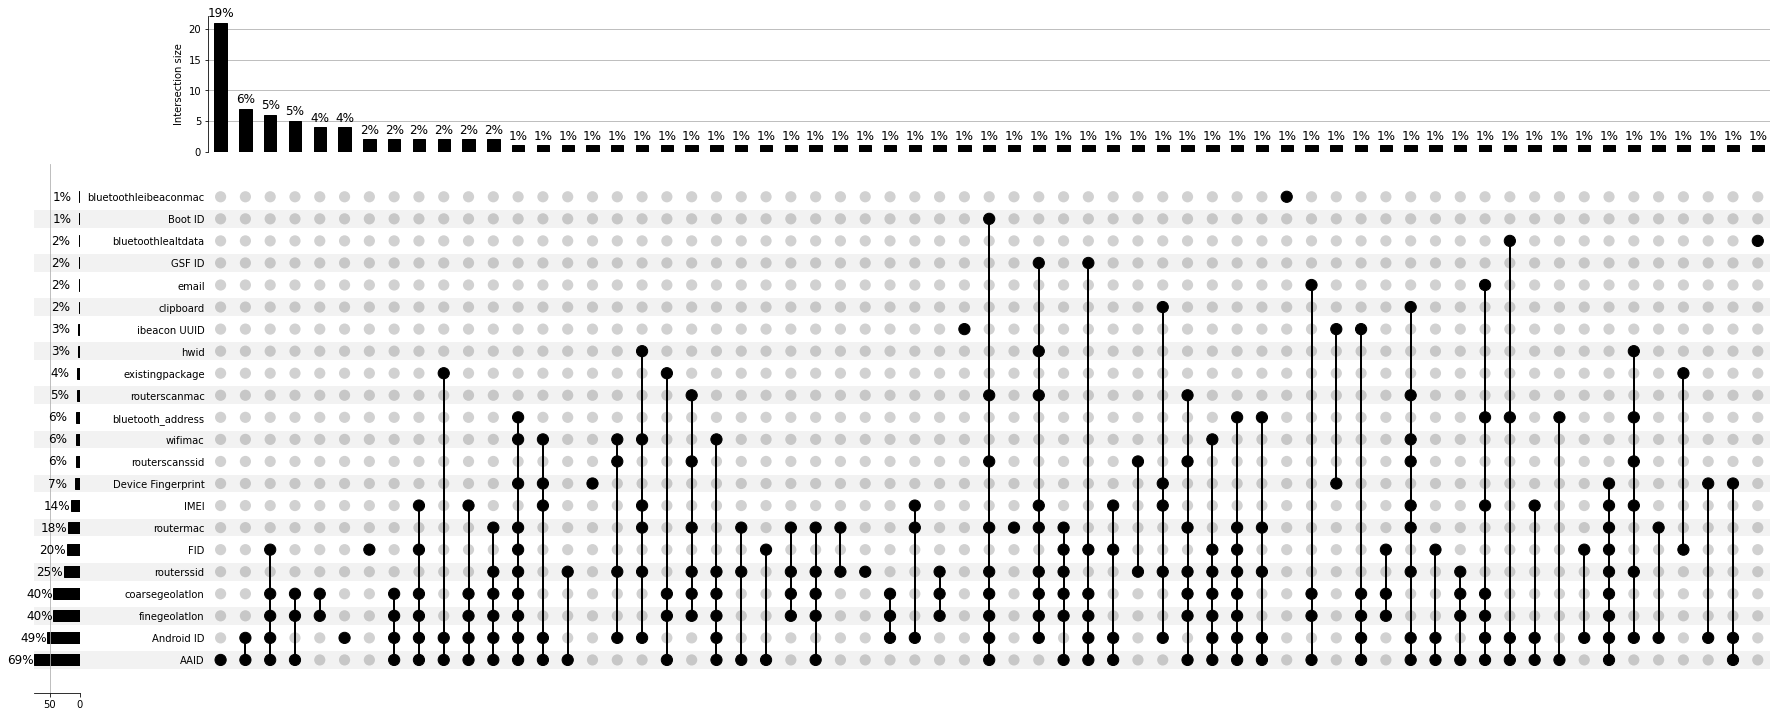

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships
import itertools

# List of identifiers (without grouping)
# identifiers = [
#     "android id", "boot id", "gsf id", "imei", "hwid", "wifimac", "device fingerprint", "email",
#     "AAID", "fid", "bluetooth_address", "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon uuid", 
#     "routermac", "routerscanmac", "routerscanssid", "routerssid", "coarsegeolatlon", "finegeolatlon"
# ]

# Create a function to build the matrix without grouping (individual identifiers)
def create_identifier_matrix(data, identifier_column):
    # Initialize the matrix with zeros for each identifier
    all_identifiers = set(
        itertools.chain(*data[identifier_column].apply(lambda x: [i.strip() for i in x.split(',') if i.strip()]))
    )
    sdk_matrix = pd.DataFrame(0, index=data['SDK'], columns=all_identifiers)
    
    # For each row in the data, check which identifiers are collected, and mark it in the matrix
    for idx, row in data.iterrows():
        identifiers_present = [i.strip() for i in row[identifier_column].split(',') if i.strip()]
        for identifier in identifiers_present:
            if identifier in sdk_matrix.columns:
                sdk_matrix.loc[row['SDK'], identifier] = 1
    
    return sdk_matrix

# Assuming your dataframe is called 'res' and you have the 'Accessed Items' column
identifier_matrix = create_identifier_matrix(res, 'Accessed Items')

# Create memberships list for UpSet plot
memberships = []
for index, row in identifier_matrix.iterrows():
    identifiers_present = row[row == 1].index.tolist()
    memberships.append(identifiers_present)

# Create UpSet plot data
upset_data = from_memberships(memberships, data=identifier_matrix.index)

# Get the total number of SDKs for percentage calculation
total_sdks = len(identifier_matrix)

# Create and plot the UpSet plot
upset = UpSet(upset_data, subset_size='count', sort_by='cardinality', orientation='horizontal')

# Plotting the data
fig = upset.plot()

# Get the axis that contains the top bar plot (intersections)
top_ax = fig["intersections"]

# Get the axis that contains the left bar plot (totals for each set)
left_ax = fig["totals"]

# Add percentages to the top bar plot (intersection size)
for rect in top_ax.patches:
    height = rect.get_height()
    if height > 0:
        # Calculate the percentage
        percentage = (height / total_sdks) * 100
        # Annotate the bars with percentage text
        top_ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, f'{percentage:.0f}%', 
                    ha='center', va='bottom', fontsize=12, color='black')

# Add percentages to the left bar plot (set sizes)
for rect in left_ax.patches:
    width = rect.get_width()
    if width > 0:
        # Calculate the percentage
        percentage = (width / total_sdks) * 100
        # Annotate the bars with percentage text
        left_ax.text(width + 45, rect.get_y() + rect.get_height() / 2, f'{percentage:.0f}%', 
                     ha='left', va='center', fontsize=12, color='black')

# Save and display the plot
plt.savefig('upset_plot_without_grouping_with_percentages.pdf', format="pdf", bbox_inches="tight")
plt.show()


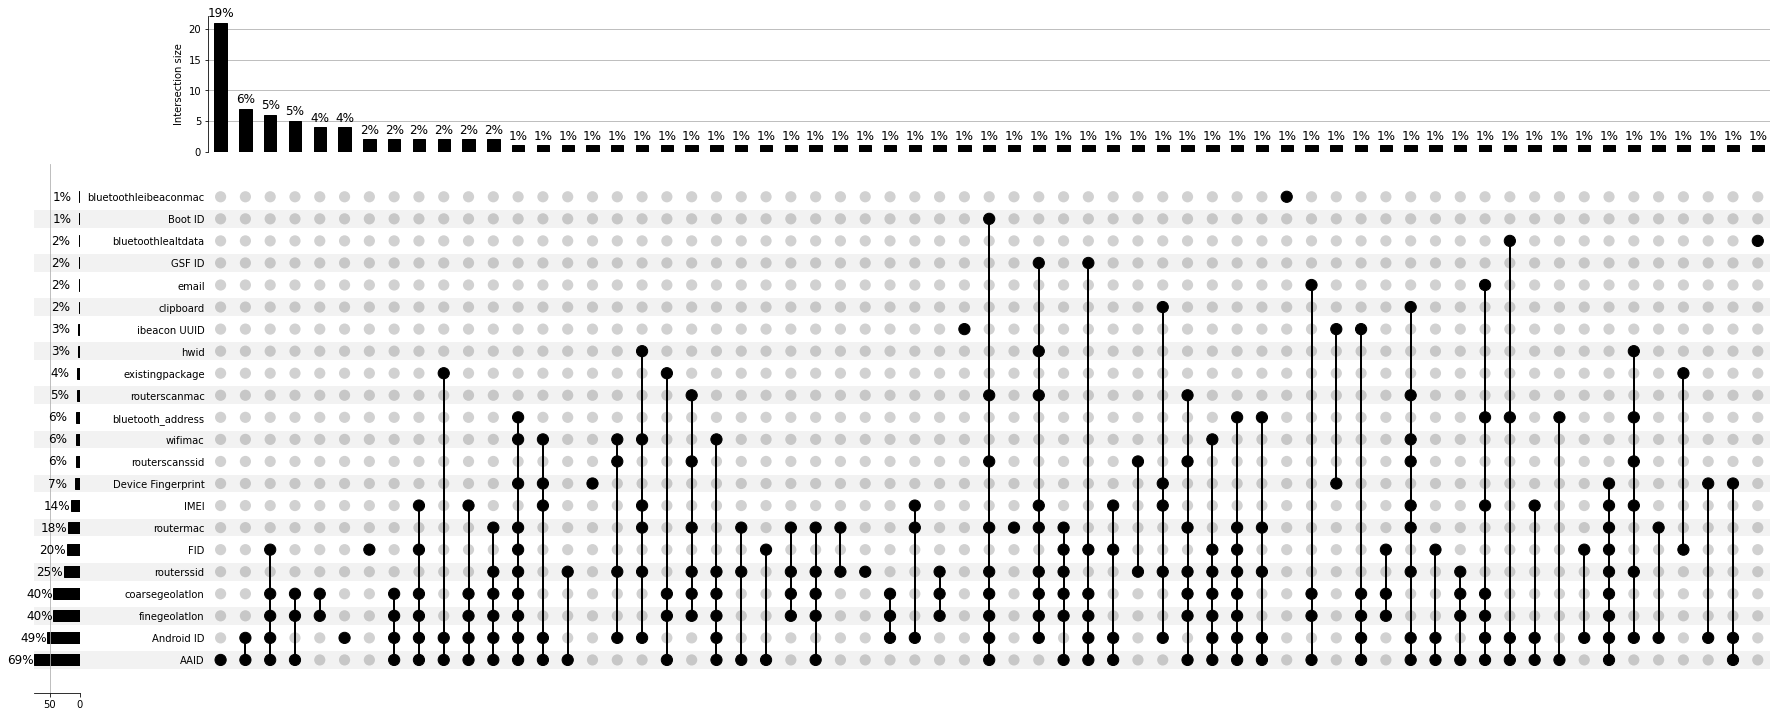

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships
import itertools

# List of identifiers (without grouping)
# identifiers = [
#     "android id", "boot id", "gsf id", "imei", "hwid", "wifimac", "device fingerprint", "email",
#     "AAID", "fid", "bluetooth_address", "bluetoothlealtdata", "bluetoothleibeaconmac", "ibeacon uuid", 
#     "routermac", "routerscanmac", "routerscanssid", "routerssid", "coarsegeolatlon", "finegeolatlon"
# ]

# Create a function to build the matrix without grouping (individual identifiers)
def create_identifier_matrix(data, identifier_column):
    # Initialize the matrix with zeros for each identifier
    all_identifiers = set(
        itertools.chain(*data[identifier_column].apply(lambda x: [i.strip() for i in x.split(',') if i.strip()]))
    )
    sdk_matrix = pd.DataFrame(0, index=data['SDK'], columns=all_identifiers)
    
    # For each row in the data, check which identifiers are collected, and mark it in the matrix
    for idx, row in data.iterrows():
        identifiers_present = [i.strip() for i in row[identifier_column].split(',') if i.strip()]
        for identifier in identifiers_present:
            if identifier in sdk_matrix.columns:
                sdk_matrix.loc[row['SDK'], identifier] = 1
    
    return sdk_matrix

# Assuming your dataframe is called 'res' and you have the 'Accessed Items' column
identifier_matrix = create_identifier_matrix(res, 'Accessed Items')

# Create memberships list for UpSet plot
memberships = []
for index, row in identifier_matrix.iterrows():
    identifiers_present = row[row == 1].index.tolist()
    memberships.append(identifiers_present)

# Create UpSet plot data
upset_data = from_memberships(memberships, data=identifier_matrix.index)

# Get the total number of SDKs for percentage calculation
total_sdks = len(identifier_matrix)

# Create and plot the UpSet plot
upset = UpSet(upset_data, subset_size='count', sort_by='cardinality', orientation='horizontal')

# Plotting the data
fig = upset.plot()

# Get the axis that contains the top bar plot (intersections)
top_ax = fig["intersections"]

# Get the axis that contains the left bar plot (totals for each set)
left_ax = fig["totals"]

# Add percentages to the top bar plot (intersection size)
for rect in top_ax.patches:
    height = rect.get_height()
    if height > 0:
        # Calculate the percentage
        percentage = (height / total_sdks) * 100
        # Annotate the bars with percentage text
        top_ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, f'{percentage:.0f}%', 
                    ha='center', va='bottom', fontsize=12, color='black')

# Add percentages to the left bar plot (set sizes)
for rect in left_ax.patches:
    width = rect.get_width()
    if width > 0:
        # Calculate the percentage
        percentage = (width / total_sdks) * 100
        # Annotate the bars with percentage text
        left_ax.text(width + 45, rect.get_y() + rect.get_height() / 2, f'{percentage:.0f}%', 
                     ha='left', va='center', fontsize=12, color='black')

# Save and display the plot
plt.savefig('upset_plot_without_grouping_with_percentages.pdf', format="pdf", bbox_inches="tight")
plt.show()


In [141]:
identifier_matrix

,finegeolatlon,GSF ID,Device Fingerprint,hwid,ibeacon UUID,IMEI,bluetoothleibeaconmac,bluetoothlealtdata,routermac,AAID,...,routerscanmac,FID,Boot ID,email,existingpackage,routerssid,routerscanssid,coarsegeolatlon,bluetooth_address,clipboard
SDK,,,,,,,,,,,,,,,,,,,,,
Bazaarvoice,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
BlueKai (acquired by Oracle),0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Colocater,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Cuebiq,1,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,1,1,1,0,0
Demdex,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pingID,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
socure.io,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
taobao,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# Filter SDKs where both GPS data and Resettable device ID are accessed
sdk_gps_and_resettable = identifier_matrix[
    (grouped_matrix["GPS data"] == 1) & (grouped_matrix["Resettable device ID"] == 1)
]

# Display the SDKs meeting the criteria
if not sdk_gps_and_resettable.empty:
    print("SDKs accessing both GPS data and Resettable device ID:")
    print(sdk_gps_and_resettable.index)
else:
    print("No SDKs were found that access both GPS data and Resettable device ID.")


# Assuming 'res' is your original DataFrame with SDKs and identifiers
# Filter the rows for SDKs that are in sdk_gps_and_resettable
filtered_res = res[res['SDK'].isin(sdk_gps_and_resettable.index)]

# Create a dictionary to store the identifiers for each SDK
sdk_identifiers = {}

# Iterate over the filtered DataFrame and extract identifiers
for idx, row in filtered_res.iterrows():
    sdk = row['SDK']
    identifiers = [i.strip() for i in row['Accessed Items'].split(',') if i.strip()]
    sdk_identifiers[sdk] = identifiers

# Print the results
for sdk, identifiers in sdk_identifiers.items():
    print(f"SDK: {sdk}")
    print(f"Identifiers Collected: {', '.join(identifiers)}\n")



SDKs accessing both GPS data and Resettable device ID:
Index(['Cuebiq', 'Demdex', 'Huq Sourcekit', 'InMarket', 'LeanPlum',
       'Pilgrim by Foursquare', 'Point Inside', 'Radar', 'Rover SDK',
       'Salesforce Marketing Cloud', 'Sense360', 'mParticle', 'Adjust',
       'AdsWizz', 'Amplitude', 'AppsFlyer', 'Batch', 'Braze (formerly Appboy)',
       'Data dog', 'Display', 'Flurry', 'FreeWheel', 'Inmobi', 'MixPanel',
       'New Relic', 'Omniture', 'OneSignal', 'PubMatic', 'PubNative', 'Sentry',
       'appICE', 'conviva', 'incognia', 'phunware', 'vizbee'],
      dtype='object', name='SDK')
SDK: Cuebiq
Identifiers Collected: finegeolatlon, routerscanssid, coarsegeolatlon, routerscanmac, routermac, AAID, routerssid

SDK: Demdex
Identifiers Collected: finegeolatlon, wifimac, coarsegeolatlon, Android ID, FID, AAID, routerssid

SDK: Huq Sourcekit
Identifiers Collected: finegeolatlon, coarsegeolatlon, Android ID, bluetooth_address, FID, routermac, AAID, routerssid

SDK: InMarket
Identifiers 

In [151]:
import numpy as np

identifiers = df.Identifier.unique().tolist()

# Create a new DataFrame to store the output
output_df = pd.DataFrame(columns=['SDK', 'Package Count'] + identifiers)

# Fill the DataFrame with checkmarks where identifiers are present
output_df['SDK'] = res['SDK']
output_df['Package Count'] = res['Package Count']
for identifier in identifiers:
    output_df[identifier] = np.where(
        res['12'].apply(lambda x: identifier in x) & res['9'].apply(lambda x: identifier in x),
        '\ding{117}',  # Both 12 and 9
        np.where(
            res['12'].apply(lambda x: identifier in x), 
            '\ding{72}',  # Only 12
            np.where(
                res['9'].apply(lambda x: identifier in x),
                '\ding{108}',  # Only 9
                ''
            )
        )
    )

output_df = output_df.loc[:, (output_df != '').any(axis=0)]
output_df.sort_values('Package Count', ascending=False).applymap(lambda x: f"{x:.2f}" if isinstance(x, float) else x).to_latex('beacon_id_table_tick.tex', index=False, escape=False)

<>:14: DeprecationWarning:

invalid escape sequence \d

<>:17: DeprecationWarning:

invalid escape sequence \d

<>:20: DeprecationWarning:

invalid escape sequence \d

<>:14: DeprecationWarning:

invalid escape sequence \d

<>:17: DeprecationWarning:

invalid escape sequence \d

<>:20: DeprecationWarning:

invalid escape sequence \d

/tmp/ipykernel_1490571/1336618308.py:14: DeprecationWarning:

invalid escape sequence \d

/tmp/ipykernel_1490571/1336618308.py:17: DeprecationWarning:

invalid escape sequence \d

/tmp/ipykernel_1490571/1336618308.py:20: DeprecationWarning:

invalid escape sequence \d

/home/aniketh/anaconda3/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1846: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [149]:
df

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at,Location_Identifiers_Used,beacon_sdk,beacon_sdk_name
9,com.thronebaron,firebaseinstallations.googleapis.com,FID,NaN,[''],[''],2 (20%),8 (29%),10 (26%),"[O, I]",...,True,True,217.0,217.0,None,None,12,True,False,NaN
10,com.thronebaron,firebaseinstallations.googleapis.com,FID,hex,['7cd0ae8a7d2041639c716e80daabb1d8_binary_base64'\n '7cd0ae8a7d2041639c716e80daabb1d8_base64'],[''],4 (40%),16 (57%),20 (53%),"[O, I]",...,True,True,217.0,217.0,None,None,12,True,False,NaN
19,com.app.mariannahealthandwellness,firebaseinstallations.googleapis.com,FID,NaN,[''],[''],2 (8%),8 (27%),10 (19%),"[O, I]",...,True,True,171.0,171.0,None,None,12,True,False,NaN
22,ru.datapax.kursk,api.kursk.dtpax.ru,coarsegeolatlon,exact,[''],[''],8 (9%),0 (0%),8 (5%),[O],...,True,True,73524.0,NaN,None,None,12,True,False,NaN
23,ru.datapax.kursk,api.kursk.dtpax.ru,coarsegeolatlon,exact,[''],[''],8 (9%),0 (0%),8 (5%),[O],...,True,True,73524.0,NaN,None,None,12,True,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140100,com.tickledmedia.ParentTown,graph.facebook.com,AAID,04f3a35c-70a9-4bbd-ad71-38cfc2eca584,[''],[''],21 (17%),0 (0%),21 (10%),[O],...,True,True,9420338.0,NaN,None,None,9,True,False,NaN
140101,com.tickledmedia.ParentTown,vnhxyl-dlsdk.appsflyersdk.com,AAID,04f3a35c-70a9-4bbd-ad71-38cfc2eca584,[''],[''],1 (1%),0 (0%),1 (0%),[O],...,True,True,9420338.0,NaN,None,None,9,True,False,NaN
140102,com.tickledmedia.ParentTown,vnhxyl-register.appsflyersdk.com,AAID,04f3a35c-70a9-4bbd-ad71-38cfc2eca584,[''],[''],1 (1%),0 (0%),1 (0%),[O],...,True,True,9420338.0,NaN,None,None,9,True,False,NaN
140103,com.tickledmedia.ParentTown,sdk.hansel.io,Android ID,7fec4b734292f89b,[''],[''],1 (1%),0 (0%),1 (0%),[O],...,True,True,9420338.0,NaN,None,None,9,True,False,NaN


In [150]:
df[(df['TP_SDK'] == 'Forter') & (df['access_fine_location'] == False) & (df['access_coarse_location'] == False)]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at,Location_Identifiers_Used,beacon_sdk,beacon_sdk_name
127367,com.sarenza,m.api.forter.com,bluetooth_address,address,[''],[''],2 (1%),0 (0%),2 (1%),[O],...,True,True,1460890.0,NaN,None,Forter,9,True,False,NaN
127388,com.sarenza,m.api.forter.com,hwid,05LAY1XV1R,[''],[''],1 (0%),0 (0%),1 (0%),[O],...,True,True,1460890.0,NaN,None,Forter,9,True,False,NaN
127389,com.sarenza,m.api.forter.com,IMEI,sha1,['ashex'],[''],29 (13%),0 (0%),29 (9%),[O],...,True,True,1460890.0,NaN,None,Forter,9,True,False,NaN
127390,com.sarenza,3624ab25de3b.cdn4.forter.com,IMEI,sha1,['ashex'],[''],1 (0%),0 (0%),1 (0%),[O],...,True,True,1460890.0,NaN,None,Forter,9,True,False,NaN
127391,com.sarenza,12c088f9ddf4a20d2673b76f872e8eaab50adf86f-3624ab25de3b.cdn.forter.com,IMEI,sha1,['ashex'],[''],2 (1%),0 (0%),2 (1%),[O],...,True,True,1460890.0,NaN,None,Forter,9,True,False,NaN
127392,com.sarenza,m.api.forter.com,routerssid,0,[''],[''],1 (0%),0 (0%),1 (0%),[O],...,True,True,1460890.0,NaN,None,Forter,9,True,False,NaN


In [75]:
df[(df['Identifier'].str.contains('router')) & ((df['access_fine_location'] == False) & (df['access_coarse_location'] == False))]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at,Location_Identifiers_Used
95311,com.devexperts.tdmobile.platform.android.thinkorswim,sws-gateway-nr.schwab.com,routerssid,0,['lower_md5_ashex' 'lower_md5_ashex_asuuid'],[''],4 (12%),0 (0%),4 (7%),[O],...,False,False,True,True,1861256.0,NaN,None,None,9,True
127392,com.sarenza,m.api.forter.com,routerssid,0,[''],[''],1 (0%),0 (0%),1 (0%),[O],...,False,False,True,True,1460890.0,NaN,None,Forter,9,True


In [76]:
df[(df['Identifier'].str.contains('router')) & (df['access_coarse_location'] == False)]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at,Location_Identifiers_Used
18962,com.punchh.moes,control.kochava.com,routerssid,0,[''],[''],4 (2%),0 (0%),4 (1%),[O],...,False,False,True,False,1611311.0,NaN,Kochava,None,12,True
30584,com.v1_4.solamenteporgracia.com,api.huq.io,routermac,0,[None],[''],1 (9%),0 (0%),1 (6%),[O],...,False,False,True,False,NaN,NaN,Huq Sourcekit,None,9,True
30585,com.v1_4.solamenteporgracia.com,api.huq.io,routerssid,0,['' None],[''],2 (18%),0 (0%),2 (12%),[O],...,False,False,True,False,NaN,NaN,Huq Sourcekit,None,9,True
54285,com.punchh.moes,control.kochava.com,routermac,0,[None],[''],1 (0%),0 (0%),1 (0%),[O],...,False,False,True,False,1611311.0,NaN,Kochava,None,9,True
54286,com.punchh.moes,control.kochava.com,routerssid,0,[''],[''],4 (1%),0 (0%),4 (0%),[O],...,False,False,True,False,1611311.0,NaN,Kochava,None,9,True
95311,com.devexperts.tdmobile.platform.android.thinkorswim,sws-gateway-nr.schwab.com,routerssid,0,['lower_md5_ashex' 'lower_md5_ashex_asuuid'],[''],4 (12%),0 (0%),4 (7%),[O],...,False,False,True,True,1861256.0,NaN,None,None,9,True
127392,com.sarenza,m.api.forter.com,routerssid,0,[''],[''],1 (0%),0 (0%),1 (0%),[O],...,False,False,True,True,1460890.0,NaN,None,Forter,9,True


In [77]:
df[(df['SDK'].isnull() & df['TP_SDK'].isnull())].Identifier.unique()

array(['FID', 'coarsegeolatlon', 'finegeolatlon', 'AAID',
       'Device Fingerprint', 'installpackage', 'installpackagesha256',
       'routermac', 'routerssid', 'email', 'bluetooth_address',
       'routerscanmac', 'routerscanssid', 'GSF ID', 'bluetoothlealtdata',
       'Boot ID', 'contact', 'existingpackage', 'bluetoothlealtdatauuid',
       'Android ID', 'phone', 'IMEI', 'wifimac', 'hwid', 'clipboard',
       'getifaddrwifimac'], dtype=object)

In [78]:
df[df['Identifier'].str.contains('geolatlon')]['Package Name'].nunique()

1359

In [79]:
df[(df['SDK'].isnull() & df['TP_SDK'].isnull()) & (df['Identifier'] == 'routerscannomapmac')]['Package Name'].nunique()

0

In [80]:
pd.set_option('display.max_rows', None)
df[(df['SDK'].isnull() & df['TP_SDK'].isnull()) & (df['Identifier'] == 'geolatlon')]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at,Location_Identifiers_Used


In [ ]:
df[(df['TP_SDK'] == 'AppLovin (MAX and SparkLabs)') & (df['Identifier'] == 'bluetoothlealtdata')]

In [39]:
df[df['package_name'] == 'com.sarenza']

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
27195,com.sarenza,ws.batch.com,AAID,15d08b3c-5098-4514-abbc-e4a2268a3c49,[''],[''],6 (8%),0 (0%),6 (4%),[O],...,False,False,False,True,True,1460890,1.5M,None,Batch,12
27206,com.sarenza,firebaseinstallations.googleapis.com,FID,NaN,[''],[''],2 (3%),8 (9%),10 (6%),"[O, I]",...,False,False,False,True,True,1460890,1.5M,None,None,12
27207,com.sarenza,firebaseinstallations.googleapis.com,FID,hex,['70a23c9395e0437092610471b406cb38_binary_base...,[''],4 (5%),16 (19%),20 (12%),"[O, I]",...,False,False,False,True,True,1460890,1.5M,None,None,12
27208,com.sarenza,ws.batch.com,FID,NaN,[''],[''],3 (4%),0 (0%),3 (2%),[O],...,False,False,False,True,True,1460890,1.5M,None,Batch,12
27209,com.sarenza,ws.batch.com,FID,hex,['70a23c9395e0437092610471b406cb38_binary_base...,[''],6 (8%),0 (0%),6 (4%),[O],...,False,False,False,True,True,1460890,1.5M,None,Batch,12
27393,com.sarenza,ws.batch.com,AAID,15d08b3c-5098-4514-abbc-e4a2268a3c49,[''],[''],6 (8%),0 (0%),6 (4%),[O],...,False,False,False,True,True,1460890,1.5M,None,Batch,12
27404,com.sarenza,firebaseinstallations.googleapis.com,FID,NaN,[''],[''],2 (3%),8 (9%),10 (6%),"[O, I]",...,False,False,False,True,True,1460890,1.5M,None,None,12
27405,com.sarenza,firebaseinstallations.googleapis.com,FID,hex,['764ad959998b45f6bc0a7f221741885a_binary_base...,[''],4 (5%),16 (18%),20 (12%),"[O, I]",...,False,False,False,True,True,1460890,1.5M,None,None,12
27406,com.sarenza,ws.batch.com,FID,NaN,[''],[''],3 (4%),0 (0%),3 (2%),[O],...,False,False,False,True,True,1460890,1.5M,None,Batch,12
27407,com.sarenza,ws.batch.com,FID,hex,['764ad959998b45f6bc0a7f221741885a_binary_base...,[''],6 (8%),0 (0%),6 (4%),[O],...,False,False,False,True,True,1460890,1.5M,None,Batch,12


In [ ]:
df[df['Identifier'].str.contains('geolatlon')].Identifier.unique()

In [ ]:
df['Identifier'].unique()

In [76]:
geolocation_identifiers = [
    'coarsegeolatlon', 'finegeolatlon', 'routermac', 'routerssid', 
    'routerscanssid', 'wifimac', 'getifaddrwifimac'
]

# Other identifiers of interest (you can expand this list as needed)
other_identifiers = [
    'AAID', 'Bluetooth Address', 'Android ID', 'IMEI', 'hwid', 
    'email', 'phone', 'ibeacon UUID'
]

# Step 2: Filter rows where the Identifier column contains geolocation-related identifiers
geolocation_df = df[df['Identifier'].isin(geolocation_identifiers)]

# Step 3: Identify the associations with other identifiers within the same package or domain
associations = df[df['Package Name'].isin(geolocation_df['Package Name']) & 
                  df['Domain'].isin(geolocation_df['Domain'])]

# Step 4: Group by 'Package Name' and 'Domain' and list all associated identifiers
associated_identifiers = associations.groupby(['Package Name', 'Domain'])['Identifier'].apply(list).reset_index()
associated_identifiers['Identifier'] = associated_identifiers['Identifier'].apply(lambda x: list(set(x)))
associated_identifiers

,Package Name,Domain,Identifier
0,abudhabi.healthlink,api.leanplum.com,[Android ID]
1,abudhabi.healthlink,router-aditc.live.ridewithvia.com,"[coarsegeolatlon, finegeolatlon]"
2,ae.etisalat.smiles,app.adjust.com,[AAID]
3,ae.etisalat.smiles,gccapi.appice.io,"[routermac, coarsegeolatlon, routerssid, finegeolatlon, AAID]"
4,ae.etisalat.smiles,smilesapp.etisalat.ae,"[finegeolatlon, AAID, coarsegeolatlon, IMEI]"
5,ae.gov.adnoc,api.amplitude.com,"[finegeolatlon, AAID, coarsegeolatlon]"
6,ae.gov.adnoc,app.adjust.com,[AAID]
7,ae.gov.adnoc,firebaselogging-pa.googleapis.com,[Device Fingerprint]
8,ae.gov.adnoc,mc2v0ydv4t9lpg92m490w0615plm.device.marketingcloudapis.com,"[coarsegeolatlon, finegeolatlon]"
9,aib.ibank.android,sdk.pingid.eu,"[wifimac, Android ID, routerssid, routerscanssid]"


In [63]:
associated_identifiers['Sorted_Identifiers'] = associated_identifiers['Identifier'].apply(lambda x: tuple(sorted(x)))

# Step 2: Count the frequency of each unique combination
combination_counts = associated_identifiers['Sorted_Identifiers'].value_counts()

# Step 3: Find the most common combinations
most_common_combinations = combination_counts.head(30)  # Adjust the number to see more or fewer results

# Convert the result to a DataFrame for better readability
most_common_combinations_df = most_common_combinations.reset_index()
most_common_combinations_df.columns = ['Identifier Combination', 'Count']
most_common_combinations_df

,Identifier Combination,Count
0,"(coarsegeolatlon, finegeolatlon)",1017
1,"(AAID,)",433
2,"(Android ID, coarsegeolatlon, finegeolatlon)",324
3,"(coarsegeolatlon,)",280
4,"(Device Fingerprint,)",203
5,"(AAID, coarsegeolatlon, finegeolatlon)",182
6,"(Android ID,)",107
7,"(FID,)",75
8,"(AAID, Android ID, coarsegeolatlon, finegeolatlon)",49
9,"(coarsegeolatlon, finegeolatlon, routerssid)",37


## Violations and vulnerabilities

In [40]:
df_wifi_without_permission = df[
    ((df['access_wifi_state'] == False) & 
     (df['change_wifi_state'] == False)) &
    (df['Identifier'].str.contains('wifi|router|routerscan', case=False, regex=True))
]

df_wifi_without_permission

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at


In [29]:
df_geolocation_without_permission = df[
    ((df['access_fine_location'] == False) & 
     (df['access_coarse_location'] == False) & 
     (df['access_background_location'] == False)) &
    (df['Identifier'].str.contains('geolatlon', case=False, regex=True))
]

df_geolocation_without_permission

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
73,lu.pragma.editus,nominatim.openstreetmap.org,coarsegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",...,False,False,False,False,False,85404.0,85.4K,None,None,12
74,lu.pragma.editus,dc.services.visualstudio.com,coarsegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],...,False,False,False,False,False,85404.0,85.4K,None,None,12
75,lu.pragma.editus,nominatim.openstreetmap.org,coarsegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",...,False,False,False,False,False,85404.0,85.4K,None,None,12
76,lu.pragma.editus,dc.services.visualstudio.com,coarsegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],...,False,False,False,False,False,85404.0,85.4K,None,None,12
88,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,0,[''],[''],0 (0%),1 (1%),1 (1%),[I],...,False,False,False,False,False,85404.0,85.4K,None,None,12
89,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,exact,[''],[''],1 (1%),2 (2%),3 (2%),"[O, I]",...,False,False,False,False,False,85404.0,85.4K,None,None,12
90,lu.pragma.editus,dc.services.visualstudio.com,finegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],...,False,False,False,False,False,85404.0,85.4K,None,None,12
91,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",...,False,False,False,False,False,85404.0,85.4K,None,None,12
92,lu.pragma.editus,dc.services.visualstudio.com,finegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],...,False,False,False,False,False,85404.0,85.4K,None,None,12
42948,com.wKrantinews_14426552,www.netjets.com,coarsegeolatlon,NaN,[''],[''],0 (0%),2 (0%),2 (0%),[I],...,False,False,True,True,True,564.0,564,None,None,12


In [41]:
df[['Package Name', 'Identifier', 'access_fine_location', 'access_coarse_location', 'change_wifi_state', 'access_wifi_state', 'SDK', 'TP_SDK', 'ran_at']][(df['Identifier'].str.contains('routermac|routerssid')) & ((df['access_fine_location'] == False) & (df['access_coarse_location'] == False)) & (df['change_wifi_state'] == False)]

,Package Name,Identifier,access_fine_location,access_coarse_location,change_wifi_state,access_wifi_state,SDK,TP_SDK,ran_at
95311,com.devexperts.tdmobile.platform.android.think...,routerssid,False,False,False,True,None,None,9
127392,com.sarenza,routerssid,False,False,False,True,None,Forter,9


In [42]:
df[(df['TP_SDK'] == 'vizbee') & (df['Package Name'] == 'com.turner.trutv')]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,...,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
66828,com.turner.trutv,events.claspws.tv,AAID,upper,['base64' ''],[''],15 (4%),0 (0%),15 (2%),[O],...,False,False,False,True,False,1670098.0,1.7M,None,vizbee,12
66831,com.turner.trutv,events.claspws.tv,AAID,47d32432-ec24-434a-8856-bf4c770245f6,[''],[''],10 (3%),0 (0%),10 (1%),[O],...,False,False,False,True,False,1670098.0,1.7M,None,vizbee,12
103528,com.turner.trutv,events.claspws.tv,AAID,upper,[''],[''],4 (1%),0 (0%),4 (1%),[O],...,False,False,False,True,False,1670098.0,1.7M,None,vizbee,9
103530,com.turner.trutv,events.claspws.tv,AAID,f249b876-862e-4926-95e7-81617f2eba2d,[''],[''],4 (1%),0 (0%),4 (1%),[O],...,False,False,False,True,False,1670098.0,1.7M,None,vizbee,9
103532,com.turner.trutv,events.claspws.tv,Android ID,60721ae410c5c0b9,[''],[''],10 (3%),0 (0%),10 (1%),[O],...,False,False,False,True,False,1670098.0,1.7M,None,vizbee,9
103533,com.turner.trutv,config.claspws.tv,Android ID,60721ae410c5c0b9,[''],[''],1 (0%),0 (0%),1 (0%),[O],...,False,False,False,True,False,1670098.0,1.7M,None,vizbee,9
103565,com.turner.trutv,events.claspws.tv,routermac,0,[None],[''],8 (2%),0 (0%),8 (1%),[O],...,False,False,False,True,False,1670098.0,1.7M,None,vizbee,9
103566,com.turner.trutv,events.claspws.tv,routerssid,0,[''],[''],24 (7%),0 (0%),24 (3%),[O],...,False,False,False,True,False,1670098.0,1.7M,None,vizbee,9


In [44]:
pd.set_option('display.max_columns', 40)
df[(df['Identifier'].str.contains('geolat')) & ((df['access_fine_location'] == False) & (df['access_coarse_location'] == False) & (df['access_wifi_state']  == False)
                                                & (df['access_background_location'] == False))]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,TLS,Median Transmission Time,filename,Normalized Domain,package_name,bluetooth,bluetooth_admin,bluetooth_connect,bluetooth_scan,bluetooth_advertise,access_fine_location,access_coarse_location,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
73,lu.pragma.editus,nominatim.openstreetmap.org,coarsegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",1,2024-07-31 12:36:46 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,openstreetmap.org,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
74,lu.pragma.editus,dc.services.visualstudio.com,coarsegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],1,2024-07-31 12:36:53 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,visualstudio.com,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
75,lu.pragma.editus,nominatim.openstreetmap.org,coarsegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",1,2024-07-31 12:36:46 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,openstreetmap.org,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
76,lu.pragma.editus,dc.services.visualstudio.com,coarsegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],1,2024-07-31 12:36:53 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,visualstudio.com,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
88,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,0,[''],[''],0 (0%),1 (1%),1 (1%),[I],1,2024-07-31 12:36:46 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,openstreetmap.org,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
89,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,exact,[''],[''],1 (1%),2 (2%),3 (2%),"[O, I]",1,2024-07-31 12:36:46 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,openstreetmap.org,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
90,lu.pragma.editus,dc.services.visualstudio.com,finegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],1,2024-07-31 12:36:53 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,visualstudio.com,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
91,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",1,2024-07-31 12:36:46 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,openstreetmap.org,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
92,lu.pragma.editus,dc.services.visualstudio.com,finegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],1,2024-07-31 12:36:53 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,visualstudio.com,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
46992,com.exoticca.android,api-us.exoticca.com,coarsegeolatlon,NaN,[''],[''],0 (0%),1 (8%),1 (4%),[I],1,2024-08-20 14:35:30 (±0 s),com.exoticca.android-1096-ad12beacon-172416452...,exoticca.com,com.exoticca.android,False,False,False,False,False,False,False,False,False,False,False,True,29470.0,29.5K,None,None,12


In [45]:
pd.set_option('display.max_columns', 40)
df[(df['Identifier'].str.contains('geolat')) & ((df['access_fine_location'] == False) & (df['access_coarse_location'] == False) & (df['access_wifi_state']  == False)
                                                & (df['access_background_location'] == False) & (df['read_external_storage'] == False))]

,Package Name,Domain,Identifier,Value,Transformations,Transformed Values,Outbound,Inbound,Total,Direction,TLS,Median Transmission Time,filename,Normalized Domain,package_name,bluetooth,bluetooth_admin,bluetooth_connect,bluetooth_scan,bluetooth_advertise,access_fine_location,access_coarse_location,access_background_location,record_audio,change_wifi_state,access_wifi_state,read_external_storage,realinstalls,installs,SDK,TP_SDK,ran_at
73,lu.pragma.editus,nominatim.openstreetmap.org,coarsegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",1,2024-07-31 12:36:46 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,openstreetmap.org,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
74,lu.pragma.editus,dc.services.visualstudio.com,coarsegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],1,2024-07-31 12:36:53 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,visualstudio.com,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
75,lu.pragma.editus,nominatim.openstreetmap.org,coarsegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",1,2024-07-31 12:36:46 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,openstreetmap.org,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
76,lu.pragma.editus,dc.services.visualstudio.com,coarsegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],1,2024-07-31 12:36:53 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,visualstudio.com,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
88,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,0,[''],[''],0 (0%),1 (1%),1 (1%),[I],1,2024-07-31 12:36:46 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,openstreetmap.org,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
89,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,exact,[''],[''],1 (1%),2 (2%),3 (2%),"[O, I]",1,2024-07-31 12:36:46 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,openstreetmap.org,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
90,lu.pragma.editus,dc.services.visualstudio.com,finegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],1,2024-07-31 12:36:53 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,visualstudio.com,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
91,lu.pragma.editus,nominatim.openstreetmap.org,finegeolatlon,exact,[''],[''],1 (1%),3 (3%),4 (2%),"[O, I]",1,2024-07-31 12:36:46 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,openstreetmap.org,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12
92,lu.pragma.editus,dc.services.visualstudio.com,finegeolatlon,exact,[''],[''],4 (4%),0 (0%),4 (2%),[O],1,2024-07-31 12:36:53 (±0 s),lu.pragma.editus-2029121401-ad12beacon-1722429...,visualstudio.com,lu.pragma.editus,False,False,False,False,False,False,False,False,False,False,False,False,85404.0,85.4K,None,None,12


## NOTES

- Need to explore who is `dvnfo.com`
- Is `api.maps.me` first party or third party?
- fr.avianey.altimeter	api.ppblinks.com who is ppblinks?